In [93]:
import zarr
import allel
import seaborn as sns
import umap
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Install the malariagen_data package, currently a prerelease
!pip install -q --pre --upgrade --no-cache-dir malariagen-data

In [4]:
import malariagen_data
ag3 = malariagen_data.Ag3("gs://vo_agam_release/", pre=True)

In [5]:
import yaml

In [6]:
#species name dict
sp_sp = {'arab':'arabiensis',
        'gamb_colu': 'gamb_colu'}

### per sample colours

In [7]:
# Load sample metadata
df_samples = ag3.sample_metadata('v3_wild')

In [8]:
#load yaml
with open('location_colours.yaml') as file:
    location_colours = yaml.load(file, Loader=yaml.Loader)

In [9]:
#new column - per sample colours
df_samples['colour'] = df_samples.apply(lambda row: location_colours[row.country][row.location], axis=1)

In [14]:
df_samples.species_gambcolu_arabiensis.value_counts()

gamb_colu       2415
arabiensis       368
intermediate       1
Name: species_gambcolu_arabiensis, dtype: int64

In [16]:
df_samples[df_samples.species_gambcolu_arabiensis == 'arabiensis']

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,release,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,species,colour
269,AB0333-C,BF18-11,Austin Burt,Burkina Faso,Bana,2014,7,11.233,-4.472,F,AG1000G-BF-B,v3,0.472,0.731,arabiensis,NaN,arabiensis,#9062c9
324,AB0457-C,BF17-34,Austin Burt,Burkina Faso,Pala,2014,7,11.150,-4.235,M,AG1000G-BF-B,v3,0.452,0.712,arabiensis,NaN,arabiensis,#8f62c9
341,AB0502-C,BF17-15,Austin Burt,Burkina Faso,Pala,2014,7,11.150,-4.235,M,AG1000G-BF-B,v3,0.441,0.693,arabiensis,NaN,arabiensis,#8f62c9
1012,AN0341-C,621,Brad White,Cameroon,Lagdo,2013,10,9.049,13.656,F,AG1000G-CM-C,v3,0.478,0.651,arabiensis,NaN,arabiensis,#5976bf
1013,AN0338-C,557,Brad White,Cameroon,Lagdo,2013,10,9.049,13.656,F,AG1000G-CM-C,v3,0.493,0.618,arabiensis,NaN,arabiensis,#5976bf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,AC0085-C,3_E2,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,F,AG1000G-UG,v3,0.454,0.733,arabiensis,NaN,arabiensis,#00859a
2572,AC0086-C,3_F1,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,F,AG1000G-UG,v3,0.451,0.742,arabiensis,NaN,arabiensis,#00859a
2573,AC0087-Cx,3_F2,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,F,AG1000G-UG,v3,0.454,0.741,arabiensis,NaN,arabiensis,#00859a
2574,AC0088-C,3_G1,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,F,AG1000G-UG,v3,0.460,0.747,arabiensis,NaN,arabiensis,#00859a


In [66]:
df_samples['place'] = df_samples[['country', 'location']].apply(lambda x: ', '.join(x), axis=1)
df_samples.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,release,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,species,colour,place
0,AR0047-C,LUA047,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.945,0.001,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"
1,AR0049-C,LUA049,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.933,0.001,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"
2,AR0051-C,LUA051,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.937,0.002,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"
3,AR0061-C,LUA061,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.938,0.002,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"
4,AR0078-C,LUA078,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.926,0.001,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"


### per sample input alleles

In [18]:
ac = zarr.open('../data/allele_counts_for_pca_umap/arab.pca_umap_input_alleles.zarr.zip', mode='r')

In [19]:
ac['allele_counts_pca_ready'][:].shape

(40862, 368)

In [84]:
#points are coloured by individual's country+location
def umapper_unique_location(pops):
    ac = zarr.open('../data/allele_counts_for_pca_umap/'+pops+'.pca_umap_input_alleles.zarr.zip', mode='r')
    print(ac['allele_counts_pca_ready'][:].shape)
    
    sns.set(style='white', context='paper', font_scale=1.2)
    sns.set(style='ticks')
            
    reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=.99, metric='euclidean')
    embedding = reducer.fit_transform(ac['allele_counts_pca_ready'][:].T)
    
    #plot
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]].colour, edgecolor='w', s=50)
    
    #legend
    labels = df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]].place.unique()
    col_dict = {x : df_samples.loc[df_samples.place == x].colour.unique()[0] for x in labels}
    handles = []
    for lab in labels:
        patch = plt.Line2D([], [], color=col_dict[lab], marker='o',
                           markersize=12, label=lab, linestyle=' ')
        handles.append(patch)
    fig.legend(handles=handles, loc='center left', bbox_to_anchor=(1, .5), )
    fig.tight_layout()

(40862, 368)


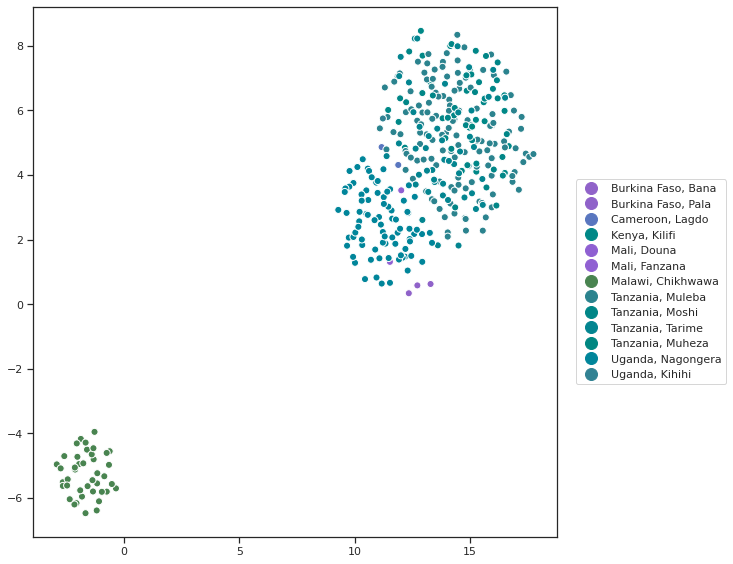

In [85]:
umapper_unique_location('arab')

(81239, 2415)


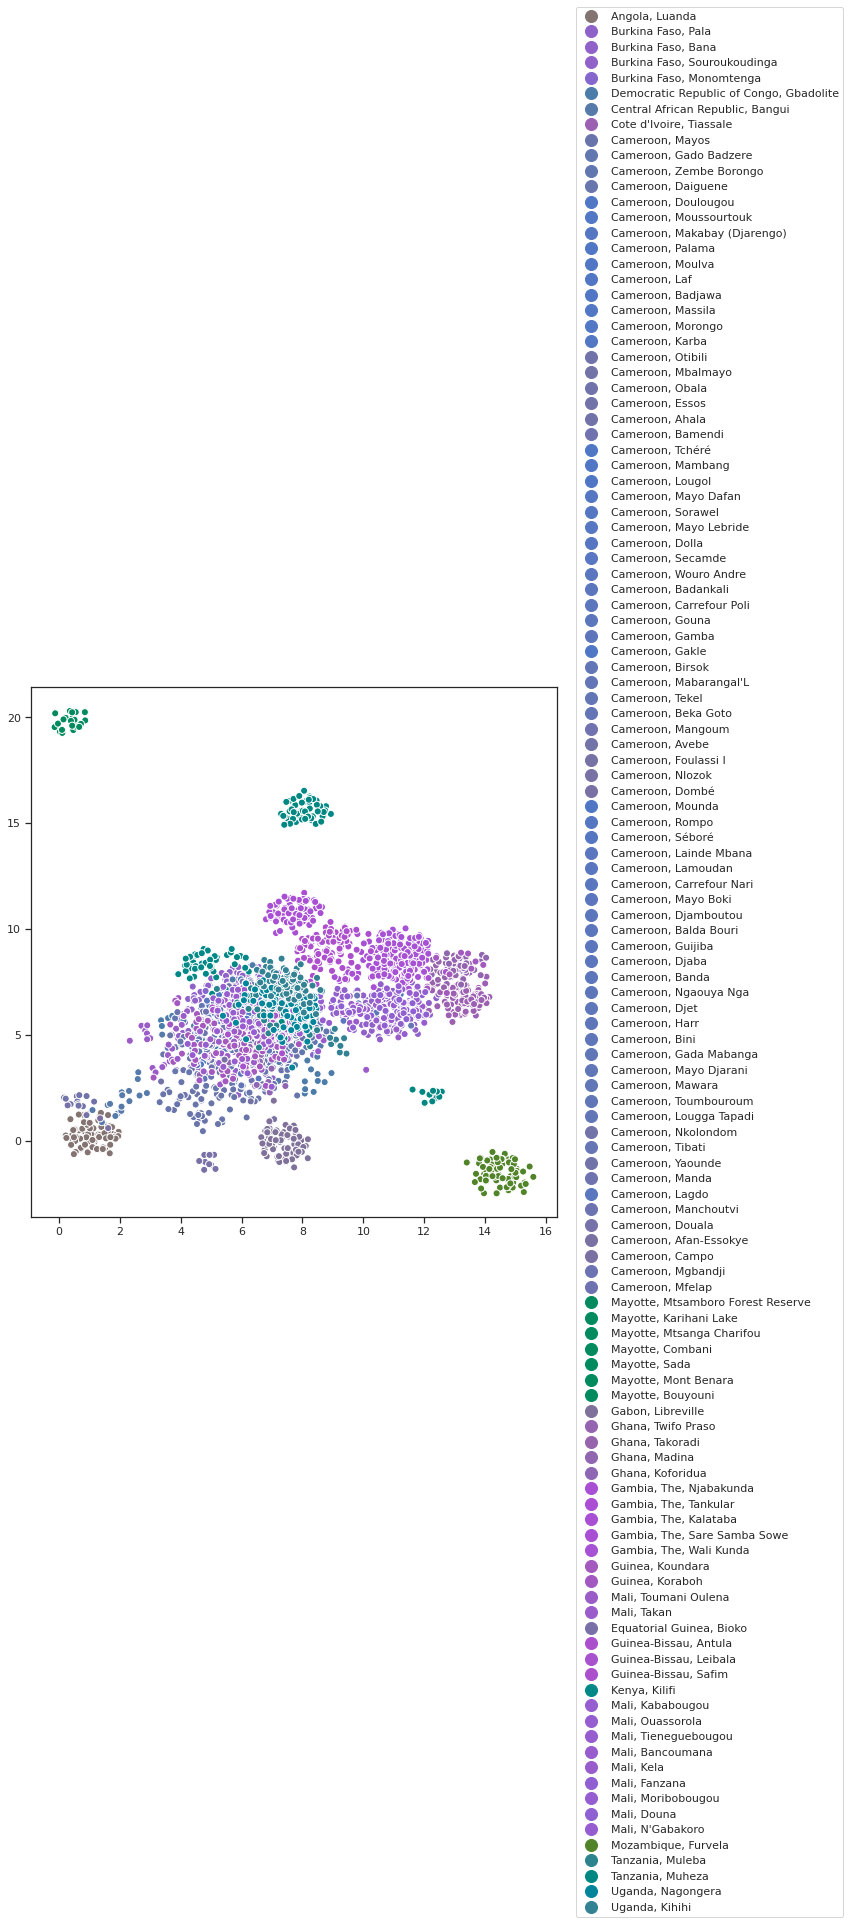

In [86]:
umapper('gamb_colu')

In [23]:
#umapper('gamb_colu_arab')

### thoughts
- difficult to read.
- we could average hex colours - could produce one colour per country/region/something - might make it easier to read.
- we could superimpose a map with the colour gradient?
- what does colour by species look like?

## Downsample populations

First downsample larger populations to give a more balanced view, then look at species colour.
 - we will need to do this separately for each dataset

In [146]:
def downsample(pops, n=50):
    #chop down df depending on pop
    df_pop = df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]]
    df_pop.reset_index(inplace=True)
    pop_all = df_pop.sample_set.unique()
    print(pop_all)
    idxs = []
    for pop in pop_all:
        pop_idxs = df_pop[df_pop.sample_set == pop].index.values
        if len(pop_idxs) > n:
            pop_idxs = np.random.choice(pop_idxs, size=n, replace=False)
        idxs.extend(pop_idxs)
    # randomly shuffle for better plotting
    #np.random.shuffle(idxs)
    return idxs

In [147]:
#points are coloured by individual's country+location
def umapper_downsampled(pops):
    ac = zarr.open('../data/allele_counts_for_pca_umap/'+pops+'.pca_umap_input_alleles.zarr.zip', mode='r')
    print(ac['allele_counts_pca_ready'][:].shape)
    
    #downsample
    idxs = downsample(pops=pops, n=50)
    
    
    
    #bizniz
    sns.set(style='white', context='paper', font_scale=1.2)
    sns.set(style='ticks')
    
    #umap
    reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=.99, metric='euclidean')
    embedding = reducer.fit_transform(ac['allele_counts_pca_ready'][:].T)
    
    #plot
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]].colour, edgecolor='w', s=50)
    
    #legend
    labels = df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]].place.unique()
    col_dict = {x : df_samples.loc[df_samples.place == x].colour.unique()[0] for x in labels}
    handles = []
    for lab in labels:
        patch = plt.Line2D([], [], color=col_dict[lab], marker='o',
                           markersize=12, label=lab, linestyle=' ')
        handles.append(patch)
    fig.legend(handles=handles, loc='center left', bbox_to_anchor=(1, .5), )
    fig.tight_layout()
    
    return idxs

(40862, 368)
['AG1000G-BF-B' 'AG1000G-CM-C' 'AG1000G-KE' 'AG1000G-ML-B' 'AG1000G-MW'
 'AG1000G-TZ' 'AG1000G-UG']


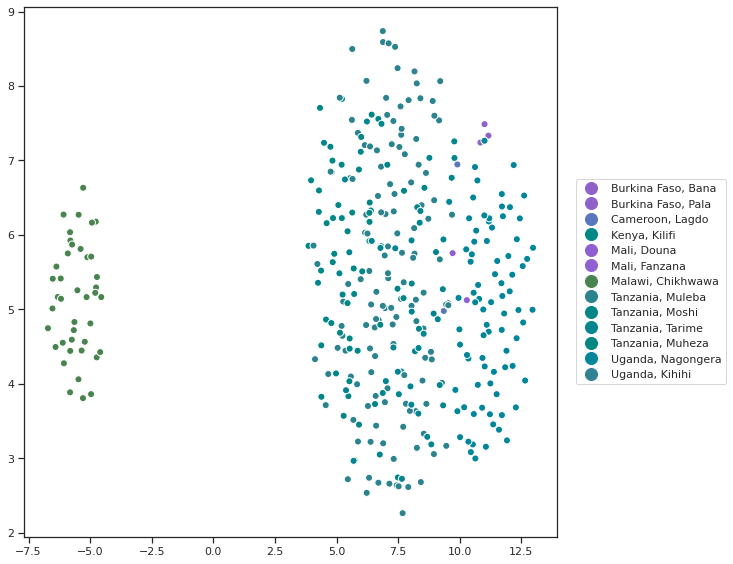

In [148]:
t = umapper_downsampled('arab')

In [149]:
tdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAt0AAAI0CAYAAADBfJW4AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy86wFpkAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdd3hUVfrA8e+dO3dKegghoYVO6L0IolQB6UVQRARFLGtfXbGtym/Xuta17K4VG6IiVVCUolTpvUNCSIAAoaRn5s7c+/sjMBKSkF4g7+d5fHZzbjszJDPvPfc971FM0zQRQgghhBBClBlLRXdACCGEEEKIq50E3UIIIYQQQpQxCbqFEEIIIYQoYxJ0CyGEEEIIUcYk6BZCCCGEEKKMWcvy5FlZWezcuZPw8HBUVS3LSwkhhBDiKub1ejl16hStWrXC4XBUdHeEKLIyDbp37tzJ+PHjy/ISQgghhKhCvv76azp16lTR3RCiyAoVdP/222+88847eDwegoODefnll6lbt26Bx4WHhwPZfyCRkZEl66kQQgghqqzExETGjx/viy2EuNIUGHQnJyczdepUZs6cSYMGDZg3bx4vvPACn3zySYEnv5BSEhkZSZ06dUreWyGEEEJUaZKuKq5UBU6kjIuLo3r16jRo0ACAnj17smrVKs6cOVPmnRNCCCGEEOJqUOBId4MGDUhKSmL79u20adOGBQsWAHD8+HGqVavm2y8lJYWUlJQcxyYmJpZyd4UQQgghhLjyFBh0BwYG8tZbb/Hyyy/jcrm4/vrrCQoKwmrNeejnn3/Oe++9V2YdFUIIIYQQ4kpVqImU3bt3p3v37gAkJSXxySef5JpIOXHiREaOHJmj7cKkByGEEEIIIaqyQgXdp06dIjw8HMMwePPNN7nlllvw8/PLsU9QUBBBQUFl0kkhhBBCCCGuZIUKut9++202b96Mrutce+21PP7442XdLyGEEEIIIa4ahQq6X3zxxbLuhxBCCCGEEFetAksGCiGEEEIIIUpGgm4hhBBCCCHKmATdQgghhBBClDEJuoUQQgghhChjEnQLIYQQQghRxiToFkIIIYQQooxJ0C2EEEIIIUQZk6BbCCGEEEKIMiZBtxBCCCGEEGVMgm4hhBBCCCHKmATdQghRhaS7XHgMA5fuweXxVHR3hBCiyrBWdAeEEEKUPdM0SXW5+OdPy1i+P4Ywfz/u6t6Zwa2a4bRpFd09IYS46knQLYQQVUCW7uEvM+eyNeE4AAnnknlh0RKC/Rz0adoI1SIPPoUQoizJp6wQQlQB5zIzfQH3xWZs2EqGW6+AHgkhRNUiQbcQQlQBXsPMs93jNcq5J0IIUTVJ0C2EEFVA9QA/moSH5Wof2a4lTk1yuoUQoqxJ0C2EEFWAVVX58NZRdK5XB4AAu417r+vKjS2jsaryVSCEEGVNJlIKIUQVYLVYCAvw572xw7GqFiyKgu71yii3EEKUEwm6hRCiirAoCv52m+9nTVUrsDdCCFG1yDNFIYQQQgghypgE3UIIIYQQQpQxSS8RQogqJEvXAQVFAcM0JadbCCHKiQTdQghRRWTpOp+t3cQPW3dgmCYj27ZiyrWdcWgaHq+XLI8HzaJi1+SrQQghSpt8sgohRBWQ4db5aNU6Plqzwdf2v1XrCHU6Gd2hFb/sOcDKg7HUqxbK7V074NQ0bFaZaCmEEKVFgm4hhKgCbFaVbzdvz9GmKgp9mzXisR8WsuJgrK991pYdzL93ogTdQghRimQipRBCVAEK4PJ4crR1bVCXU2npOQJugNPpGUz/YxNZes79hRBCFJ8E3UIIUQVk6R4GtWyWoy3M359jySl57n/49FlM0yDD7SYpLZ2j55LJ0nW8hlEe3RVCiKuOpJcIIUQV4G+38dSAXmS4dZbsPYAJhDqddK0fhaooeE0zx/5D2zTHMOGRWQtYG3sEgIbVq/G/caOoEeiPapExGyGEKAr51BRCiHKWpevoXi+610u6y41xScBbVvxsNqYNuYH1TzzA+ifu5y89u2G3qjxxQ08siuLbr3vDKLpE1eGNpSt9ATdATNIZHp21IFeaihBCiILJSLcQQpSjTLfOd5u389Hq9ZzLzKJzvTq8PHwg4QHlM3occNEy8BeMbNeSQa2aselIAvWqhVI3NBiA5fsP5dp35/ETeIzyuUkQQoiriYx0CyFEOfEaBqtjDvOvJSs4l5kFwIa4BCZ/NQvdW3G50n42G6F+Tvo1a0KTGtVxaBqGaRLq58y1r01VsUtVEyGEKDIJuoUQopxkuHW+27wjV3vcmXMknE2ugB7lT1NVJnfvnKt9dPtWeCrwBkEIIa5Ukl4ihBDlSL0od/piFkve7RVFU1V6N23Ev8cM44t1m8jUPQxp3Ywx7VvjkKXjhRCiyCToFkKIcuJv07i1cztWHjqco71xeBi1ggMrplOX4WfT6NmkAZ3r1QHAYbWiSWqJEEIUi6SXCCFEObFYLHSKqsP/DbmBWsFBWC0WejdtyKe33YRNrZzBrGqxEOiwE+iwS8AthBAlICPdQghRjpw2jcGtmjG4VTM0VSXDredZUUQIIcTVRYJuIYQoZ3brnx+9EnALIUTVIOklQgghhBBClDEJuoUQQgghhChjEnQLIYQQQghRxiToFkIIIYQQooxJ0C2EEEIIIUQZk6BbCCGEEEKIMiZBtxBCCCGEEGVMgm4hhBBCCCHKmATdQgghhBBClDEJuoUQQgghhChjsgy8EEKIQkl3uQEwMQmw2yu4N0IIcWWRoFsIIcRlebxekrNcvLF0JdsSjtE4PIxH+1xHzaBA7Jp8jQghRGHIp6UQQojL8hgmN38yg8SUVADizpxjbewRFj8wWYJuIYQoJMnpFkIIcVmrDh32BdwXZLh1Zm7chu71FulcXsMg063jNYzS7KIQQlR6MkQhhBDiss5mZOTZfi4zE69hoqmFO0+W7uHX3QfYFn+ctnVrckOLJjhkpFwIUUXIp50QQojL6tesCf/8aRle08zRPqxNi0IHzS7dw5TPZ7P7+EkA5mzZzfcbd/DRxFHYrfJVJIS4+kl6iRBCiMuyW628PmowIU4HAE5N42/9rqdhWLVCn2PNoThfwH3BrmMn+eNQfKn2VQghKisZXhBCCHFZfjaNHo3rs/ShKZzOyCDUz4lpmjhtWqGO9xpGroD7gt3HT3Bd0/pYFKU0uyyEEJWOjHQLIYQokFPTsGtWagUH4dQ0/Gy2Qh+rWix0a1Qvz23dGtWTgFsIUSVI0C2EEKLMtahZg/4tGudoG9CyCc0iwyuoR0IIUb4kvUQIIUSZc2hWnh/Wlzt7dGJHQiKt60RSt1qwVC8RQlQZ8mknhBCiXDg0jSYR1WkSUb2iuyKEEOVO0kuEEEIIIYQoYzLSLYQQV4hMt47FonAuI4sQPwemaeLQCldBpCrxGgaZuo5FUVBQCl1lRQghypIE3UIIcQXIcLv5add+Xl+yglSXixCng2cG9qFnkwZFqiRytctw62yJP8p/V64jKT2dXk0a8mCv7vIeCSEqnKSXCCHEFeBEahrPL/yVVJcLgHOZWUyd+xOpWe4K7lnxmKZJhtuNy+Mp1XPuPn6Ce7+Zw5aEY8SfTebL9Vt48Lv5ZLj1UruOEEIUhwTdQghRyXm8BvO3787VbpgmC3furYAelUymrrM6Jo6XF//GR6vXczYjs1SC7zSXm0/XbsS8pH3d4XhSsrJKfH4hhCgJSS8RQohKTlEg+PwS7Jeq5u8s596UTIbbzdvLVjFj4zZf24wNW5l99wQigwJLfP4LTwIulea6Mp8ICCGuHoUa6V6+fDkjRoxg+PDhDB06lF9++aWs+yWEEOI81WJhVLtWBNrtOdqr+Tnp37xpBfWqeNxeLzM3bc/RlpLl4v3f15JewsDYoVkZ1DI6V3tkUCB1QoJLdG4hhCipAke6TdPkiSee4Ouvv6Zp06bs3buXcePG0a9fPywWyU4RQojyYLda+XbyrbyxdAV7T5yiVc1IHu93HZp6ZX0OHzuXgmFemgACsafP4M2jvSg0VWVk25YcOHma2Vt34jEM6lcL5Z2xQ2WpeSFEhStUeonFYiE1NRWA1NRUatSoIQG3EEKUI7vVSlS1EF4cNgCLomCYJgGXjHxfCRqEVcOpWcnUc+Zwd4qqg60UbiAcmsZjfa/j8X7Xke5yE+iwo1osaKpa4nMLIURJFBh0K4rC22+/zV/+8hf8/PxIT0/nf//7X679UlJSSElJydGWmJhYej0VQghxRQbal3r2xr48t+AX38h20xrVuevazqVWc9zfnl0eUMoECiEqkwKDbo/Hw//+9z8++OADOnbsyKZNm3j00UdZuHAh/v7+vv0+//xz3nvvvTLtrBBCiCub06ZxQ7PG9GzcgJWHDlMzKJDWtSOxyUi0EOIqV2DQvWfPHk6ePEnHjh0B6NixI06nk0OHDtGmTRvffhMnTmTkyJE5jk1MTGT8+PGl3GUhhBBXMj+bDT8bDG3dvKK7IoQQ5abAoDsyMpLExERiYmJo2LAhhw4dIikpiaioqBz7BQUFERQUVGYdFUIIIYQQ4kpVYNAdHh7OCy+8wMMPP4xyfvb3yy+/TEhISFn3TQghhBBCiKtCoaqXDBs2jGHDhpV1X4QQQgghhLgqSd0/IYQQQgghypgE3UIIIYQQQpQxCbqFEEIIIYQoY4XK6RZCCJG3TLcOCuw8doIwfz9qBgfiLKVFXspausuNYZq4PB78bTZsVhW1glYbznDreA0Dm6pi1+SrSQhx9ZFPNiGEKKYsXWdLwjEembWADLcOQMeo2vznlhEYQEAlXhExU9d5dsEvLNl7ABNoHlmD98YOp3qAX7kG3m6Pl1SXiw9XreNQ0hk6RdXm9q4dcGqar2KWEEJcDSS9RAghik3hb3MW+QJugE1HjvLRmg2sSUggze2uwL7lL9Ot88Hva/n1fMANsCfxJA/Pmo/b4y2Va6S73KS73aS5XJfdz+XxMOrDL/l6w1b+iD3Ce7+vZcLn3+H2lk4/hBCispCgWwghiin+7DmSM7Nyta+NiaO6048Hfv2V1AKCzoqyeM+BXG07j53A5fGU6Lwer5fT6Rn88+dl3PTRV0yd8xMHT50mS899Xt3r5dtN2zidnpGjfd+JU2xLOJ7vNQzTJN3lxmMYuL1eXHmcWwghKhtJLxFCiGKqHuCPAr7R4gtqBwdzOjOTmXt28+mgQRXRtcsyTJNAe+7UF6vFgs1asq8Fr2ly8yczSExJBSD+bDLr4+L5+f47cVySq+3xGiScS8nzPAnnkulC3VztutfLydQ0np6/mE1HjlIj0J/7r+/GjS2b4We7MnLphRBVk4x0CyFEMdlUlWFtWuRqu71bBz7buQO7asUwLw3JK57NqjKpW6dc7YNaNcMsYX/XxhzxBdwXZOoeZmzcivuSUXSHZuWGZk1ynUMBrmtUP8/zG6bJxC++Y9ORowCcTE3n+YVL2HksscR9F0KIsiQj3UIIUUz+dht/v7EPXerV4Zc9BwgL8OOWzu3YlnSKmXt281iXrmR5PJVuQqWmqvSLbox15CA+X7eJdJebQS2bcUe3jjhKWHnlXGZmnu3JmS68lwTFiqLQIaoWYzq0ZtbmHZjn+/a3ftfjn8dIPMDexFMkpqTlap+5aRstatYgwG4vUf+FEKKsSNAthBAl4NA0BrdqRs+mjYg5d47XNq5nyeHD/L37tUy95hr8Kmn5QKdN44bmTbiucX0URUFVLLnSP4qjd9NGWC0WPIaRo31E2xZ5llJ0ahp/63c991/fjbgz54iuUR2LRcEvnxuV/AqaWKTSiRCikpOgWwghSsiqqoQ4VZpZw/jvgIFAdhpEZQ24L7BaLMUeGfYaBm6PN1dtb01VefumITy/cAmn0zPws2ncf303GlUPy/dcfjYbfjYb1QP8C7xudEQ4tYKDOJacMxd8XKe2MsothKjUJOgWQohSUtmD7NKSpXtYtv8gG+ISaFUzgsGtmmG3WlEUBT+bxjUN6vHLg5M5m5FJiNOBYZo4S2mSo6oofH77WJ778Rf+iD1CzeAgHujZjeaREaVyfiGEKCsSdAshqpxUl4sLyQ8WIFBGSAvNpXu495vZbDw/kfF7dvD1hq3MuGOcLz3lwv9GBgWW+vWtqkpkUABv3TQUf5uG2+tFgRJXXRFCiLImn1JCiColxeXi5vnz+DkmBgUY2LAhM4cNJ0gC70LZevS4L+C+YP/JJH7Zs58hrZphKYfVLBVFIeD8REu7BNtCiCuElAwUQlQZKS4Xdy/+mZ9jYoDs+to/xcRwz+KfSamki9hUNruPn8i7PfEk+iWTJ4UQQvxJgm4hRJXhb7Pxw759udp/2Lev0pX1q6y6NYjKs/3ahvWwqWo590YIIa4cEnQLIaoM0zTxz2Oyo7+mVcpFbCqjemGhjGrXMkdbzyYN6VyvLoqU7RNCiHxJMpwQospweT3c36EDL61dm6P9/g4dcXk9WC0y2l0Qp6bxVP/eTOzakU1HjtKyVgSNqlcrlRrfQghxNZNPSSFEleGv2XimW3dC7A4+3r4NgLvatOX+Dh2qTLm/0uC0aTQKD6NReP61t4UQQuQkQbcQokrx0zQe7NiR+9q3B7IXiHFcwRUw0txuUtxuVhw5QnS1MKLDqhXpBiLd5Ua1WHB5PGiqis2qYi2HCiRCCFHVXLnfNEIIUUxXcpB9sTS3m/c2buLp33/nQkZ6v/r1mXfT6EIF3lm6ztvLV/HDlp24vV5aRNbg7ZuGUiPQH+sVMCkyw+0m3eUm/lwy0TXCURTyXT5eCCEqmgxnCCHEFSrN7c4RcAMsOXyY7/bsxeP1XvZYt8fLD1t38s3GbbjP77s78ST3fDMbzxVQ+i9L13np5+X0fucjbv/8O65787/8tGsfGW53RXdNCCHyJEG3EEJcoVbGJ5BXzZXFsTFkeDyXPdbl8bBgx55c7bGnz5KUllFKPSwbhmGwNuYIc7fv9rW5vV6mLVqKy3P5mw0hhKgoEnQLIcQVqnn1vCcytgirjl1VydR1XB4PqW43GbqOfsnotzOfFBR7Ja9Ekql7+HXfwVzthmmyNjauAnokhBAFk6BbCCHKkWGapLvcpGa5yHTrpLmKnw7RMCSEGxs1zNFWKyCAhzp1xDBNZu7ZQ9R/PiDorTfp+Pl0Np84QaauA+Bn05jYtWOuc17TIAp/W+Wu5GJVLdQKDsxzW63gIFy6R9JMhBCVTuUezhBCiKuIaZokZ2bx6KwFbDxyFFVRGNCiKdOG3JDvqPPl+GkaP4wcyez9+/npUAzNw8J4oFNH/KxWdiSd4s6fFvn23Xv6NP2+ncnx+x8AQLVY6FK/Lv8aOYiP12zgbEYGvZs04q99r8PPZsN1Pj1FQcFrGNisKmolqWpit1q5rXN7vtm4jeTMLF97q1oRREeE887y1aS5XYxu15omNarjV8lvIoQQVYME3UIIUU4ydJ2//vAjG48cBcBrmizatY8aAf7c37M7zgKCw3S3TrquM2PnXvw0jVtaRmNTLdzSvDnDGjfGpqrYrVbSdZ0Pt27NdXya283PMTHc1KwZkD3afUOzJlzfpAGqomCYJn42GxluN78fiOWNpStITEmjWUQ4/xzanwbVq2GvJJVf/Gw25t1zO/9buY7YM2fpWr8u4zq15am5P7PkfOrJ7K27eHZgH4a3bVGsmxohhChNlePTUwghqgITNsQl5GpetHsfD/TqftlDXR4PqxOOMfy7+ejnq4s8uXwVq24fS/Pq1Qi02337Wsi7LGKw3U51pzNHm1W1YFVzltlLOJfME3MW+SZp7j1xiklffs/yh+8uxIssHzarSvUAfx7t2wOPYaAqCs8vXOILuC949/c1jGrXqoJ6KYQQf6oczwqFEKIKUC2WPBee8dNsmHmVIbmICfzlp2W+gBsgxeXm0V9/J9Wt59jXqWk82KGj71pBNjufDRrM4Xvvo3FoKFkeDxl6zmMuyHTrfLtpe66qKGkuN6sOHS7oJZY7P5uNIIcDq6qyNvZIru3JmVm+VJnKzJ3pxZ3lxZVZ+fsqhCgeCbqFEKKceA2DQa2a5Wq/rUt7VIty2WN1r8Hh5JRc7RuOn8Bhzb2QTWRAAL/efAudIyNZOOYmPF6Dhv/5L3Xf/4Da773H7H37SctjsqGigKrk/dVgVSvvV4bu9dIpqnau9vrVQtEq8UI/Xo9B+jk3y74+zDf/t4sl02NJPpWFR6/8tdKFEEVTeT9BhRDiKuNvt/HcjX24q3tnagYH0rB6Nf5+Y1+Gt22BrYBcaU21UCcwIFd7u4hwsvKoTe2vaVxXpw6/3TqeWgGB3P3TT5zNyp50eCYzi9sXLODMRZMQL3BoGrd2boeq5LwJCPVz0q1BVFFebrkKsNt5ekAfIoP+fI/8bBovDhtQ4A1NRTIMkxn/2MXetac5eyKLAxvPMuP/duGVoFuIq47kdAshRDlyaBr3XNeVe67rimmaaBYVLY+R6ry81b8nN89ehHE+F8VPs/JGv+sJyGcCpmqx4FAUvtixI1e6iAl8sXMnz3TvhnJJgF0jMID3bx7BG0tXEHv6LB2iavP8oL6VpnpJfsL8nSy87w42xR8l063TrWEUFkWp1CPdBzedJf1czlQfV4aXnStO0b5/JJZKfMMghCgaCbqFEKKcFaeShsNqpX+Dehz4yyQ+27YLP6vGne1a4q9ZsSiXD8zCLpk8eUG4nzNXwA3ZI8TXNKjLjDvGYdesZLp1/GxanvtWJlZVxapC94b1KrorhZaZmk9ufZoH0zBBgm4hrhqVe9hCCCGEj79No15wEM/26Mpj13Sgup+zwADeoihMbN2aUIcjR3uY08mtLVvme5xVVXHaNCyKgr/dlivgzjq/2uWRM+dId7tJl8VoiqVp5zDyupdp3i0M1Spf0UJcTWSkWwghrjB5VUC5HLuqsvGOSfxt2XI2JybSMTKS1/v2wVbMdJFMt866w0d4dsEvnMvMQlNVJl3Tkbt7dJF62EVk81MZcFdDln8dhyvDi+awcO2oOgRVtxd8sBDiiiJBtxBCXOXsVisNQ0L4bPAgLOcXwQmyFz+o8xgGj/6wEN2bPYFT93r5aPV6utSryzUN6lb6NJTKxGZXadQ+lMYdqpGeouMXpGEaJpq98uahCyGKR55dCSFEFRFktxNgs5Uo4AZYExPnC7gv9uPOPWS4885RFvnT7CpWm4Xg6nY0mwWbQwJuIa5GMtIthBCVgGEYZHk8uDwerBbVl0tdGVXz98u73c9Z5NQXIYSoKiToFkKICmaYJmczs3jwu3lsP5qIAvRu2ohXRgzEz1b5Au82tSNpGFaNmNNnfG1OzcqErh2wa/K1IoQQeZEhCSGEqGCZus5jP/zI9qOJQHYN7WX7D/HW0lVkVMKqIJrFwpeTbmZcx7Y0Dg+jX3Rjvp18K0GXVEgRQgjxJxmSEEKIimbCxiNHczUvP3CIx2+4vgI6dHlur5evN2yhY7063NypLecyMrEoFmT6ZOnQXV5ST7s5FZ9OZKNA/AKtMrFSiKuABN1CCFHBrKoFTVV9kxMjgwJ5pG8P+jRtBECqy43/+ZrZFU33epmzbRcfrPgjR3uw08HSh6ZUUK+uHrrby6+fxnJg45+pO+36RdB9VB0JvIW4wkl6iRBCVDCP12Bk2xYAhPo5+ez2MWw8fYpa776H41+vM/yHH0hMS8djGBXc0+xUmF/3HszVnpyZxaFTpyugR1cP0zQ5uj81R8ANsHXJCVKSKl+akRCiaGSkWwghKpi/3cYTN/QkIjCQAIeNXw4fZtrq1b7ty+PiuGHmTDZMmljh1UEsikI1v7yXlQ/xK1xOd6Zbx6paME3QDS9OrXKM4lc0r8ckbkdyntsO7zxHWO2833chxJVBRrqFEKIScGgak67pyKBWzZi+Y0eu7buTkjiWllYBPcspwG7n7h5dcgX/3RtGUc0v71KCF8t063y7aTu93v6QDq/8m/u+mcuJlFQ8edT9rmosqkLNxgF5bguvW/B7K4So3CToFkKISsKuWbEoCpqad+6utZKMBtcNCeHrO26hd9OGtKwZwV+uv4Z3bhqG03b5JeC9hsHqmMO8vnQFyZlZAGyOP8qdX83Ca5rl0fUCuT1e0txujHLsT5pb53RmFmuPnSC8dQDDno7GP+TP9zKyoT+1GgeWW3+EEGVD0kuEEKISCbDZeLBjR5bHxeVo71yzJuH+/hXUq5ycNo2WNSN4adhAAGyqWqj63BlunVlbduZqjz+bzOHTZ4mOCC/1vhaW2+Mlw+Phg03biDmbzPCmjejboC5+2uVvJEoq3a3z0pqtvLZ2G17TxGpRmHZdR+75ezM2zDpG7SaBNOsWhtUmY2RCXOkk6BZCVGmGYZDl9XIsNR0TkzqBgWiqpcJyp1WLhf4N6vO/gQN5ae1aTqSnM6xJY/4zYABOa+X6yA50FH05eTWf97Wic9VT3G7afPQVJ9MzAJi+fTcTWjXj3YF9CChgBL+oPG6D+L0p6C4vKbUNXl6z9c9thskzv29kdLMG9J1QH4tVQVUl4BbialC5PsGFEKKcnc5yMXDGbLadTAKgZXgYi8eNJMLfD6WC0jn8bTYmtm7F7a1boVkspOs6QfaiB7jF5fJ4cHu8KEp2Dndp8bfbGN+5Hb8fiMnR3jg8jNohQaV2naLK0HVeWbPBF3Bf8OXOvfyjV/dSDbo9boMfXt/L8UNpdBtThzlpCXnuN2tvLM9c277UriuEqHhy+yyEqLJSXG7uXrjEF3AD7Dp1mjsW/EKaW6/AnoHdasVhtaJaLATZ7WS4dTLdOukud5lOOszUdb5ct5l7v5nDswt+Yd+JU2SW0nthURTa1anFS8MGUDc0GJuq0je6EZ/edhO2fPLYy4Pba7A36Uye2/afOVdq1zG8Bgc2neH4oewJse50L/UD8p442Ti04m5ChBBlQ0a6hRBVVoBNY9HB2FztS2KP4CxEjnJ5yXC7eWvZKpbvjyHM34+7e3ShW4N6+Nk0XB4PkB2kl8Z1HvthISsPHfa1/bY/hu/vGk+TGtVLfH4AP5vGwBZN6d+8KTbVQobuIcBuK5VzF5fTqtKzXh1+jsmZR69ZLHSIrFFq1/F6sutwX7B/3WnGDWzBS+u2Ep+S7mtvFBrEsCb1Su26QojKQUa6hRBVlu41iPDPXYotzM+JaZqkud2czcpic2IiqW43ae7yX6Akw+3mwe/m883GbSSmpLLr+Aken72IlKwsEs4m8+5va3h72SoOnz5LRglHpM9lZuUIuAE8hsGHq9eT5sp+7S6P53z6iYdMt16sUXeb1YpDs2KxWCo84IbsG5a/dGxL55oRvjYFeK3vdVgtpZdipFoVajb6c2Q79bSbTfOPsWHCCB7r0pre9WoxtVtbNt4xApvkcQtx1ak8QzlCCFHOTNPkqWs78+Di33K0/+2ajmR6PLyy9g/+tW4dHsPAYbXyZt++TGjVkgBb+QWKaS436w7H52ibcm1n9p44xcPfzfeV2vt6w1bevmkIPRrVx1bMUe+z6Zl5tielpWOYBhlund8PxPDG0hUkpqQRXaM6/xjan0bVwwpVvaQy87dpLJ9wE5uOnyTmXDI3NIgiwKaV6r+1RbUQ3SWMbctOcDIuO398+5KT2Gwqzw/ugBcTm6rid4W/l0KIvMlfthCiynJoVm5v3YKaAf78Z9N2DNPk7vatGdS4AXtOJ/Hy2rW+fbM8Hv6yeDFDGjcq16A7r3zqUe1ace83c3LUtjZMk9d+XcG1jeoX+1qNwsMIdjp8NbQvuKFZE/w0jcNnzvLEnEVcuOq+k0nc8eUsfnvk7mJfszJxWK1cW7cW19atVWbXUDWFsU+2IGbbWU7GZVCvZTCRjQLQpCSgEFc9+SsXQlRp/jaNoU0a8t2owcwaPYRRzRqjWhS+3Lkrz/3n7N9frv2LCAqkbmhwjrbIoEAOnTqda9+Ec8k5llPPcLuLPAnynZuGEnrRMu/9mzdhVLuWeAyD7zbt4NIlY9LdblbkkRcv8qYoClabhSadqtF9ZB3qNg+SgFuIKkJGuoUQVZ5qsRB8Uc1pE6gblPcKgPWDg/NsLytWi8KH40bx8KwF7D+ZhKaqJKak0q5uLbbEH8uxb/PIGni8BrrX4FDSab7fvB2rRWV853bUCg4qcMVIh2alda1Iljx4F3FnzlHN34nTpuHQNLJ0HUs++c351d4W+VMUBaXiCrYIISqABN1CCHEJq8XClHbteO2PdZzK+LN2c+PQUG5o0KDMr5+pewCTvWfOUMPPj5AAP765YxwZuo5Ts2Ka8Pygftz++bekZLmA7Kog0wb3Q1Hg5137+fuPv/jON2vLDv5zywi61q+LtYDSfBdys5tG5KxW4tA0bu3Ujm82bM2R1hLidHBtI6m0IYQQBZGgWwgh8uBUVbZPvpPnV65kx6kkuteuzbPXdsdexqO6mbqHDcePM2r2bE5nZk9sHN6kCTOGD8uR9lE3NJilD03htwMxeA2D3tGNUBULFkXh7eWrcpzTME3eXLqSLyfdUmDQfTnhAf78Z9xIXl+ygpikM7SvW4vnB/VDVWSkWwghCiJBtxBC5MFmtRIZEMAbffviMYzzVSVKdznwvJmMnP0DZy6azDjvwAE+2LyZBzt29NXjvvC/N7aMznF0pq5z+pKVFQEOnzmLzVqyfAanTaNLvTp8PekW7JqVTLeOn01DURR0r5csXUdBIaAYy8MLIcTVToYnhBDiMgJsNkIcjnIKuGHvmTM5Au4L5u4/QOb5hXAKEp3HQjad69UlSy/c8ZdjVVWcNg2LouBvt6EoClm6znebd/DAd/N5ZsFidh5LLLVVLIUQ4mohQbcQQlQiNfxyL9YDUCsgIEdlkvxoFgsvDhtA0EWjzeEB/jx3Y98yWYgm3eXm/xYt5eXFy9l05ChL9x3i1s9msvfEKUzz0lonQghRdUl6iRBCVCLBdjvDmzRh3oEDvjbNYuHZa7sTZC84bcOqqjSoXo2lD09hXWw8NqtKh7q1UUtxZcWLeQ2DH3fuzdFmmCb/XfkHb4waLKkmQghxngTdQghRiQTYbMwYPowPNm9m7v4D1AoI4Nlru9MoNLTQ57iQ792racOy6qbPuawsjDxGtE+lpWevpV5K0txuLIpCUkYm4f5+YJo4Sznlx+314jVMFCX7xkGzWNBKMPFUCCEuJkG3EEJUMn6axoMdO3JX27ZYFKVQI9wVJSIwgMigABJT0nK0927aCGspVXpJd+u8v3EbL65eT4buIdzPyceDb6BXvTr4F1B7vCjXWJ1wjIcW/8bBs+doFhbK+wP70LlWRLnl8wshrm6S0y2EEJWQ3WolxOGo1AE3gILCO2OGEeb/Zy5694b1mNy9M45SCla3nTzFM7+tIeP8RNBTGZmMmb0Q3fCWyvkBzrlcDPtuPgfPngNg7+mz3Dhzru+aQghRUgWOdCckJHD//ff7fk5NTSUtLY3169eXaceEEKKyyNB1Dp07x+bERLrVrk3tgAD8baU/KfFKZLOqNA4P45cHJ3P49FmCHQ6CnHb8SmsEWtf5cseeXO1ur5dFBw9za6tmJb6G1zD4bNsuPIaR6xpf7djDI107lPgaQghRYNBdp04d5s2b5/v5xRdfxOstvdEFIYSozDJ0nUmLFvL93j8nC97dth1v9u2Lv6QdAH/mkEdHhJf6uVVFIdThyHNbmDPv9uKw5rPAj6bKA2EhROko0qeJ2+1mwYIFjB49Ote2lJQUEhIScvyXmJhYah0VQoiKsObo0RwBN8CH27ay/8yZCupR1eKwWnmwczv8tJxjRPWDg7i+Xp1SuYZqsXBnu5Y4Llk8yF/TGF8KI+lCCAFFnEi5bNkyIiIiaNmyZa5tn3/+Oe+9916pdUwIISqa2+Ph59iYPLf9HHOI9hER5dyjqinEbuOPSbfw9G+r2Zt0lmvr1uLVPj2wldJETYAAm8bS8aN55Jff2XLiFJ1q1uDfA3pjVSwYhomljEouCiGqjiIF3T/88EOeo9wAEydOZOTIkTnaEhMTGT9+fPF7J4QQFciqqrStUSPPbe0jInP8nOZ2Y5omW0+epGFICMF2OwFXQN53qtuN2+vlaGoqTUJDMaHcqnVkuN14DZM9iSepGxpCsNOOXx7vmVPTaBEexufDBmBBAQUCS/m99dM0OtWM4Nfxo/DTNNLcOglH0/lu7WHaRVejVZNQbNrVVT4wxeUmwKbh8nhRFQWb9ep6fUJUNoUOuk+cOMGGDRt47bXX8tweFBREUFBQqXVMCCEqmkVRuKlpNK9VX8fOpFO+9q61atErKsr3c5rbzcw9u3ng119xnZ/zcnvLVvxnwIBKXW4uQ9eZumw5/9u6FcM0CbLb+WzwIAY0aFDmE0Uz3G4W7tzLS4t/Qz//ng1uGc20ITfkW/UkuIwruagWCwE2G5kuD8+9vZmTZ7IAWPLHMbq2Dufesc2w2678wNRjGJxMz2TKopX8GnuUesEB/N/1HRnWpF6plWAUQuRW6Gdzc+bMoWfPnoQWYYEGIYS40tmtVv64/XY+6N+fSa1b88mNg1h2yzgc1j/HLLI8Hu5dvNgXcAN8sWsni2NjMS6piFERPF4vLo+H9XHxrDwYS6au4/Z4+CU2lv9s2eJb3CbF5WLcvPl4y2H5dpfHyz9/WuYLuAEW7trHioOH8Vbge6Z7DH5de8wXcF+wbscpks5l5XNU/jJ0nSyPF5fHS7pbL61ulojHMLj+qx9ZdCge3TA4eDaFW+ctZ+uJ0xXdNSGuaoUe6Z4zZw7PPPNMWfZFCCEqHYui4K9p3NWmLRNatsKhqlgvWaVwaVxcnoHqnP376VevHoEVXGv7TEYm46fP5HhyKgBBDjuz7r6N7/bszbWv2+tleVwcw5s2LdM+rTt8JM/3bNm+g1zbsB7+9opJzfF4DOKOpeW5LT4xndo1/At9rgzdw8trtvHx1r14TZNJrZvywvUdc00KLW87T53l0NmUXO3/3riLVjWqEVxB770QV7tC/+UvXry4LPshhBCVmqaq+S4JXj84OM/2esFBFb6MeJrLxYs/L/MF3AApWS62JRwn0j/vALJWQGCZ96tOSN7vWZ2QYKwVWKbPpllo0SiEtdtO5trWtF7hUyjT3Tr/WLWFV//Y5mv717rtZHg8vNyrC4H2ikvj8Bh5P8nwGAaU/UMOIaosKUAqhBAl1KZGDbrUrJmjrZrDwcOdOuVIQylIuq5zJjOT/2zezOc7dpDmduPylGxFRJvVyvrDCbnav9u0nce6dslVa7xDZAStwku/3valGodXp12dnO9ZiNPBbV3a++p+VwRVtdCjfQRNLgmwh/Wqi5+j8P2yWVX+tzX3oj6fbtuHs4InZLaNqEbtwNw3XPd2aE5QBd4MCHG1q9hnXEIIcRVwWq0svWUc723axJK4w0RXq8az3a8lUCv8Y3q318v6Y8e48dvvfLnhjyxZwh+3307TatVQlOKVrNO9XqKqhbDr+Ikc7QdOJhFit7N18p08v3IlB8+epW+9ejzVvXuuetVlwaFZ+ejW0Xy3eTtrYuJoEFaNKT0651m9pLzZbSrPTGnLofhU4hPTadO0GiFBNhxFmERpQcHtzZ2bnt8oc3lSFYXfbxvChPnLWXv0JOF+Dp7r0YHutSOK/XsmhCiYYpplN2MmISGBvn37snTpUurUKZ1FDIQQorxkuN1k6R42xx+jQVgoNYODLru8eZbHQ5bHg/V8FYyiyNR1Wn/yCYfOnsvR3rd+PWaPGkVQMfPCvYbBhrgE7pkxO0cO9TMDezOibUucmkaKy4VhmthUtdyrrbg9HlweL1aLBedVVDkj1e3mr0v+4OOt+3K039KiER/e2IPACs6bNgyDDI8XzWJBUcBrmDgrONe8IBJTiCtd5f4LE0KICpLhdvPtpu28tWyVr7pHryYNeW3kjVgUJc+ydg6rtUjpJBfzmGaugBtg3bHjOEuQbqFaLLStXZPZd0/gqw1bcOkebmrfmuaRNXCefw3FDehLg81qxZbP60t3ubFYFCyKgsdrVNjkyuIItNl4u183MnUv3+45hGnCyOj6fDjoOgIrwc2FxWIhwHZRhumVXwlRiEpPgm4hhMhDhlvnzaUrc8wr++1ADIt376dX00b51pIuLs1ioVZAAMfSclbOaB0eTpbXW6IJmU6bRqPwMP7W73pMkysieE1zuZg692dWHIhBtVgY0KIpLwzqd0WNhvvbND4YeC2fDL4ek+wUosoQcAshKoZMpBRCiDxsiEvIs5DDusPxHD59howyqLn8dr9+WC7KqXVYrbzVry/+pTSx0M9mu2IC7mfmL+b3AzGYZFfVWLhzL28sXUGG213R3SuSILsNu1XFYVUJugLeeyFE2ZGRbiGEyEP9sLwXAouqFsLZjMxSX8DFYbVyY6OG7Lvnbj7Zug2H1co97dsRZLdjsVSt8RGb1cry/TG52hft2sfU/r3Kv0NCCFEKJOgWQog8NAirRtf6dVl3ON7XFh7gz5j2bdhz4uRlJ1QWV4DNRmObjWnX9UBRlAqv8V1RFEBTLbg83hztdquVclgsUwghyoQE3UIIkQeHZuW9m4ezYMce/og9Qv1qodzcsS0b4uLpE90ItRijz7rXS7quoygKQTZbvuXZ8ptYWFW4PV6GtWnB95t35Gi/uWNbDNOgNGf9Zeg6Cgr7z5yldmAADqta5MozQghRGFX7k10IIS7DqWkMa92cAc2bkqV7cGgqvZo2LPQkygtVTyyKQoau883u3Xy7dw9T2rRlcKNGKGRX5lAUCbQv5m+38cQNPQm025m/Yw+aamFshzZM6NK+VCewprt1lh2OZ9KCxSS73FgUhUltWvB2/57lXjpRCHH1k095IcRVJ83txjBNAi8zmlxYDk3DoWkEOwt/TLpb55zLxfRtu3BarUxs24Kdp04x5eef+GHESIIUK6M/+or4s8nUDgnimYF96BxV54qqzFHWnJrGfdddw/09u51PKTFLvWKMgcm4uYvIOp/GYpgmn27bxQ0NohjVrHGxnmZc9nqmiccwsFXRtCEhqjoJuoUQV410t5uYc+d4a8NGsjwe7mrXlq41a+JfjukCLo+H3+LiGTXrR99iNNNWruOncSN46fqedIyIZNgH0/Gcn4h59FwKD303n8UPTJag+xJl/X6sOnLMF3Bf7Pu9B+jfqB7BpVS/3DRNsjxe5uw7zOYTSQxoWIdr60TiV8kXoxFClC75ixdCXBU8hsHqo0e58dvvfGkd3+zezVv9+jKlbdtyC7xN4MHFv+VY/TFd13n2tzVMH9qfX3bt8wXcF/d9zradTLm2S6mPrlYGbo8Hwyz9keqSqhngl3e7vx/WUvx3yPR46fb5PLafPAPAG+t2MCq6Pl8O6y2BtxBViPy1CyGuCpkeD0//9rsv4L7g/1at5r727cutH7rX4EhKaq72zYknCb9MMGdTrSVOhalssnSddLfOzI3bSM7MYnjbFjQIC8WvkkxUjA6rRtdakaw7luhr89OsPN6tE/6ldIPg8Rp8tfOAL+C+YPa+wzx3Npm2NcJK5Tqi6AzDICEhgfT09IruirhK+Pv7U6dOnXzLvErQLYS4KtgsFg6dO5ur/WxWFi6vF3s5TVS0WizUCw4kLjln4N0xsgbxKSkMbBnNByvW5lhcx2G1MrJdyxwL41QE3evF7fGiKOS71H1RHD2Xwi2ffkOmnv1aZ2zcyt/6Xc+YDq0rReDt1KwsvnUkr/+xiV9jjtAgJJjnr+9KdWcREvgLkOX1sv7YqTy3bTx2SoLuCpSUlISiKERHR1e5Wvii9BmGwdGjR0lKSqJGjRp57iO/ZUKIq4LL66VPvfq52ltWr16qqQIFsSjw/sA+Oa4ZYNN464ae1A8OxsTk89vH0jGqNg6rlfZ1avH5xLE4KzjNINOt8+OOvdz++beM/ugrPl6zgSy9+Ktupma5eHPZKl/AfcH7K9ZW+M3FxQJsNqZ268zCW0bwwY19aFIttFT/LRxWlevqRua5rXudvNtF+Th37hwREREScItSYbFYiIiIIDk5Od99ZKRbCHFVCLLbeX9Af7aeOEHMuXMAVHM6+GrYULRy/FK1W61cV7c2hx+4ky937MFptXJb6+Y4VBWbqlIzMJCIgAA+uHkEds2KS/fg1KwV+sWve7ws3LWXFxYu8bX9d+U6TqSkMbV/LwKKsXy5xaIQk3Q6V3uGW+dcZhaRlSi/26lZy+ymx2qxMKZ5Q/63ZQ9rj570td/ZpilRwf5lck1ROF6vF62Qv4emaXIiNp1NPx/n8I5kPG4Dq81CgzbBdBhQk4gG/lddepgoOk3T8Hg8+W6XoFsIcdWo7nSyc8pdbE5MJEP30KNObRTKf2VHf5uGv03j8Ws65vlFbFEU/M8HstZiBLSlTTcMvli3OVf7gh17eGZgn+Kd1IR2dWoRfzbnqE81PyehfqWXvnEl8NOsLBs/mN+PHGfT8SQGNKxL8+ohMomyEihMoOz1GPzySQwxW8/h1Q3fqqget8HBTWeJ3Z5Mw3Yh9J/cENUqo+ZVWUG/T/IXXwoy3VmkZ6WT4cogMjQi+0veWnlGcYSoKqwWC1aLhWvr1KnorgCF+0KvDCwKpLvcudo9hoHH64ViBIf+dhuP9b2ODXHxJKakAdn/PtOG3IBZwFruqW43YBKfkupLyfHXKv7mpCQcVisDGtZlQMO6Fd0VUQSmaZ4PuM/icef+vTXN7OA7ZutZfvkkhoF3Nyr2332fPn2w2WzY7XZcLhedOnXi+eefL/Ro/MWio6PZvHkz/v45n6a88847NGnShEGDBhWrj5dKSEigf//+NGnSxNc2efJkhg0bVirnL8i7777LjBkzqFGjBqZp4nQ6mTZtGs2aNSuX6xeVBN0llOnO4p+zXmFL7DYAqgeG8X+3/J3aYbXRVHl7hRCVn2nCgOZN+WJ9ztHuDnVro1iKf+MQ4nSw8C93sPpQHOcyM+kb3Ribql52gma6rvPm+vW89Mda3F4vATYb7/W7gdHR0bI8uyh3J2LTidl6Ls+A+2Iet0nM1nOciE0nsmFAsa/373//m6ZNm+L1ehk/fjy//vprkQJkj8eD9TKTxh9++OFi9y0/gYGBzJs3r9TPW1gjRoxg6tSpAHz99de8/vrrfPzxxxXWn8uRqLAEstxZfLPyO1/ADZCUepr/+/4V/nP3OyCLjglRKene7AVRyjvtpLJy2jQe7N2dxNRUluw9iGGatKtTk7duGoKzBLnXVlXFCvSJblToY3acOsULq1f5fk5zu7nzp0UMaNBAgm5R7jYvPo5XNwreEfDqBpt/SWTQvY1LfF2Xy4XL5SIoKAiAJ598klatWnHbbbfl+vnJJ5/E39+fw4cPc/bsWWbPnu07j2EYvPLKKyQlJfHKK6/w3HPP+Y579913iY2NJTU1lfj4eKKionjnnXdwOp2sXbuWt99+G5fLhdfr5d5772Xw4MGF7v+rr77K+vXr0XWd0NBQXnrpJWrXrs3p06d57LHHOH06e75Ht27dePrpp/F6vbz++uusXLkSgOuuu47HH38ctYif0WlpaQQHBwPZNyD33HMPZ8+exeVy0aZNG6ZNm4bNZmP27Nn8+OOPBAUFceDAAQIDA3n33XcJDw9n3759TJs2jczMTFwuF2PHjmXSpElF6kd+JOguAcM0+ePA+lztiecSSclIITy4egX0SgiRn3S3m1OZmXy8dStWi4W727UnxGHHrxJN6qsoTk3jH0P6848h/dG9XmxWKw6rWmClEcMwyPJ6OZaWhgLUDAjAoarFmhiaqevM2L0r9zVMkzkHDpRrvXUhAGK3J1NANpSPaULstnMlut5DDz2E3W7nyJEj9OjRgx49ehTquC1btvDVV1/h5/fngk8ul4unnnqK2rVr88Ybb+SZ9rJz505mzZpFYGAgkydPZsGCBYwdO5YWLVowY8YMVFUlKSmJUaNG0aNHD19Ae7HU1FSGDx/u+3n69OlMmTLFN/r8/fff8/rrr/PWW2+xYMECatWqxfTp0wF8lT6+/fZb9uzZ47thmDJlCt9++y233nprga997ty5rFmzhuTkZDweD19++SUAqqry+uuvExoaimmaTJ06lR9++IFx48YBsGPHDubPn0/NmjV59tln+eqrr3j00UepXbs206dPx2azkZ6ezpgxY7juuuto1Kjwgwf5kaC7BExMQv1DSDh9NEe7RbHg78h7pTMhRMVweTz8duQIw2f94Fst8uW1f7Bk3C10q127XMsKVlb+xZjUmZSZyQ0zv2X7yezKHG1r1ODXcbcQ7lf0z0CrxUJN/7wfzdcOKP4jeyGKy+Mu3Ci3b/9Cjorn50J6icvl4sEHH2T69OmFGmUdOHBgjoAb4K677mLw4MFMnjw53+N69OjhG01v06YNR44cAeDMmTM8/fTTxMXFoaoqycnJxMbG0q5du1znyCu9ZO7cucyYMYOMjIwc1Tzatm3LZ599xquvvkqXLl18NxVr165l5MiR2M4/zRo1ahRLliwpVNB9cXrJ3LlzefTRR5k7dy6GYfDpp5+yYsUKDMMgOTkZh8PhO65Dhw7UrFnT1681a9YAkJWVxQsvvMC+fftQFIWTJ0+yd+/eUgm65VumBJyag1uvG4tCzrvHfm16A1fGBCohqgrDNHno1yU5lmd3e708/OsSsi5T4knkL8XlYtLChb6AG2DbyZPcuXARKS5Xkc+nqSr3tm9P6EVfjAANgoPp36BBifsrRFFZbUULk6xa6YRVdrudXr16+QJBVVUxjD8Detclf1+XBtwAXbt2ZeXKlWRkZFz2Oheoqor3fOrdCy+8QJcuXViwYAHz5s0jMjIy1zXzc/ToUV5++WXeeOMNfvzxR1566SXc7uyJ2u3bt2fu3Lm0atWKefPmcfvttwPZE1YvHYkvzoTUgQMHsmfPHs6cOcOCBQvYtGkTX3/9NQsWLODWW2/19eNyr/3NN98kPDycOXPmMH/+fNq0aVPo114QCbpLwGKxEF2rKf+6/UW6NOlEizrNuXfAFO4bMAU/e9UqiSVEZWdRFF/97ottP3lS0kvyoXu9ZOl6jv+9mL+m8fOhmFzHLTp0qNj5135WK1sm3cH4Fi1pVyOCv7TvwIaJk8q11vqVKsXlxmuYuDxeMnW5kSwNDdoEU9jYT1GgQduQUrmuYRhs2LCB+vXrAxAVFcWOHTsAOHnyJOvWrSvwHA888ADdu3fnrrvuIi0trUjXT01NpXbt2iiKwurVq4mLiyv0sWlpaWiaRnh4OIZhMHPmTN+2+Ph4AgICGDx4ME899RS7du3CMAy6d+/OnDlz0HUdXdeZO3cu3bp1A+DXX3/liSeeKNS1161bR0hICCEhIaSmphIaGkpAQACpqan8+OOPhX7tkZGRWK1W9u/fz8aNGwv92gsi6SUl5LA5aF6nGX8b9ggANs2GpsoXuBCVjdc0aVG9OruTknK0d61Vi3RdJ1Am6eWQqevsPn6Sf/y0lIOnTtMwrBpPD+xN29o1cdqyP+O8pkl1Pz9OXTKSFu7nh8cwsBVjoqrdaqVecDAf9O+PiYmqWGQCZQFM0yTFpXPfz6uYs/8w1Rx2/nZNG6a0b4a/3FCWSIcBNYndnlyoNBNVs9Chf8lWGb2Q063rOk2aNOH+++8HYOzYsTz00EMMGzaM+vXr06ZNm0Kd7+6778bhcDBp0qQiVfR47LHHmDZtGh999BHR0dFER0cX+tjo6GgGDhzI4MGDqVWrFp07d/YFruvXr+ezzz7zjdxPmzYNi8XCzTffzJEjRxg5ciSQnfYyduxYAOLi4gi4THrZhZxu0zSxWq288847WCwWRowYwdKlSxk8eDARERF07NixUCPW9913H0888QTz588nKiqKzp07F/q1F0QxCyqYWgIJCQn07duXpUuXUqeS1M0VQlRNutfL+uPH6ffNTF86SaDNxqoJt9GqevWrcinodJcbu1UFFFweT5Fyts9lZNLnnY9wXzS6bbVY+PWhuwgPyK79m6nrfLB5C48vW5bj2Lf69eWe9u1xXqZ0mSg9aW6dwd/9zIojiTnapw/tya0tGqOpxf/ddnu96F6DWXtjScrMYlyLRgTbbfjbyj+YL+2YYs+ePTRv3vyy+5imyc8fHsq3TvcFVptCw3ahJarTLfL24IMPMnXq1Csmjrzc75V8IgohqgRNVWkfEcGxBx/g29170FQLY5o1w2YpXqWNyi7D7WbaoiX8sucAFkVhSOtmPDWgd6FLAM7fsSdHwA3Zi+XM2bqTyd07o1osODWNezu0p3ZgAP/bshWAv3TowKDGjSTgLkdpbj1XwA3wwabdjGhan2C1+E8KTqZn0fGzOZxMzwTgiWXr+Xp4b4Y1qVclVtRUFIX+kxvmuSJl9vbsEe4LK1JKwF363n333YruQqm5+v9ihBDiPD9Nw+98oHg1S3e5+b+flrJo1z5f2+ytu7CrVh7t2wO/QqRrqPkED5eWEPTXNG5q1owbGzYEIMBmQ70Kb2KKwu31ohsGP+yN5UR6JuNaNCLUYS+z0WEjnwfWHsMs0ZT+FJebx5b+4Qu4L1zrgcWrGdG0XgnOfGVRrRYG3t2IE7HpbF58PDvdRDewahYatA2hw4BIIhtIdR1RMAm6hRDiKmO3Wlm8e3+u9vk79vDkgF6FOseQ1s15a9mqHJVdbKrKyHatcgXVVouF4EsqjlRlSRlZdPh0DifOB6tTl63ni6G9GNWsfplM2g222+hcM5wNx0/laJ/cNhqHtfgLQFkUJdc5AU5nukjKyKJOUNUJNBVFIbJhAIPua1LwzkLko2oPRwghxNVIATWP5dtVi1LohT7sVpXPbh9Dq5oRKEDzyBp8ctto/Coglzc/pmmSmuUiNcuFu5KUfUxxufnbsnW+gBvABB78dU2ZpR44rSoLbx7AgIZ1UIAgu8Yz17ZjUpumxZrMeoFhmrSpUS1Xe7DdRpif3GQJUVQy0i2EEFcZl+5hSOvm/LBlZ472Me1b4/Z6sRZiYp1D02gRWYNPJ9yEn81GhlvHblUrTepIhltnT+IJPlq9geTMLAa2aMrYjm1KtGx9aVCADceTcrWfy3JzIi2T+iGBpX5Ni8VCuJ+T70b2xWFVUVBwe70lzrkOstt4vU9Xfos7TrLrz/rGr/XpgmGUWQ2GSsk0TRJj09n883Fid2RXM7HaLDRoE0zHATWJaOAv+dyiQBJ0CyHEVcbfbuPJ/r2wqyrzd+xBtVi4qV0r7rv+GhxFCEpVi8WX/12ZRrgNw2DHsePc9dUPXAj9dhxLZE/iSf5+Y99CVWlJdbkxyB6Zru50YLUoaCUYFb7ABNrWqMaBM8k52gNtGhH+Zbt+Q9BFr7skFUsuVifIn9j7b+GTrftIysxiUpum1An0r5DqJRXF6zFYnMdESo/b4OCms8RuT6ZhuxAGTG6Iaq0cN6WicpKgWwghrkDpbjfxqanM2befptWqMahxI+wWi68Si1PTeKRPD57o3wvTNPF4jSIF3JVZhlvnf6vWc+lY66Jd+3h6YO+Cj9c93L94DV/vOohhmjQODWLeTf1pHBqErQQ50JAd+L7WpytLDh/lXNafo8Ov9O6S74THysxhteKwWnm0S2sM0yiVG5MriWma5wPuvEsGmmZ28B2z9SyLP4nhRikZKC5Dgm4hhLjCpLndvLF+PS+sXOVri65WjfWTJhJ00dLGF1cpuaqCJQXOpOde2towTVKz3ARdZlKny+PlP5t38+XOA762g2dTGPTdz+y5Z0ypdK9WgB+xf7mFT7ft41RGFre3bkJUUMAVPTqsWhRUrqLfoUJKjE0nZuu5y9boBvC4TWK2nuNEbDqRDYs3wbRPnz7YbDbsdjsul4tOnTrx/PPPoxXjZjk6OprNmzfj7++fo/2dd96hSZMmDBo0qFh9vFRCQgL9+/enSZM/J5hOnjyZYcOGlcr5C/Luu+8yY8YMatSogcvlokOHDrzwwgvYLlOhacKECdx555307l3wDXppk6BbCCGKyeP1kuX14rBaydD1HAFvWXJ5vfxj1eocbfvOnOHN9euZes01FZ7XXFwZbh2vYWBRlMumiFgtFvo0bcTBU6dztNcJCaa6v99lr5Hl8fDt7txL18clpxGfnEbTsJBi9f1idquK3arycOfWGKZZaqkeovxtXnwcr17wapQAXt1g8y+JDLq3cbGv9+9//5umTZvi9XoZP348v/76a5ECZI/Hg/UyNfIffvjhYvctP4GBgcybN6/Uz1tYI0aMYOrUqbjdbiZMmMDMmTO5/fbbK6w/lyNBtxBCFEO6283qo0d5Ytly9p85w/VRdfnfwIHUDAgoUcWIwthx8iTePFIV1h49hsvrveKCbsMwSHfr/HflH2yOP0aj8Go82LM7oX5ObHkEEA5NY8q1Xdh34hS/H4wFIDIokHfHDivEo32Fas68b46CirBiZ2Fkjw6Xb6qBaZqY5K6nLoondntyoSv+mCbEbDtXKtd1uVy4XC6CgoIAePLJJ2nVqhW33XZbrp+ffPJJ/P39OXz4MGfPnmX27Nm+8xiGwSuvvEJSUhKvvPIKzz33nO+4d999l9jYWFJTU4mPjycqKop33nkHp9PJ2rVrefvtt3G5XHi9Xu69914GDx5c6P6/+uqrrF+/Hl3XCQ0N5aWXXqJ27dqcPn2axx57jNOns2+Yu3XrxtNPP43X6+X1119n5cqVAFx33XU8/vjjqEX4LLXZbHTs2JHY2NhC93/BggV88cUX6LoOwNSpU+nWrVuhr1lUEnQLIUQxxKemMujb73zB7+KYWK75/Ati7rsXyjjobl69OgrkymluHxFR5gF/aUp2uTBNsFks/HXWj6w9fATInhS5bN8hfr7/zjyDbgCnTeNfowaR4dZJzXJRKzgIRaHAnOxAu8aT3dqyOCYhR/vgxlFXdPpHuq6T4tL5fPt+bKrKpDZNcVpVnBdVMHF7vWR6vGCCv82KtZJUoqnMPO7CjXL79i/kqHh+HnroIex2O0eOHKFHjx706NGjUMdt2bKFr776Cj+/P5/0uFwunnrqKWrXrs0bb7yR5w3pzp07mTVrFoGBgUyePJkFCxYwduxYWrRowYwZM1BVlaSkJEaNGkWPHj0IDg7OdY7U1FSGDx/u+3n69OlMmTKFqVOnAvD999/z+uuv89Zbb7FgwQJq1arF9OnTAUhOzp5w/O2337Jnzx7fDcOUKVP49ttvufXWWwv3xp3vx+rVq7ntttsK3f8ePXowZMgQFEUhJiaGSZMmsWLFikJfs6gk6BZCiCLK0HX+vXFjrtHmxPR0fj8Sz8BGDcv0+v6axiOdO/PWhg2+tqigIKZ2u6ZMFl8pbRm6zsEz5/jn6vUcT01naJMGvDLyRh6d9SOb448CkJLlYuambdzRrVO++eh+Nht+NhvVA/zz3J4Xi6LQuWY4v4y7kX+u3sLJ9CxGNq3PM9e2u2KDbpfHy6r4RIZ8txjP+VJ+f1+xkZUThtKuRjUsFgsZuofPt+/n0+37sFos3N+hBSOb1cf/Cvh9qUhWm6VIgbdVK9mNzIX0EpfLxYMPPsj06dOZNGlSgccNHDgwR8ANcNdddzF48GAmT56c73E9evTwjaa3adOGI0eyb3zPnDnD008/TVxcHKqqkpycTGxsLO3atct1jrzSS+bOncuMGTPIyMjAc1EN/bZt2/LZZ5/x6quv0qVLF99Nxdq1axk5cqQvF3vUqFEsWbKkUEH33LlzWbNmDRaLhV69ejF69Gji4uIK1f/4+Hgee+wxTpw4gdVqJSkpiVOnThEeHl7gdYtDgm4hhCgiwzTRvXl/Ebu8Zb9IS4DNxj96Xs/NLZoza+9emlSrxviWLbFfIaPch84m0/WzmehG9nu49uhxVicc560hNzD8P9N9I/gnUtPwGKVfMcPfptG3Xi261KqBQnaOeElrWlckwzT5y8+rfQE3ZFdoefCXNfx880AUReHlNVt5ac1W3/Y/jp7k365uTGnbDMcV/NrLWoM2wRzcdLZQKSaKAg3bhpTKde12O7169eK3335j0qRJqKqKYfz5meNyuXLsf2nADdC1a1dWrlzJuHHj8tx+4ToXqKrqO+8LL7xAnz59eO+991AUhQEDBuS6Zn6OHj3Kyy+/zKxZs6hbty6bN2/m8ccfB6B9+/a+IHnevHl8+OGHfPPNN5immWskvrBVYC7kdF+ssP3/61//ypNPPkm/fv0wDIO2bdsW+nUWhzxbEkKIIgqw2binfbtc7UF2Ozc0aFAuffDXNLrWqsXLPXtyV5s2+GvaFZEukOJy8dLq9b6A+4KFB2PRTZOWNSN8bYNaRpdZfrrFYiHYbiPIbruiA24AA5OYc6m52jcnJuHUrNhVlXc37sq1/bW127MjRZGvDgNqohZy9FrVLHToH1kq1zUMgw0bNlC/fn0AoqKi2LFjBwAnT55k3bp1BZ7jgQceoHv37tx1112kpaUV6fqpqanUrl0bRVFYvXo1cXFxhT42LS0NTdMIDw/HMAxmzpzp2xYfH09AQACDBw/mqaeeYteuXRiGQffu3ZkzZw66rqPrOnPnzvXlVv/666888cQTZdL/1NRU6tSpA8CsWbNwu9157ldaruxPGiGEqCDNw8L4dPAgnvrtd06kp9M6PJzpQwaX6wS2dLebsy4XX+7YQZDdzm2tWmFXVRyXqV5QVJluHdWi5JtbXVSGCYlp6b6fbarKE906MrldK+oGBfKv0YP54o/N+GlWWkRGXOZM4gILCg1DAnMF3h0iq5Ope7BbVdLceq7jTmdmoVkk6L6cyAb+NGwXkm+d7gusNoWG7UKIaFD4VKe8XMjp1nWdJk2acP/99wMwduxYHnroIYYNG0b9+vVp06ZNoc53991343A4mDRpEh9//HGh+/HYY48xbdo0PvroI6Kjo4mOji70sdHR0QwcOJDBgwdTq1YtOnfuzMaNGwFYv349n332mW/kftq0aVgsFm6++WaOHDnCyJEjgey0l7FjxwIQFxdHQEDRyjAWtv9PPfUUf/nLX4iIiKBLly6EhIQU6TpFpZhm2VXrT0hIoG/fvixdutR3JyGEEBXFYxi4vV5SXW78bBqmWbKKFZm6jkVR8JgmCtkTAq3llOKRqessizvCCytXcvDcWc5luQi221k38Xaiw8LyPcZrGPjZbAXeHGS6dXYdP8GPO/dS3d+PWzu3w99mw17CUWG3x8t/Nm/nsSXZk5XmjhkKwLO/rWHXqdN0q1OTDwb2oV5wEIGlXE3kauXyeFked4yh3/+Z0+2nWX053Wm6h5tmL+HX2KM5jhvXohH/u7HHFfM+l3ZMsWfPHpo3b17gfvmtSAnZDwpUzSIrUpahBx98kKlTp14xceTlfq8k6BZCVAm610t8ShojZy1g16nTqIrCba2a8e7A3uU6+dAwDFyGwS+xMRxOTmFEkyaEOZ0EXGYxh7ykuFzohsGR5BQahAQzc/ceHl26lN71opg5fHiOmuFZus6Z9Ew+/2MTZzMzGdq6OZ3q1ck3dSPD7eaTNRv536o/H2H722x8f9d4oqqFFOt15zi/rjNpwS+cy3Lx5g3X0+mTb/BclG4SbLcR9+BdBFyhExsrwoXqJdO37cduVZnUpglOqxWnZsU0TU5lZDHo25/ZlJgEQM+omsy7qT/Bjisj4IaKC7ohuxTjidh0Ni0+Tuz2ZDy6gVWz0LBtCB0GRBLZoHgL4oirz+V+ryS9RAhRJXgMkyHfzmX/mXMAeE2Tz3fsITqsGg91aVeqKRmXk6rrdP58OgfOngXgkaVLeKdvP+5s06bQgXe6rvPm+vW8svYPXF4v1Z1O3h/Qny+GDOGBX35BuyS3+8jZZMZ9OgOXxwtkL5c+uVsn7rq2C06bhkv34LRpvtFvE/h07cac13S7efe31Tw/uB8BJVwEyE/T+HTIDeheg9fWbswRcAMku9zM33+IW1s1K9F1qhJ/TcNf05javS2Qs063oihUd9r5fcIQzmW5URWFAJsmNzVFoCgKkQ0DGHxfk4J3FiIfVfI5SJY7i/ikBH7a/Av7jx3EpRd+pmqmO4sMVya74/dwNu0cme7MMuypEKK0nEjP8AXcF/tuz37cXm+59CFD13lp7VpfwH3BE78txyjEQ8cs3cOxc8n8cfQo01atxnW+30mZmUxY8CM96tZhRNOmOSYppma5+Pfy1b6A+4Iv1m/BMA1G/PdzHvhuHodOncZ1vrTXqdQ09Dzek5ikM4VeKKQgATYbTs2a5yI/QL7tpU33enF5PGyJP8bm+KO4PJ48X3tZ8xgGmbqHkj58tihKnqlDFosFf02jdqA/kQF+EnALUQGq3Eh3ljuLj5Z8xk9bfvG1dW7ckadH/Q27dvnRm0x3Fr/vWsF/Fn+M7tVRUBjQrh/39J9c4LFCiIqVXw3mYLut1ALJgri9XtYePZqr3eX1svfMGbrUrJnvsekuN5O/msXNndvyY3zumfhur5efDh1i2nU9cqSWKAocOXsu1/6618vx5FScNhsb4hK4bfq3LH34LuxWK5FBQQTa7aReUjqrQ1Rt1FKceOewWrmnfWveXr8lx02Hv6YxommjUrtOfkzTJCktnQmff0diSvYkxIjAAD6/fSy1QoLKZVKs7jVweb18um0fe0+fY3jTelxXt2axK6p4DSN70qSiEGTTCl12TQhR9qrcSPfxc4k5Am6ADQc3sTV2O4Z5+QL4Lj2L9376H7o3exa4icnPW39le9zOAo8VQlQsp1VlSJPc5fweu6ZjuY36WS0W2uSx6IKqKDS+zKz5LF3n4zUb2Hn8BBlunTCnM8/9ooKCqXbJNoui0KVe7vzXMH8/agYHEX8+IE93u/lp1z4g+7Pt+cH9cpQgjAoN4YGe3fErYu55QSID/Plh9BAahGQv0NG2RnWWjh+NtRyqamS4dZ5d8Isv4Ibs2uDPLlhMZh7VPsqkD7qHlh/O4uFf1/KfzXsYOPNn7vtpFenFuH66rjN732HGzlnGhPnLWR53vFjnEbmZpsnBIym889UuJj27glun/sakZ1fwzte7OBifUuInFKJqqHIj3dsO78izfXPsVto3aItNy/8LZVPM1jyD61V719IqqgVOW95fhEKIihdgs/H18Bv5x6p1zNl3kOpOJ09060TPqDqohahvnXG+Uglkjyb65xF8prvdKIqC1zRxqGquRV0CbDaeu/ZaZu3fx4n0P8vmPdaly2WXb9e9Bmtjs0e3F+/az/NDb+D9zZvJ0P8MqJpUC6VH3Tq5zuNns/Fw7x5sPHKUg6dOA9kjzM8N6suPO/aQ5vqzLu2F9BKnpnF94wb89sjdrDgYS/UAfzpG1S6TOuD+No3+Deux4+4JWBQF3Wtgt6rlUnPcz6ax/nB8rvaNR44Wa8GYFJcb04RAmxVLIfqfpXt4Y/12jqTkrKH8xc4DTLu+I6pFweUxCrVke7pb5+0NO3n29z9z8RccOMLMEX0YFd0ATS3a+5nu1lEtFhzWK2PBpbLk8Rr859u9bN6dhNvzZ/USt26wfscptu45TYcW1bnv5mZYi/g+i6qlygXdjSLyXp65cWRDrOrl347I4Bp5ttcIDsdqqXJvpRBXHH+bxnPXdeXZHl0wzOyyaoUJ7jJ0ndfW/cFH27bhNU0mtWrFc9f2yFH1JM3t5tkVK/hh7z5CHQ6euKYrI5s2zRWchzgcHLj7bj7Zvp3Dycnc3Kw5bWrUuOxy3IoCdUND2HnsBJvjj7IpLoGV42/ln2vWsvf0aXpG1eXFnj1zTaD0vW67jW8n38qexJOczcikS726LNt3kNeXrvTto6kqg1v9OePez6bhZ9MY1qZFge9PSdkvCuzyuvnIcLvJcOscT06lcXh2OURnKTydcHu91AwO4lhySo72iMAAvIZJYeOndLfO/jPJvLFuBxkeD3e0aUrf+rULTBFxGQbbT57Jc9vOU2dZlXCCefsPM6JpfUZG17/s+TTVwmt/bMvVPm3VZoY0jip00J3u1tlx6gzTtx8gxGHjoU4tCXXYcV7hCwgVl2ma/OfbvWzanYRbzz3oZprg0g027U7iP9/u5YFxzYud0qPrOh988AGLFi3CarViGAY9e/bkscceQyvHCksVJTo6ms2bN+PvX7Ja53lZt24dr776KrNnzy71cxdFlfsriq7VhNZRLdlx5M/VueqFR3F9ix4Fjkw0qdmYxpENOZgY42sLcgYyrNMgNOvV/wchxNWgqOUB03Wdl9au4aW1a31tr65bl93esxeBNhupLje3LVjA/AMHAEhITWXCgh/5dsRwRjVtmqN2t01VsakqD3boiG4YhaqaEmC388D13fht/yEydQ//WLiEQa2a8dJ11xEZFIjVYrls5ROLomC3WmlXpxaQXYM7wGGneoAfx5NTqRsazPOD+lXK5cCzdJ2Xfl7OvO27MQGnZmXa4Bvo1bQRfiUMvBXgwV7deWrezznaH+zVHZPCpQt4DYPVCSe48duffXnpc/Yd5h/Xd+KRLq0um7rkVNXs0n37c+boWxSFluGhjP7hV7acOM2svbGMbd6QTwZfn+/5dMMgxZU7leRoanqhA+40t85/N+/hb8v+LBX57w07WTdpBK1rVCvUOa42h+JTs0e48wi4L+bWDTbvTuJQQiqN6wYV61pPPfUULpeLH374gYCAAHRdZ/bs2bjd7nIPuj0eD9ZyquhUlVS5d9Sm2fi/W55j7f51bI/bQZPIRvRp3atQQbNm1Xh1wj+Zu/5Hth/eQd3qdRjXYwwOzVEOPRdCVASbxcJ/t2zJ1f7pjh281bcfALrhZcH5gPtib67fwMCGDQnKY/RWtVgKldZyQURQIPPvncT0tRtJSs+gX3Rj6oeG4CjGl7HTpnFtw3r8eN8kvIaJRVFQLUqudJiK5jUMfj8Qy9ztu31tmbqHp+cvZuVf7y3x+W1WK32jG/PlxJv5ZuNWTNPklk7taBFZA3shA44M3cuzv2/MVX3m1T+28fg1rQu4vsrd7Zrx9c6DvvrZAM9e245jqelsOXHa1/bdnhhe79s136DbNKFLrXDWHzuVo/3GRnVxebyXTV+6QFUUXli5KUdbpsfL1OXr+WZEH4KvkEV0StPClfG4PYWbs+X2GCxaEc9D41sW+TqHDx9myZIl/P77777VFzVN4+abbwZg3759TJs2jczMTFwuF2PHjmXSpEkAPPnkk9hsNg4fPkx8fDw33HADvXv35t133yUxMZGJEycyceJEAGJiYnjppZc4e/Ysuq4zceJERo8eDWSPNP/tb3/j999/p2PHjtx22208//zzHDlyBIDJkyczYsQIALZv386LL75IRkYGfn5+PPPMM7Rp04aEhARGjx7NLbfcwu+//05mZiYvvvginTp1KvJ7csFjjz1GbGwsuq4TFRXFSy+9RHBwMABvvfUWixYtIiQkhC5durB27VrfaPaFbREREbRunfNv8cMPP2T+/PkAtG7dmmeffbZMRtgvVeWCbgC7ZuP65tdyTZPOaKqGWsgvGkVRcNqcjO46nKGdBqFaVJy2ogfcWe4sPIaHrYe3Uz2wOg1q1MdmlVnmQlRGFkUhK48ScheXGczyePIcF01zuymtv2qHZqVmcCCP9O2B12tgURVQFI6lpRLqcGAYZp555vkprWXdy1KmrrNkb+6bGY9hsCEunj7RjUt8DT+bRvu6tWhSIzttpag1yK0WhbhLcrIhe9Q4Q/cU+CTD36ax6vahrE44wd7T57ixYV3chkHfrxfm2jfmbCp1g/JehMVpVflmeB/6zFhIXHJ2f9rUqMb7A64t9IqTZ7JcpOueXO17ks6hVtHvpy17The6upFpZu9fHLt376ZevXq+YPJStWvXZvr06dhsNtLT0xkzZgzXXXcdjRplV/k5cOAAn3/+OV6vlz59+pCamspXX33FqVOnGDhwIDfddBN2u53HH3+cf/3rXzRq1Ii0tDRGjx5Nu3btfOcxDIMvv/wSgEceeYQmTZrw/vvvc/LkSUaNGkWLFi2oX78+Dz30EC+99BLdu3dn7dq1PPTQQ/zyS3aRinPnztGuXTseffRR5s+fz+uvv87MmTOL9b4APPPMM1Srlv2k5a233uKjjz7i8ccfZ9myZSxfvpx58+bhcDh46KGHfMcsW7aMZcuWMXfuXBwOB/fff79v2++//878+fOZOXMm/v7+TJ06lQ8++IC//e1vxe5jYVX+T90yYrFYcBQjYIbs0fLLTbi8VJbbhdfwsHrvWmyanS6NO7Fo0y9M/y37F7txZENenfBPmYgpRCWQ5nZjmNnJBcF2OxkeD7e2aMHH23Lmy46OjiZD1wmy2wlxOGhbowbbTp7Msc/4li1LffTYqWmkm25+ijnEfYsXciojg2C7ndd69WN8y9ZFCrwrg3S3joHJluMnqR8SRDWn0zeaa7WoRAQF5nlcZD7txVXcBX88hkG/+rWYsetQjvZmYSGFXnDJYbXSt35t+tavTabu4b2NuziWlnHJPiodalbP9xyqxULdIH/23DOG/aeTsakW6gUHFmkiZJjTToS/kxPpOdef6FE3ospW5ygorSTX/oUcFS+qrKwsXnjhBfbt24eiKJw8eZK9e/f6guV+/fphO/+336BBA3r27InFYiEiIoKgoCASExMxTZNDhw7x17/+1XdeXdeJiYnxnWfkyJG+bWvXruXJJ58EoEaNGvTs2ZN169ZhmiaaptG9e3cAunXrhqZpxMbG4u/vj5+fH7179wagXbt2vPrqqyV67fPmzWPBggXouk5GRgb169cHsvO0b7zxRvz8/AAYMWIEH3zwgW/boEGDfKPXN910k2/b2rVrGTRokO+JwtixY3nppZdK1MfCqrJBd3nRvToHjh/g7zP/gduTXSUgyBnIS+OnceR0PMt2/MbBxBhmrZ3D2O6jpd63EBXEME1SXC6eXbGC5XFHaBwayos9r6dhSAhv9elLulvn+317MUyTEU2a8tGAgQSeD9RsqsqPY8cw6ofZbDh+HM1iYWLrVjzcuVOZrHSZpru5ee4s3wIyyS4X9yxeSI+6UbSonrskYWWV7taZu+8g9/y0lKzzi/eMbtaYz4b2x0/TcGhWJl3TkVlbduSostKmdiQNq4dVVLdzCLTb+Hf/7mw9cYbdSdmLHlX3czBzRB+0YpQ9VIBJbZvy46EjrDiSCIBmsfBu/+54jcsHdJqqogFtI4r33pgmfDakJyNm/YLbm32tqKAAXu97TaFHy682Ns1SpMDbZi1e9ZIWLVoQFxdHcnJynqPdb775JuHh4bzyyitYrVbuvPNOXBfV0bdfdNOoqmqun71eL4qiEBoayrx58/Ltx4UA9oJLn8ArioJpmnk+mb/QZrvoxt9iseDx5H56UlgbN27km2++YebMmVSrVo0FCxbw3XffAeTbjwvb8nO548qa1LYpY4Zh8PbC930BN0BKZiqfLfuSYZ0G+dq2xm5H9xb/F1MIUTIur5ceX37F+5s2szspifkHDtB5+uckZWQQYLPx3wEDSH30r6T/9TE+GzTIF3BDdv3tmv7+LLt1HGcefYRzf32UN/v2LfKkzcL6ds+uPFdsnL5jG+4SfMGVN49hcNfCJb6AG+CHvQeZvfegb2n4QIedOXdPYHS7VnSuV4eHenXn4/GjK9Wkz1C7jY13jGDjHSP4/bYhHLl/HM3CQor1lONYWgbj5y1n5oi+rJgwlK+G9SbugXE0CAks88V6nJqV6+tGcuLh2/hiaC8Wjh3A3nvHEOasuoNB7ZuHUdi3XVGy9y+O+vXr06dPH5577jnS0rLTg7xeL59//jnp6emkpqYSGRmJ1Wpl//79bNy4sYAz5tagQQMcDgdz5871tR06dMh3vUt169aNb7/9FoBTp07x+++/07VrVxo2bIjb7eaPP/4A4I8//sDj8fhGoC9n4sSJbN++vdB9TklJISAggJCQENxuNz/88INvW9euXfn555/JzMzEMAxfjvaFvv/0009kZGTg9XpzHNe9e3cWLVpEWloapmkya9Ys36h9Was8n1pXKa9hcPxsYq72PUf3USestu/n2mG1sChyDyRERdmSmMiupKQcbVkeD2+sX8/LvXrlWOUxr9FrtYAKIqUpzOmXZ3uow1Go+tCVxeqEYzmWrL9g3v4YhjZtSLDdjt1qpWZwEE/074nXMLCrVuyVKOCG7NE8p8VCx5olf8pQM8CPP46epN5739CvQW3CnHZeXLOFdjXC6FwK5y/IhZVbJ7RuUubXuhIMvq4uW/ecxlWI0W7NamHQ9XWLfa1XXnmF999/n9GjR6Npmq9koM1m47777uOJJ55g/vz5REVF0blz5yKf32q18t///peXXnqJTz75BMMwCAsL4+23385z/2effZbnnnuOoUOHAvD444/TpEn278W///3vHBMp33nnnRwj3Hnxer3s3buXiIiIfPcZOHCgbxTa6XSycOFC5s+fz4033khERAStWrVix47s9Vb69u3Lli1bGD58OBEREbRt25bk5GQAevfuzdatWxkxYgQ1atSga9eunDhxAoCePXuyb98+brnlFgBatWrFfffdV8h3sWQUswwTtRISEujbty9Lly6lTp3cK6JVBW6Pzh3v38PZtLM52pvXjubhwfdz74cP4bQ5+WDK20SE5F0HXAhR9ubtP8CIi0ZDLri1ZQv+M2BAjqC7oqXrbhr+511OZvy5wE6gzUbsfQ/lG5BXRjtPJtHu469ztT/SpT3/17NbmT0pqMzS3Tpf7zrIPT+t8rW1jajGslsHU81ZtStllXZMsWfPHpo3b37ZfUzT5L1v9uRbp/sCm2ahY4vqJarTfbXbtWsXM2bM4MUXXyy1c6alpREQEIBhGDzzzDPUqFGDRx99tNTOXxyX+72qXMMFVyHTNJnSdxL/mve2r+6rpmpM7juRA8cPcdM1IxnZdSj+jrIvVSOEyF+felE4rFayLknPGN+yZbmNYBeWZlHZNGkKjy37hXXHj9ImPILXeve77AI7lYHHMHDpHl9Q0jA0mF716vBbXIJvn2C7jcev6VglA27IHmke37IxfevX5qsdBxjSJIrosBAWxySgAAMb1UVVlBwLComyoygK993cLM8VKbO3Z49wdzy/IqUE3Plr2bJlqQbcAFOnTuXo0aNkZWXRsmVLpkyZUqrnL20y0l0OstxZnEpJ4uctv2LTbAzuMJAAhz+GaaBaVJk8KUQlkO52szIhgdsX/MipjAxsqsqjnTvzXI9rK20AmOJyYVEUvKZBsL1yj4JmuHVWHozlkzUbOJeZRb/oxjzUuzsG8OGWHfxyKI6GocE8dW0XwhyOSpWzXVE8XoPdp89y/Zc/knx+Imk1p51VE4YSHRZS5jnelU1FjHRfYJomhxJSWbginq17TuP2GNisFto3D2Pw9XVpVMwFccTVR0a6K5jD5qBu9TpM7D0eBQvaFVAfV4iqxt9mo2fduhy5/y8cTU2lxvlSU5U14AYqVcrL5XgNgz9ij/DY7D9rT3+xfjNxZ87yr5GD+EuHtkxq0xLNYvHlFIvsyb13/rjCF3ADnMl0cfdPq1h080AC5b0qN4qi0LhuEA8XY+EbIS6Q6K8c2ayV6xG1ECIn5/kAu1FoaKmeN8vjIcvjwaaqlTqILyuZus70Pzblav/9YCwurxc/uw3bVZouYRgGbsNgedxxjqWmM7RJPfw062WXh7/Apqo5Vqq8YFV8IgHyJECIK4781V7CMAwy3dkLAzhsDlTL1flFIIQoe4Zpkq7rvL1hA6sTEmhbI4Kp13QlyGbDWsmWXC9r6W53nu1Zug5cvQuDJbt1uk6fx4Ez2VUVLMoqPhvSk9HR9Qsc1feaBvWDAzmcnJqjvVlYCJkeL34SeJcb0zRZf/w4r69fx6JDh8j0eHBarQxu1JjHu3Shc82aks8tCiR/sRfJcmexLW4H8zcsRPd6GNC2L9c2745Dcq6FEMXg8nrp9vkXvlKEi2NimbFrF3vunkJAEYJuj9eL1zTZeewEXsOgfZ1aKArlHrjrXi+614vDai1SaUJNVRncMpp9J07laG9UPYwQv6s34E5367ywcrMv4IbsG7EHFq/mpmYNCjxeQeH1vl0ZM3sJFyZfWZTsNu0KKg15pdO9Xm5f+CPzDx4ky+PBOD8VLsPj4Yf9+1gUc4ihjRvzxeAhpb4Crbi6SNB9nu7RWbV3DW8ueNfXtvPILo6fTWR0t5E4i7lkvBCi6lp2OC5X7e+E1FSmb9/BfR3aoxYycDqTkclt07+lVnAgb4wewqqYw+w/cYrO9evSIrIGjjJOWfF4vWR5PMzcuI3DZ87Sq0kjejSqV+jr2q1Wbu3cjrgz55i3fTcew6B5ZA3euWkotqs4SPEYBqvjc6/TkOrWiTmXQqvwapc93m5VGdiwDjvvvokPNu3Goijc37EFdQL90VQJusuDaZrZAfeBA2TksfDUhadZ8w4c4PaFPzJj6DAZ8Rb5KlTQ7XK5eOmll1i7di12u5127drxj3/8o6z7Vq4M02Dmqlm52udu+JGbe9xUAT0SQlzp9p85k2f7gbNn0Q2jUEF3msvF/y1aSmqWizfvHMcTc3/ij9gj2Rt/X0vf6Ea8OuLGMg28M9w6w//3BafSsuuCz922mwHNm/LPof1xFnIyn0PTeOKGnjw5oBdZugeH1YrNqhb6xuNKZFEUWlQPzZWXrVksRAUFFOoc/jaNFtVDea1PVxSyV40U5Wf98eMsOHgwz4D7YpkeDwsOHmTD8eN0qVWrWNfq06cP//3vf2natCmZmZk88MAD1KhRg3/+85+oleTmNDo6ms2bN+Pv78+ZM2eYPHky119/PY8++ihTpkzh73//O1FRUUyYMIE777yT3r17884779CkSRMGDRqE2+3m/vvvJzExkW7dutGgQQNcLheTJk2q6JdWLgr11/uvf/0Lu93O4sWLURSFpKTcEzuudKpF5Wz6uVztGa4MDMOAyvH7LoS4ggxr0pi/Ll2aq310dNM8V7XMi8NqZd3heIa1ac66w/F/BtznLd13iL0nTtGuTvG+6Avi0j1M/2OTL+C+YPGe/Tzc+1qiqoUU+lz+9uzJ5M4qMpk00G7jnz07seBgHOey/sxp/9s1bYo8Gir52xXjjfXrySwg4L4g0+PhjQ3r+Xb4iBJdMzU1lbvvvpuWLVvyzDPPVMqR88TERO644w7GjBnDnXfeCcBHH32U574PP/yw7//v2bOHY8eOsXDhwjz3vdoVOMSQnp7O3Llzefjhh33/8NWrVy/zjpU3t0ena5NOudpb1GmOYRa8/KsQQlwq0t+fl3r2RD3/2akA93foQKeaNQt9DrfXS1RoMFGhIew8ljtVAWDDRYvLlDa318uhpNN5bos9nfdIvvhThL+Tg/fdzP9d35F7OzTn99uG8HT3dlLu7wqx8NBBXw53QQzTZOGhQyW63unTp5kwYQLXXHMNzz77rC/umjNnDmPGjGHUqFHcfvvtxMTEADB79mzuvPNOHnnkEQYPHswtt9zCqVPZcyeGDBnC9u3bfef+7LPP+Pvf/w7Aq6++yujRoxk2bBgTJ07k6NGjhe7jkSNHuO2227jzzjt9ATdkj9Tv378/1/5PPvkkX331FTExMTz++OMkJCQwfPhwFi1axLvvvsurr75a9DfqClVg0B0fH09ISAjvvfceo0aNYsKECWzcuDHXfikpKSQkJOT4LzEx7y+IysjP7uQvA+6maa0mvrY6YbWZOvKv2K0ykVIIUXT+NhsPdurIyYcfYtmt4zj24AO80rtXkcoG2lSVh/v04FhyCs0ia+S5T/syGuUGcGhWutaPytVuURTa1C78zUNVZbeqhDkdTO3Wljf6XsP1UTWlFvkVpLCj3L79db1E13vkkUfo3bt3jtHhjRs38tNPP/H1118ze/ZsJk+ezNNPP+3bvmPHDqZOncrChQtp3LgxX331FQDjx4/nm2++AbJz07/55hvGjx8PwJQpU/jhhx+YP38+Q4YM4fXXXy90HydNmsS9997LmDFjivTaGjZsyD//+U8aNWrEvHnzGDRoUJGOvxoU+LzK4/EQHx9PixYtmDp1Ktu2bePee+/l119/JSDgz5y0zz//nPfee69MO1vW/B3+vHLb/3EuPRmP10N4UHWsatFm6QshxMUuLCHfu169Yh1vVVU6R9WhZlAgkUGBtKtTk60Jx33buzesR+takaXS17xoqsrIdi35adc+tiQcA7JH7B/pfe0VsxS51zDQDQObqlbYKo42VcVWid8ut9dLhu5BURSC7bKmxAVOq7XAfO4c+5cwdapnz54sWrSIcePGUaNG9k32smXL2Lt3ry/INU2TlJQU3zEdOnSg5vmnZ23btmXNmjUAjBgxgvfff59z586xfft2wsLCaNasGQArVqxgxowZZGRk4CnijUWvXr2YNWsWAwcOzBEHioIVGHTXqlULq9XKkCFDgOx/0NDQUGJjY2ndurVvv4kTJzJy5MgcxyYmJvruqq4EiqLg0BxEhjgwTAOLIsG2EKLiOW0aTWpUJ8ut8/H4m1h16DDbjh6nS706dK5XF3sZ5/s6NY2Pxo9m74mTxJ05R7cGUQTYbfjZCheceQ0Dl9eLTVWxluMghmmaZHm8zN57gI2JJ+lTry79GkTJZMRLZOgepm/fz8zdh6jmtPNUt3a0Cg+VEXlgcKPG/LB/X6FSTCyKwuBGjUp0vbvuuovly5czYcIEvvzyS2rUqIFpmowePTrH6PfF7BetTKuqKl6vFwCn08nQoUOZPXs269ev98VjR48e5eWXX2bWrFnUrVuXzZs38/jjjxe6j3//+9957bXXuOuuu/j4448l8C6CAj/9qlWrRteuXVm9ejUAsbGxnD59mnqXjNoEBQVRp06dHP9FRpbd6EtZcXvcrN23jq9XfMuehL24dFdFd0kIIQBw2DQcmpW+0Y14oGc3OkTVQVMtpLrdpLnduDxe0vJZhKbE19astKtTi+FtWlAjMKDQAXem7uHb3ft5bMkKvti+hwxdxyxkjmxJZXm8XPfFd0xc8AvvbtjKyFkLGD1rAZl60Ub2ylOKy+0bmU8vYapCYaS63Dz0yxruX7yalfGJzNsfR/cv5rMxManQucxXs8e6dMFZ2EnPqspjnbuU+Jr33HMPI0eOZMKECZw8eZI+ffowb948X8qu1+tl586dhTrXrbfeyueff87OnTvp378/AGlpaWiaRnh4OIZhMHPmzBzHTJw4MUcu+KUURWHatGk0bdqUu+66i7S0tGK+0qqnUL9J06ZN4+mnn+bVV1/FarXy2muvERQUVNZ9K3cu3cUTXz7LgeMHAfhm1Xf0adWTBwbdJwvkCCEqjQzdw6bjJ9hy4iS960dx98IlbDx+gkCbjceu6cBfu3aoFMvNZ3k8DPxmDqvPp6V8tGUnH2zaxsrbx5b5aLPXMJi19wBbL1mQ55fYI2w9cZJuZZgHf0GG7iH2XCrxKWl0rxOBqij5jh6bpkmyy82dC1cwf38cgXaNhzq1Ymq3tmVaucQEpm/POfnNME3+b9VmZo+6gWBH1U416VKzJkMbN2begQOXze92Wq0Ma9KEzkWYJH059957L6ZpMmHCBL744gseeeQR7rvvPrxeL7quM3DgQFq1alXgeerWrUvDhg1p06YNtvM3ytHR0QwcOJDBgwdTq1YtOnfu7Jur5/V62bt3LxEREZc974XA+7nnnvONeIuCKWYZDjkkJCTQt29fli5dSp06dcrqMqXCa3hZsn057yx8P9e2/9z9DvXCc08kEkKIihCfkkr7j75m/18m0fnTGcRdskz4jBE3MrpZ4wqvgb0k9ggDv5mTq/3rEQMZ07xpmeZXZ+oenly+ivc3bsu17a0bevJg53Zldm2ADF1n8HeL+S0uO//erqpMH9qToY2j8gy809w6Q75bzO9Hjudof+eGbtzTvnmZ5c/HJadS//2ZudqbhYWwbtJwgipRfndpxxR79uyhefPmBe53YUXKBQcPknnRipSQnVLiUFWGNWlSKVekTEtLY+DAgcyaNatQ2Qe7du1ixowZvPjii+XQu6vT5X6vJGn5PLdHZ3fCXt/PkSGRjOo6nJuvvYnjZ6+cKixCiKub2+Plw8076FizBrtOnc4VcAN8tm0Xqe6yT00oyMZjJ/Js33T8JB5v2ZZitVtVekXlHZhdH1W7TK/t8nj5YNMeX8AN4PJ6ufPH38lvlCvL480VcAN8tHUv7vM5umWhhp+T+sGBudqHNonCaql89aErgqaqzBg6jGW3jGN002j8NQ0L4K9p3BQdzW+3juebYcMrXcD9zTffMGjQIO68885Cp/u2bNlSAu4yJLNJzrOpGs3rRPPrtqVM6j2BAW37snLvGrLcLprWakKWOwuHLAUvhKhgJiae8zm/jnxGP+1WlcqwnsYNDaN49vc1udr7NYjCVsaVTyyKwsBG9elbvy5LD8f72m9r1YwmRVjQpzgyPR4Wx+SunZ7p8bL1xGl61M0dAOX371XW1VZURWHOTf24cebPJKZnAtC3fi2e61E5UpQqC0VR6FKrFt+NGFHRXSm0cePGMW7cuIruhriIBN3nqapKr5bXc+LcSTo1as+U/z5AWlb25IDPf/uKZ0dPpX3DttisledRmxAiW6aug6KQnJVFsMMB5x//JpxNZkv8MVrWiqBR9WplulR6ebFbrdzVvhX/3rCVukGBtIsIz5W3/HDn9gRdMtHRNE1SXC5MwE/TsF0yKuc6n69qL+SkscJoXr0aE1o148udfz5FHNa0IdfVLduR5gucmpW5Y4ax6fgJNhw/Qe96dWgaFlrmwaTVYqFBSO7RY4B6wXlXerCrKn3q12LZ4WM52u9u3xx7GY6g2qwqzcNCib3/FvadTibEYae60y6VS4QoAxJ0X8RutXHTNSN4bd5bvoAbsvO93/v5f3zylw8qsHdCiLyku90sPhzLfYsXczIjgxp+fuy9awr/+uV35u/Y49uvd9OG/GvkoKsi8I7092fmyEH8a+1G5o4ZytRlq/j50GFqBwbw9+uuoUutyBxLR6e73Ww/eZIPtmzhSEoKY5o14842bfDTNDLcOklp6Xy3eTuqojC2Yxuq+fnhLIWgy0/TeP/GPjx2TUdWJxync60ImoWFlmvJPqdmpUdUbXqUcUrJxQJsGs/2aM/M3YdypPnc1KwBoY68J+UH2DRmj7qBKT+tZM6+WILtNh7p0oo72jQt86cCF/LF20aElel1hKjqJOi+iKIoaKrG/mMHc207nXqaLN0lI91CVDJpus7YuXPxnh/dvr5uXfadOJUj4AZYvj+GTUeOcm2j+hXQy9Llb9Po3zCKfg2jUBWF9wf2wU+zonsNbKolR26pYRicyMigefXqvNGnL4oCH27dyqNLl/BGn76sPxzPI98v8E0O+3zdZv47biSdompjPX+edLcbj2Hib9OKXGfbT9NoVaM6rWpUL7034ApQw8/BnnvG8OrabcSnpDO8aT3GNm942UokwQ4bHw+6jpkj+uA1THTDW6aVS0qLYRhkeQ0SUtMxDJN6wQHYVEuFT+QtTaZpkhiTyeafTxG7PRWP28RqU2jQNpCOA8OJaODMcaMrRF4q/19zOfMYHhpG1GdLbM4Z7yH+wTnKBupeD4bhxTBNVIuKaZrYNQnIhShvM/fs8QXcAM3CwtiWkHtCGsCamDi61KuLdoWspHg5F6eBXEgVuTRlBLJvStbEH+fp5as5lpZOw5Bg3rrhehqFhmJVLLz2y+85qjF4DINXf/mNGXeMQzdMTmdm8uqajcSnpDKsaSNuadlUcn0vkqF78BgGAVrO1YsdViu1A6283Ltz9g2L1YpVLTgIvVAtxKIqaIXYvzI4neWi34xFbD95BsiufLL01kHUDPC7KgJRr8dk8cfxxGxJwaubF7LX8LhNDm5MIXZbKg3bBzHgrrqo1iv/9Yqyc2X8RZcjp83JlH534tD+nDSpoHD3DZN9Czq4dBcHjh3ggY//yuh/jePO9+9hzb4/yHJnVVS3haiyqjlyTnBOSE2lQfVqee7bsmYE6hUSyJSWE+kZ3LHgF46lpQMQcy6ZsbMXcV2duqgWhYRzybmOOZR0Bodm5WRGBq0+/JL/bN7OjwdjuXvREu5Y8AtplaAySkXL1D3Ep6Tx9G/rueenVSw4eISMPBbd8dc0gu22QgXcV6IUl5u7F63yBdwAe0+fY8KC366K3xPT/DPg9rj/DLj/3J4dfMdsSWHxx/ElWvipT58+9OjRw7eiJMAPP/xAdHQ0X331VYHHT5gwgeXLlwPwzjvvsGjRogKPmT17Np06dWLEiBHceOONDBs2jPfee4+sLIlnysLV+SlQAoqiUDM0gukPfsgdvSdwy7U38fFfPqBrk87Yz490ew2DZ76ZxtEz2RNezqSd5fV5b3My+dTlTi2EKAOjo6MJ9/Pz/Txr3z46RdWhwyWT9ZpFhNMnunGZV4OoTFweD59u3ZWrTJ3L62XOvoOYJkTnkfbRtnZNkl0uXly1Plfg9MPeg5yTL2TiUtKI/u93vLNhFzN3H2LErF95cvn6SlGqsTwF2DQWHjySq33Z4WM4SnFSbkVJjMn0BdyXcyHwPhGbWaLrhYeHs2rVKt/Pc+fOpWXLlkU+z8MPP8ygQYMKtW/37t2ZO3cuP/30E5999hk7d+7kkUceKfI1RcEk6M6DXbMT5Axk1DXDufW6m6kZGonzonKBf+xfl2t5eBOTn7b8IsvGC1HOrBYLGydOYnR0NHUDg+hZty5pHp0Pbx3JqyNuZEyH1vxjyA18NenmMltgpLBSXW7OZbnIuszKdqXJoij5TloMstmwKDBtyA04L0oXCbTbeW5QX0wT4pJT8jw2PiV3bfCKlK7ruDxesjweMsph6fQUl5vnVmwi05OzfvYHm3bjNcq2/nhlo3sNIgOcudrDnHbMfKuSXzk2Lz6FVy/c6/DqJpsXJ5XoeiNHjmT27NkAxMfHk5mZSdOmTX3b165dy80338yIESMYOnQoCxcuzPM8Tz75ZKFGxy8VFhbGq6++ytq1azlw4AAAK1as8F1v4sSJxMXFAdmj5A899JDv2It/nj17NnfeeSePPPIIgwcP5pZbbuHUqeyByX379nHrrbcycuRIBg0axPTp04vczyvVlX8bWopcuguLxYKmZn8BqZa8v6C1fCZT2qw2FEXuY4QoTzZVJSooiE9vHISqKHhMk2B79lOpgS2a0qdpI2xWtUIndWV5PJzKyOQfK9cRcy6Zfg2ieLBTuzIvy6apKne3b81razeSdVGAGOqwM6pZY6yqSuPwMH575G6W7juIRVHoE93I914NbFQ/R41ryE6XaBsRjmEYuL1eTqWlY5pQI9AfTS3/9zlD1/nnynV8vmMPFuDOdq14snunIueduzO9oIBpgN3v8jdnpgkHz+ROy/GaJsfSMgjJp0LJ1cgEnunennt/XpWj/Ylr2uIxjDznGVxJYrel5kopyY9pQszWvG9UC6tr167MmDGD5ORk5syZw4gRI9i5c6dve4sWLZgxYwaqqpKUlMSoUaPo0aMHwcHBJbruxYKDg6lXrx4HDhygWrVqPPHEE3z11Vc0btyY77//nscff5zvv/++wPPs2LGD+fPnU7NmTZ599lm++uorHn30UWrXrs306dOx2Wykp6czZswYrrvuOho1alRqr6GykqAbyHJncfjUEZbv/J0Qv2AGdxyIw+bIt1JJl8YdCfILIiXjzz8uq8XK4I4DsVllgpEQFSHInjvQUS0WnLbSCwJT3W48hkFiejr1g4PBNHOMEufnbJaLth99RYrLDcBvcQn8dPAwP40bWebVKYLsNpbfdhOPL1nJjlNJdK0VyTsDeqGdD44vlFAc1qZFrmPv6dCanw8d9gXeDqvKp0NvwATOZWVx99ez2Xu+RnjTGtX5aPxowvz9cp3nggy3zpn0DHYdP0HLmhGE+ZesNGGq282zy1fz/qbtvraXVq/H4/XyTI+uhbqpMbwGWekGK2Ye59iBdKrVtNNjTCTBEXa0fH53NFWhb4PabDlxOkd7NaedBiGBmKZJqltHVZSrvt61w6pyW6vGRAb48f6mXRimyT3tmzOocd2rYsJtQWklufYv5Kh4fhRF4cYbb2ThwoUsWrSIb775JkfQfebMGZ5++mni4uJQVZXk5GRiY2Np165dia57qQu56du2baNZs2Y0btwYgNGjRzNt2jTS0tIudzgAHTp0oGbNmgC0bduWNWuyF8rKysrihRdeYN++fSiKwsmTJ9m7d68E3VVBpjuTeRsW8sVvX/vaflg3j3cnv0HN0LyXTbVYLLw58RU+WPwhu+P3EhVelyn97iDIL+/FEIQQV74MXeexZUv5ZPt2DNOkutPJzGHD6Va79mWDiwxd540/NvkC7gtWJxxj/5mztIsIL9N++2kaHSNr8OPNw7FbVbI8XgJtGoqioHu9qBZLvnnufprGnDFDOZKSytGUNLrUjsSCgmkYPLfgV1/ADbD/ZBLPzF/MG6MG42/PPWCRqev869ff+X7LDl/bTe1bMbV/r0LduOTFabXy2fbdudo/3LqT/+vVvVDnMAyY+X8HSTmdnZaSkqQTv/cQd7wanW/Q7adp/P3a9iyJPcrW84G3w6r6Sv39ciSB6dsPEGy38VjX1tQK8Luqg29/m8aQxnXpFZX9nRlg066acoFWm1KkwNuqlXzOyKhRoxgzZgxdunQhNDQ0x7YXXniBPn368N5776EoCgMGDMDlKt201uTkZI4cOULTpk2Ji4vLtwKNqqoYF6VTXdoP+0UDIaqq+iaIvvnmm4SHh/PKK69gtVq58847S/01VFZXx19FiSjMXJXzMUmGK4PPl39FhisjzyM0VaNmaCRPj/ob3z32JS/fOo1mtZvmqHgihLh6eAyDH/bv46Nt23zl9ZIyMxkxZ3ahjk1IzXtUKKGccqMtFguBdhs2VSXIbiPL42FL/FH+/dsa5m3bTaau55uL7KdpNAurRt8GUQTabPjbNPxsNlYejM217+pDh3HkM3J/4GRSjoAbYNaWnRw4WbIcWN2bu98uj5fChj4Je9J9AfcFXt1k669JeNz552cH2v6fvfMOj6Jc+/A929MLhBAgtIQEQgk1oQkSQDqEDhZA7JwjHooIiPVYjop6LJ+iKCqHLoQOgoKCEHrvJPSWkAAJSXazM7s73x8LC0s2ZFOBMPd1eV3mnZl33tlld3/zzPP8Hi2Jw3uzbUQflg58jMuvPElMSBCfbTtA13m/Me/wCb7bc4T63y/kQNo1J1vGskay2jBKFmyyTJZZLJbDRn6oVSr8DHr8DPpyI7gBakX74G7ttSBA7ca+xT5naGgoY8aMYdSoUXm2ZWVlUbVqVQRBYPPmzY786ruxf/9+hg8f7ta5b0bSW7VqRXh4OE2aNOHIkSOcOHECgMWLFxMVFYW3tzfVq1fn2LFjiKKIKIqsWbPGrXNkZWVRuXJlNBoNx48fZ+fOnW4dVx546CPdV7OvIlrEPONn0s/dtQREEAQ89fbHqBp13pfRaDZik2W0ag2CIHDgzCEyjBnEhDdHq9Zi0CkCXUHhQSFHFFlw5Gie8WxRZNuli3SoXiPfY720WuIjwlh4JMlpXKtSlVk79NsxiiKfrfubebelZHy/eRsLn33SZYTaFVabjQAvT9Jv2BDexN/Tw9674I79bbLMhqRT1KtcCYNGw5GUy45i0r+STtqtHIsg1EyShf516zDv8DGn8aH1IzFKFnzcuJ5cozXf8btpU0EQ8NBoiKlSyTFmlCx8tNW5x4Nks/H6hh0s7t/Z4cFdluSIEn+dvcSr67dx/Eom7aqHML37I4T6eJV6p8vyQNMuQZzal+VWtFutFWjapWSaQA0ePNjl+Lhx43jnnXeYPn06kZGRREZGFjjXhQsXMBjy1xyJiYnEx8eTm5uLTqejc+fOPPfccwAEBgby8ccfM378eCwWC4GBgXzyyScANGnShFatWtGzZ0+qVatGWFiYo1jybrz00ktMmDCBZcuWUb16dVq0aFHgMeWFh150V/SpgLfBi+xc5x+PqGp1i2QtZpZErmZfZdbGeRi0Bp5sN5jxMydz6VoKYC/OnNh3HM3Cmjo121FQULh/UatUVMonV7mSp1eBx/aOqM0T9SOZfcguDj00Gqb36IRaVfb2hddzzU6CG+DctUxmbd/DiFbNnJru5IfNJvNc6xZ8uPYvp/GRrZpjtdmcOmKC3UXlyZgm9GhQlxyzSLUAP37euosfE3cQWSmoyJFRH72Oad3jsMg2Fh9NRhAEBtarw+ed27udzlGrkQ9qjYDV4iyqotoGoNUXbl0ZuWaXXt3JV6/fM6vK05nZ9P51rSPS/ueZi7SeuYzT/xhyT9bzoFG5tge1m/gWaBuo0QnUbuJLcK28Ti7usn79epfj//nPfxz/36ZNG9auXetyv//9738uj9m1a5dDRN9Jv3796Nev313X1a5dO9q1a+dy27vvvuvWvLf/HRUVxYoVK+56zvLKQy+6ZeCf3V7k4yWfY5PtjxKD/Sox/NEn8NAV/sOTnZvNP6aPIVfKZXK/V5m1cZ5DcANYbVa+WPkN/xv9Y0ldgoKCQinjrdMxMbYlsw4dQrytcUWrqlWp5YZrgKdWy/91i+PDuLacybxOo0r2PO57keebXzrHoUupiBarW6Jbr9XQr3EDgny8mLdrP7IsM7BpIzpE1HYUZt6OURR5dfEqtp6y+zlX9fflvwN64WvQ82hE7WJdj7dOx/fdO/Fzr8cQEDBbrXhoNWSbzagFVYGFmio19Bpdg7U/nseYaUFrUBHbuxJBoYV/GhngoSfU14tz152DOHE1q9wT+7wcUeLrG8WNt3M5x8RfZy7RLSy00HNmmUU0ahWS1YZKEPDUasq1970gCHR5NtRlR0r7dnuE+2ZHyvuxA+eUKVPu9RIUbvDQi26DVk+L8ObMfmUGW45vI8ArgCa1o/O1C7wbuZKZhK1LyZXsjSOqVwxl9t/z8+yXnZvNlawrVAkMKfb6FRQUyoaqPj7sGDactzdv4nRmJl1r1WJSq9ZuOzR463R463RU8fEu5ZXenbqVKyFAHgnYuFpIoXzMPXRaOkaG06qWPbXGM5/iOaMo8uWfiQ7BDXAh4zoTl/zGvGeG5omKF4Xb0zZsso2NSadYdegoAZ4ejGjZjABPD5c3AwBavZpqkV6M/CSS3GwrBi81so1CR7kBVAjM6RNHt/m/OZoKRVbwY2rHWHx0ZZ9aIgNWm2uxbymCn7hRsjBu3VZ+OZCEaLXRNrQyC/t1IshDj6oc5XHfiVoj0O2FUFJPmdj1W5o93USS0WgFajf2pWmXilSunb9rj4LCTR560Q3goTPgoTPQtcljxZrHarNyNftWK9wrWVeoVqEqZ9Kcu3Vp1VoCvAPuPFxBQeE+xlOrpVGlSvzUvQdgz8l+EC3RvHRanm7VnBlbbhUvhQdVYEjzaHSF7CCoVqnwccOT+s+kE3nGTqRfwWiWiuxc4oocs8i3G7fy87ZdjrFFew4y/5nHCQuqkO9xmhsuJd4BxROOeo2aZpUrkvrKk2w4ewk/vY4mlSugLwVBapQsaFQCKkHAJFnwvuFIczveOi0vNq3H9L3O9QgBBj0daxaunsAkWZi6bT/T997Kn990LoXev65h3eM98C5Ba877EUEQqFzbkx6j8q/fUFAoiPL9KSljPLQGHqnXxvH3mn3rGNJmgFM3S4BBrfuTN86koKBwP2OUJK6bzSDL+Oh0D6TgBvDU6XjpkZYsef4pRj/ami8G9GL+M4/nGwkuLjYZl97dGpUKT33JnlNGZtaOPU5juRYLX21IJDu39C3JskUJk8XCrktptAgJoklwBTw0mhKPAudIEt/sOkyVL2ej+8+P9Fv0Byk5JpcONJGBfszq3YGqPvbag6aVK7LhyZ4UtpzAIsvMPpicZ3z7xTRMLvLYFRQU8qJEuksQlUpFs7AmdG/ahd/2/M7Gw5toUiua71/8P1bt/o2MnEziGrQnrHJtxb1EQeEBIlsUeW9zIiuSk6ni481bbdrSODj4gfVe9tBpCa9UkfBKJeO0cNdzaTW80DaWf8xf6jTev0kDbPmkPhSV9Gyjy7SJc1czSj3MkS1KfLv7MJP+3IH1RtLviEYR/F+XNiXaAMlqs7Eq+Ryvrt/mGPvj9AU6zlnJzqf74nmHwPfSaelftyb969ZCwO6m4lGUDq2y7PI6BHgoXFBkWSb1pD295PR+u5uJRidQK9qHpl2DCK7lcV/mcyvcXyiiu4TRa/U803E4wx59givXb+RtCwJD2gzEarMqYltB4R4hWa3YbDJatZpci4Reo3FLeOSIIn0WLmL9DT/cQ+nprDt9hq3Dh9EiRKnLKAi1SkWLGtX44Yn+/LRlJzmiSI8GdekbXb/Eo+uVfX3w9zCQYcp1Go+pGYqmlHOOr+WambB+u9PYz/uPM7hebbrUrlZigixLlPhuz5E840fSMzh3PZvICv55thluSxvS5zF0dA+DRsO/WjRgxIoNTuPxkTXL/SNzq0VmrYtCSosok7zzOqf2ZVG7iS+PPRuKWqMIb4X8UUR3KeCh88AD8PVw7lCp5cGMiikoPOgYRYntp8/y8e8bOXstg4ZVKvNuz85UD/Qv0K0jzWRyCO6b2GSZ/2zZyowe3fFz0X5ewRlPnY6YmqHUDwkGwKDVlEgBZV5kPujTlTELl2O22F1mIipVZFS7VsVqN+8Oq0+cdzm++Php2lUPKbFotwD5uoWUZqRVq1YxoG4tJJuNT7cdINMsMrBebT5o3/yBfeLjDrJ8S3C7sgyUZbv4PrnnOmt/OEfXF+5PBxOF+4PyfoOqoKCgQOr1LEb/upyz1zIAOHAxheEzF7iV3nAtN9fl+BWTqVQ6+5VXVIKAj0GPj0FfSoIbDFotLapXY+PYF/lqUG9mPz2EuSOHut30pzhEBLruRFgnwA9tCUbZvXVaRjWLyjPeqFIg1Xzu7hlfFLLMIkbJwnWziEGjZliDOux4Op4TLw0u94IbIPWkqUCPbrglvFNPmYp8rri4ONq2betolw6waNEiIiMjmTVrVoHHP/XUU/z5558AfPHFF6xatarAYxISEmjevDl9+vRx/Hfy5MkiX4PC3Sm3kW5REjl+KZnklJM0rtmQygGVlWY0CgoPIbmSxPxd+/N4FV/PNfN38ikei4q46/F1K1Sgkqcnl41Gp/Eh9erh9YAWU5Znbka0O0SElel5W1atRLPKFdmVcssHPcTbk+eb1EWrLjnRrVap6FyzKt92bcN7m/eSkm2kR3h1fujxCIYSPI/NZuOaWeRfv2/hj1MXqOHnw7/bN6N11WC8y7nQvp3da9KwSu7dXFslmd1r0un+UvUiny8oKIhNmzbRvn17AJYsWUL9+vULPc8rr7zi9r6tW7fmyy+/LPQ5FApPuRTdZsnM2/PfZ9+ZA46xbk0e47lOTys51QoKCoVCAFYNGkTfhATOXb+OWhAY1qABwxo2KJGIrWi1ohGEcu1z/DBg0GjY8GRPvt19hL/OXqJ+RX9ea9UYj1IoMvTSaRnRKIKnG0WiVavIFqUSbzFvttpoP2sFh9KuAZCSY6LrvN/YNbIvjYPzt18sb5zal4W7D7RkGU7tvV6s8/Xt25eEhATat2/PuXPnMJlMRETcCgxs2bKF//73v5jNZqxWKy+++CI9evTIM8/EiRNp0KABTz75ZKHXYLFYeOGFF7h27Rpms5lGjRrxzjvvoNPpSEhIYMWKFfj6+pKUlISPjw9fffUVQUFBvPnmm+zbtw8Ao9FIRkYGO3bsYPny5cycORNJsnvXv/baa7Rq1QqwR/f79OlDYmIiaWlpjBw50rHmjz76iO3btyNJEgEBAXzwwQdUrVo4q8v7jXInum02G9uSdjgJboDVe9bSJ6Yn1SsWvgOXgoLCg4tBq2Vws0bM2bnXKdrta9DzSHitgo/XaGgQVJFjLzzPpexsAg0G1IJQbMtAoySx//JlEo4dp05gAI/Xr49erS71gj+F0sNLp+Xl5vV5tnEkOrW6RF1L7uT24siSFtwAR65kOAT3TWyyzNSt+/m2axt8yiBl536goLSSPPu7GRXPj9jYWObMmUNmZiaLFy8mPj6egwcPOrZHRUUxZ84c1Go16enp9OvXj7Zt2+LnRmfc/EhMTKRPnz4AVKtWja+//pqpU6cSEBCALMu89tprLFq0iKFDhwJw4MABli1bRkhICFOmTGHWrFmMGTPG0RJekiSeeeYZh3hu27YtPXv2RBAETp48yYgRI9i4caPj/Lm5ucyfP5/z58/Tq1cv+vbti5eXF8899xyvvfYaAL/++itTp07l888/L/J13g+UO9EtWkT2nT7gctvBs4cV0a2g8BAS7OvNlwN7OQopG1WtzHu9uqBx83H8zWLL2v7+JbKebFHkzY1/8/mOHY6x9xO3sHfk0/gblKdxDzJ6jbpQnT3vV3JudNTMMy5ZKGGnx/sajU4olPDWaItXRCkIAt26dWPlypWsWrWKuXPnOonuq1evMnnyZM6cOYNarSYzM5NTp07RuHHjIp/zzvQSq9XKjBkz2LhxIzabjczMTAy3fS81bdqUkBvOTdHR0SQmJjrNN2XKFCIiIhg+fDgA586dY9y4caSmpqLRaEhPTyctLY2goCAAunfvDtgFv6+vLykpKYSFhbFx40bmzJmD0WjEYikfXvDlTnRrNVrCQ8JgT95t4ZVrl/2CFBQU7jmeOh1twmqSUKsGOrUak0VCEASWJydz3SwSH1HnRmSybHJVs0WJ/94muAHOZGbyydZtTGnT2qlLo0mSsNhseOl0Tq4VZsmCoBJQIWC2WvDQavN1tVBQKCzNQ4Ko6Gkg3ehcSPx0owh8dOVOOuRLrWgfkndedyvFRBCgVmPXBbWFoV+/fgwcOJCYmBgCApy7V7/99tvExcXx9ddfIwgCXbp0wWwu2cZPy5cvZ9euXcyePRtvb2+mTZvG6dOnHdv1tzk2qdVqp8LPL774gqysLD788EPH2NixY5k4cSKdOnXCZrMRHR3ttGZX8124cIEPP/yQhQsXEhoayu7duxk/fnyJXue9oNw9x1Sr1MQ1aE+NIOdChuZhTfOMKSgoPDxo1WoMWg0qlcAVk4na306jf8Jinl65kspffsWWCxcwl1E05ciVdJfNWnalpmC+8QOWa7GQmpPDO5s2MWrtWladOIHxRk6kURRZfvAIXb76kcYffsGLcxdzISMT6bYfPwWF4iAI8PvQbkRWsKcteOu0vPNIMzrVqvpQ1R807RKE2s3otVor0LRL8RtOhYaGMmbMGEaNGpVnW1ZWFlWrVkUQBDZv3syZO+xMXbF//35H1NkdsrKyCAgIwNvbm6ysLFasWOHWcQkJCWzatIlPP/3U6d9IVlYW1apVA2DhwoWIoljgXNnZ2Wi1WoKCgrDZbMybN8/t9d/PlMvbVa1Gy3+f/piNhzeRnHKSJrWiaVIrGr3iXqKg8NBz3WzmlT/WkZqT4xgzW62MXLmKoy88X6Q5zRYLZqsVD417/tMNg4JQCUIeR5VWVapiUNu/llNycmj0w49k3fiBmnXwEKOaNuE/HTpw9FIqb6/8w3HcnnMXGT5zAav/MbJI67fabBhvpBN46XVKxFwBg0ZD/YoB7B7ZD5PFgpdWg8XmuitleSa4tge1m/gWaBuo0QnUbuJLcC2PEjnv4MGDXY6PGzeOd955h+nTpxMZGUlkZGSBc124cMEpPaQg4uPjWbduHT169CA4OJhmzZq5FU3/+uuvARgyZAgAXl5ezJkzh0mTJjFq1CiCg4OJiYnB3400vcjISLp27UqPHj2oUqUKLVq0YOfOnW5fw/2KIJei0ez58+fp2LEj69atc9zllCVWmxWL1YpWo0ElPDx35goKCvljkiRqfvNtHgtAgPR/vUIFD/d/NC02G0ZJ4qsd+9h/OY321asxPDqqQCvBbFFk6rZtvLNps2MsMjCQHSOG46PXk2U288/ff2fmgYNOx6kEgdTRL/PT5h38sm13nnn/N3wwTUKruL1+sL8e648lk7D3EFq1mqdimtAktCqeD5Et3IOEZLVhvPFExkureagKb0taUxw5coR69eoVuF9+HSnB/kRArRXu646U7733Hl27dqV58+b3eikPBXf7d1Wub1nVKjVq1YNf0KKgoFBySDYbURUrcvnsWafxCh4ehfbdNlusNP1hDqcz7TZhi44mM/vgUdY92d/JXeJOvHU6Xo2NZUhUFIuPHSOyQgW6hYWhvxElt8oyx69ezXOcTZY5e/06PvlErQoboTaKIr9s3c3/bdziGNt04jT/ie9Kl3oRpdbERqFoGCULsw8lM33PUdQqgZeaRjGgbq1CR59zRImUHBPnr+fQPKQiCCie83dBrRHo+kIoqadM7P4tjVP7srBIMhqtQK3GvjTtUpHKtT3v9TLzZcqUKfd6CQo3KNeiW0FBQeFOvHU6psbF0XbWLHJvy+H+8NH2edI97obFZuPn/Yccgvsm2y6msO1CCu1r3D0S56XTUbdCBSa1bp1nm06tJq56DbZeuJhn7XUrVEBrha83ODsGVPHzpW7lILfXD/Y895+37soz/t3f2+gYEa6I7vuIHEni020HeGvjrfdr64XLpBlNjGoahYebwtsoWRi4eB2rT5wDwFOr4X+9H6VLrWrlvrtkcRAEgcq1Pek+qsa9XorCA8zD81zqPsQkmrDZbFhtVkxi0VvHKigouI9KEKhXsQLJL77ApFateLl5M/Y9M5LHo6IK5V4iWq0cSb/mctuhtCvFWqOnVsvEVq1oHBzsGNOoVEzv1hVZlgkLCuSj+G5U8/dDJQi0rl2DmcMGoS5kpNtitZHjoqjpclaO23aKCmWDTqXm8+157XCnbt2PWuXe+262WPlh71GH4Aa7CH9q2V/2PAkFBYVSRYl03yNypVym//ETfx7YgEqlpkvjTgx/9Aml2FNBoQzw1Grx1Gp5q20bbLLsZNHnLh4aDT3CazFt9/4827qG1Sz2Gr11WhKHPcW+1FTOZ2XRsWZNtCoVXjp7U5LOdcPpFBmOTqPGKEp4FaFZiYxMdNUQ9l245DTerk4tRItViXTfRwgCZObmvUG6YjK7nddtslhYkXw2z7hRsrAnJZ22oZWLvU4FBYX8KTeiO1eyV9YmXzpBoHcAgT4BGLS38h5zxVyuZl8j8ehWKgcEExPeHI1ac0+sj4xmE9PWTueP/X86xpZsX45apeaJRwYrreoVFMoI/V3yrgtCEATa16jK4KgI5h8+bh8DJreJoZJX8fM7cyULVpuN6KBKtHTR+lh329qLIrjB7lDxcd/uPDt7IeeuZQIQVbkSU7p2KPKcCqWDSbLQLSyUVbdFqQH6RNRwuw28WhCo7uvtcluor1eJrLO8Issyxy4mkbB1KTuSdyFaRHQaHS3qNKN/bB8iqtRBUJ4WKBRAuRDduZKZA2cO8p/FUzGJdiP/JrWieWPARAw6AybRxIqdq/npz/85jqkSEMIXIz/By1D2XzR6jY6/Dv2dZ3ztvnUMf/SJMl+PgoJC0fDUavm+eyfeadeKQ2lXiKlaGR+dFu9i5sbmmEW+27SNzSdOE+Lnyz/at6JmhYAiReTvhkqlQpZtzHl6KGeuXkOnVlPBy4tfdx/g8RaN8dQpwvt+wUev45dej9Jt/mp2XkoHoHW1YL7v/ojbbeB99DqmtGnCvMMnyJFu1TP0rlODih5KsCc/LFYLny77gq1JOxAtIjdN38wWM5uPbmFH8i5a1mnBuN6voFGXC1mlUEqUi6Q9AfhoyWcOwQ2w59Q+lu9chWiRsNlszNwwx+mYi9cu8euWxY4IeZnjol5Llm1lvw4FBYVi4aXTEh7oT5/IMEK8vfAuplDNlSSen5PAjC07OXY5nb+STjJ0xlxSrmeV0IpvkZVr5pM/NtL5yx/44s/NfLjmL7p8/SP//XMzWS5SGRTuLYEeev56oifn/jmUCy8/zpoh3fAv5BOJYC8PDj0/gOca16VL7Wp806UNc+PjlCLKfJBl2S64j+/ALJm502VZlmXMkpmtx7fz6bIv8mwvDHFxcbRt29apw+OiRYuIjIxk1qxZBR7/1FNP8eeffxa4nzs899xznD2bNxXJFcuWLSM+Pp6uXbvSrVs3xowZw8WLFzl//jyxsbEuj0lNTeWpp55y/B0ZGUnObb0TbjJx4kS3rv1BoVzckp1NP4fRnNdzd3vyTno2787Z9HNYbXk7tR29cAyL1QJlnEdttoi0i2rD+oMbnMY7NYpDskrKnbKCwkPM+YzreXKsLTYbPybuYNJjJZv2IQNXjSZyLRZ2nDnvtC0zN5fgfFIR7kSyWsmVLKhVghIdL0VUgoCXTlssgeyh1VDDz4fPOrXEYrPhpdWiVYpm8+XYxSS2Ju3AbLl7gM5sEdmatIPjF5OIrBpR5PMFBQWxadMm2rdvD8CSJUuoX79+kecrKtOnT3drv19//ZWffvqJb775hpo1awKwbds20tPTCQwMzPe44OBg/ve//+W7vbxSLj5pgd6u39gg3yBApmpgFZfNcWoH10JzD3y8PfUe/LPbi3Rq1AGtWoteq6dns24Me/QJPHQl081KQUHBGZssY5QkzmRe53TGdYyS/SnY/UaG0bWT0TVjbqEsDd3BoFHzWL06ecYreHlSI9DfrTlyJYmFew7w6uJVfPLHRi5lXif3ttQFhbLjulkkM1ck+0Z30bvhrdPib9ArgrsAErYtRbS499RHtIgkbFtWrPP17duXhIQEAM6dO4fJZCIi4paI37JlC4MHDyY+Pp5evXqxcuVKl/MsX76cgQMHEh8fT3x8PFu22L34//77b55/3t5598qVK0RGRrJ69WrALrQ/++wzwB51P378eIHr/frrr5k0aZJDcAPExsbSqFEjx9+ff/458fHxdOnSxdFVMr8ouM1m44MPPmDs2LGOdvHHjx9n2LBhPPbYY0yYMAFZlsnJySE2NtbxVKB79+688847gL3t/c2umMV9HT766CP69+9P7969GT58OBcuXCjwNbkb5eLT5qn34JF6zl63Oo2Oxx8ZhIfOA61GS7/YPk7bK/hUYEjbgfesaNGgM/DiY8+RMGEuC8fP5ukOT2FQnEsUFEqNa7m5xM1aRNj//UT4Nz/RbuavpJtyCz6wBDCJEpLVimS1kmMW7/oIun6VYLxdRLO7RUWUeJdInUbDwCYN6V4/kpslYJV8vPi/wX3uetxNTKLEuEUref+3P9l04jS/7j5An+9mcu22bp85okTS1Wt8smUnS44lY7JY7subnQeZXIuFM5lZjPptM4/OXsFr67dx1WTGqrzOxWZH0i63U0ZkWWZ7cvFalcfGxnLs2DEyMzNZvHgx8fHxTtujoqKYM2cOS5Ys4aeffuKjjz4iMzMzzzxt27ZlwYIFLFmyhM8++4zXXnsNgObNm7Nv3z4kSWLLli00adLEIUS3bt1Kq1at3F7rlStXSElJITo6Ot99MjIyaNy4MUuWLOEf//gHU6dOzXdfs9nMv/71L9RqNZ9++im6G0/NkpKSmD59OitWrODQoUMkJibi5eVF7dq1OXDgAJcvX8ZgMLBrl93DfsuWLbRs2bJEXofnnnuORYsWsWzZMnr27HnX9btDuchj8NB5MLbXaBrXjCbx2FYCfQIZ0mYAgd4Bju2PPzKINvVaselIIpX9g+nY8NF7nsbhqb8V1fbQKxFuBYXS4rpZ5PmV69h5KdUxtjc1jZHL1zKnb3e3C9GKgkmSmL1jDz9t3UWmKZeWtarzQe8uBHp5urR6E4CvBvVhfMJKruQYUQsC/Zs0pFPdcNSl4LZk0Gp5q3snJnfpQKYpl8p+Pgg4u6PkR3pODhuSTzmNGUWJ7zdv59VO7bABX+3Yxxu3NfKJCPRn69NDS/U1v1/JFiVH11GTxVJir4FRstD4xwQybuTh7029wuqT5zn8/IBS+TfzMOFulNuxv1S8WghBEOjWrRsrV65k1apVzJ07l4MHDzq2X716lcmTJ3PmzBnUajWZmZmcOnWKxo0bO81z7tw5xo0bR2pqKhqNhvT0dNLS0ggKCiI8PJx9+/aRmJjIqFGj+OSTTxBFkYMHD9K0aVO31+rOzYinpycdOnQAoHHjxnz00Uf57vvss8/So0cPnnnmGafxTp06odfbg5JRUVGcPXuWNm3a0LJlSxITE6lSpQpxcXFs27aNlJQUx3WVxOuwceNG5syZg9FoxGIp/hO8ciG6AfRaPZ2j43gkqg1qQZVHxBp0BiKr1CEsuBYqQXVPrAIVFBTuDd46LSuSTuYZX3PyTKFbaBcGq83Gn8dP8t8/NzvGtp46y7OzF7Hgmcddim6DVkujqpVZ+/IzpFzPItDTE5UgYCjFNt0388T9PQt38596Pdvl+MWM68gyiDYbb9/WYh7g+NUMPtu2i9daNS9xN5b7GaNk4d+bdvPN7iMYJQs9wkP5peej+Bt0xbKaE61Wvt19xCG4b3IqI4vfT12gVx2lg2Jx0Gl0BeZzO+2vLf6NVL9+/Rg4cCAxMTEEBAQ4bXv77beJi4vj66+/RhAEunTpgtmcd31jx45l4sSJdOrUCZvNRnR0tGO/Vq1asXXrVvbt28fbb79NhQoVWLFiBZGRkQ5x6w4VK1YkODiY/fv307ZtW5f76G6r8VCpVHcVrrGxsfz9998MHToUT89btqu3r0mtVjtSSlq1asVXX31F1apVGTBgAIIg8Ndff3HkyBGaNGlS7NfhwoULfPjhhyxcuJDQ0FB2797N+PHj3X59XFGulKdGrcHb4HXXqPG98uZ2hU22uSzwVFBQKFksNhtBLgRloIehWG4DBWEUJX510TznZPrVfAUr2P3D9RoNNQID8DHo71vP7KiQShhcRMQfjaiNXqPmUNoVrC5e363nUzBbH57Uh1yLhf/bdYiPt+4nW5SwyTLLk87SL+F3souZ/261yaTkuK4DuJiV12BAoXC0qNPM7ZsiQRCICW9e7HOGhoYyZswYR7T2drKysqhatSqCILB582bOnDnjco6srCyqVasGwMKFCx350QAtW7YkISGBypUro9PpaNWqFV9//XW+qSWzZs3i008/dblt1KhR/Oc//3FyOvn777/Zt2+f29d7k3/+85+0bt2aZ599luzs/L8fb9K4cWOOHTvGnj17iI6OpnXr1nz//ffUr1/fIfaL8zpkZ2ej1WoJCgrCZrMxb968Ql/Tndwf6vMhwyyZuW7KImHrMuZt+pXLmWlOdocKCgoli9VmY0LrvD+GY2ObIpVy3mt+j/dVbrbuvp8REPigT1cn4d0+vBbx0fXRqNVEVghA5UKwNA6uiO4hKuCTbDIz9uUtSvvrzCVEa/ECLx5aDU/UD8szrhIE4iOVKHdx6RfbB53GvZtenUZHv9jeJXLewYMHU7du3Tzj48aN4+OPP2bw4MGsWbOGyMhIl8dPmjSJUaNGMXToUC5cuIC/v79jW3R0NNeuXXOIy1atWnHhwgVHHvSdnDhxwun42xkyZAjPPvsso0ePpmvXrnTv3p3FixdTqVKlwl3wDZ5//nm6du3KiBEjyMjIuOu+Op2Ohg0bUqNGDbRaLQ0bNiQzM9PpOorzOkRGRtK1a1d69OjB8OHDHeK9OAhyKYZ5zp8/T8eOHVm3bl2JLLY8YJNtnEk7x7ifJ5Ir2YW2SlAxqd94moc1VdrAKyiUEjmixIrkk3y3+wA2Wea5xg3oWzccz1JMcbDabPyVdJJXfl3uNF6vciVmDh/0QKVXZIsiFpuNw+npRFaogF6txlunwyRKyMChS6mE+PpQwcsTjxsFn9miyNsbt/Lf7Xsc81Tz8Wb3s08QWEbNWMwWC7kWu7D11RcvlaOoZJklWs1cyqG0a3m2XRs7DH9D8b73c0SJqdv282HiPsxWKz46Lf/XpQ19I2sWu1HT/URJa4ojR45Qr169u+4jyzIfL/mMrce3Y75Lfrdeo6NlRAwT4seWu86UTz75JNOmTcPb2z0L0Yedu/27UkR3IcmVzFisFnQardt3v7djNBv596//Yd+ZA07jFXwC+XHUt0WaU0FBwT0sNhs5N+zUPLUatOrStww1iRLLDxzh+83bSc/O4dE6tXmrRyf8PAwuo8D3I9miyFc7d/Hm339jsdlQCwITWrbk9datC/SMzpEkDlxOZ9GRJMID/XmyQT30ahWaMnjtjZLE/+3cR8LRZCp4GJjYpgVNgiuVeSMYs8XK9L1HeXltotN419rVWNC3Iz4lkD6UJYqAwPnr2dTw80GW5XLX8OZeiG7IvyMl2FNKdBqd0pFSwcHd/l0p/zrcRLJaMJqNzN+8kLPp52hYvT69W/TEoNUX6q5Wq9ZyIjVvQdeVrKuIFkkR3QoKpYhGpcKvmFHFwuKh09InOoo+0VFo1WqMouTSEvB+5mJ2NpM33GrmZZVlPtyyhX6RETQPCbnrsV5aLS2rhtA0uBJqlVBmbhpZZpEXV69j/uFbaR1rTp5h3ZP9aRtatUxvePQaNSOjI8kSJf674yDXzSID6tbi/7q0KRHBDeBzI4e1XsWAfPexWG3kSBa0aqFUn/CUNzRqDRPix3L8YhKLti1lR/IuRElEp9URE96c/i37EFElr9+9gsKdKKLbTURJZNT3r3AtJwOA3Sf3sunoFj4d/mGhhLJklagTEs7Fq5fwMnhx4coFzBaRIN+K6DTKl6CCQnlEf1vOc1kIbqMoIiCQnpNDkLc3IBfL/WTR0aMux389epToSpXcemKg05RtIzLJZmPBYec8ahn4YNMO5vcLKvObL0+thn+1aMC42IaoBRVGSSoxwe0ORsnCwqOnWHL8NNV9vZjQMppAD73LQliFvAiCQGTVCCb3e/VeL0XhAUb5tLmBxWph5e7fHIL7JidSTnL0wnEa1Wjg9lweOg8mxI/FZrOSkZNJoE8gK3etJjwkDHgwHjUrKCjcv5hEiZnbdjN983bMFit+Hgbe6dGJ1rVrFrm5Tu0A19HTMH9/1CUcMTaKIiZJYt/5S9SuGEiwr0+Rct8zcs24yp28bDRSFkHuHFHCBuy/fIVafj746nVO+dVlKbizRYlnVm5kwZFbT1ln7DvOoecHEOqr5OkqKJQViuh2A4vVQkpGisttl65dKpToFi0iP6//H7/vX49NtlHJL4gp/V+jSmAVJdKtoPCQYZQktCoVgiBglCR8C+GRmx9HUi/z9YZb3tiZplzGJ6xiw5gXgKJ9x/QOr0NYgD8nrmU4xqr5+PBE/folasFqFEVmbd/D1xu2OFred6obzn/6dC10pD7E24vqvj6cvZ7lNB4fGYZWVbpR9xxRYtGx07yw+m9HEedTDcKZ1u2RUvWFz49ruWYnwQ2QJUr8e9MePuvUslwVW5YWsixz4GIKP2/dxcbkU5glC3qthvbhtRjRsjkNqgSXuwJKhZLn4fFsKgZ6rZ7WEXmtdAQEmoc1c3sei9XCuv1/smbfH9hku03Z5cw03lrwfpkUFSkoKJQu9qLBND7fvoO/zp7FdJdGEEZJ4osdO6j81VfoP/6EoUuXkWY0FqtFukmUWHEgbyqIxWZjg4vmQO6iU6vYOWIEr7VsyaPVqzM2pgV7nxnp6K5YUlzPNfPlX4kOwQ3wx9FkNp04U+jXRSXAkkG9qeZzK5Lbs04txrdshkcpC1/RZuOZlRscghvgfweTWZl89p60Zj+T6drz+GTGdSxKq/gCkaxWJixZzTOzFvLH0WRyJQsykCtZ+P1oMiNn/cqEJauRimn/qFD+USLdbiAIAg1r1KdL486s2fs7ABqVhpEdh+Gp9yzg6FvkSmY2HN6UZ/xa9jXOX7lA7eBaJbZmBQWFsiVHlBi/fh3T9ux1jD0SGsqawXmtASWrlQVHjjJ5w0bH2KoTJ+g2fwEbnnwCryJGj1UqgQBP11Z8gV7uf1fdiVqlwt9g4M22bRCtVnRqdakU4m05edbl+Iakk7SuXR1PnfspGXqNhshAf46+NJwzmVn46/V46TRlUkD455mLWGx5k1sSjp2mS+1qJdb+/U5yLRYEBNQqgVyLFU+NGpVKRePgCnho1JgszqKwW1goHkpO912RZZnJy9bw57ET5Lq4ibbJMibJwp/HTjB52Ro+ju+mRLwV8qXcR7qNZnvkSLRIiFL+HpsFodfqeb7zSP43+kf+8+S/mTvmZ7o07oSHLu8PnNFsRLSI9nPLt6IIAgI+Hj4u5/c2eGGxWjCJuUgWCaPZdYcxBQWF+5PzWdedBDfA3+fOkXDseJ7oplGS+H6v874Au1JSuGIq+mdfr9HweIsmeXK3QwP8aFGj+BZrnlot/gZDqQnXWvk4b9SqEFgke0e9RoNBoyGyQgDB3p54F0K0F4fq+eRJV/f1QltK7i05osTCo6cI/3Y+2v/8yGNzV5F87TpmixUB+LFHO6eGRI/WCOHFpvXQl3GB64PGgYsp/HXcteC+nVyLhb+On+DgxdQinWfgwIH06dOH7t27ExUVRZ8+fejTpw+TJk0q0nwlyXPPPefUcbIoxMXF0bZtW0cLd4BFixYRGRnJrFmzCjx+4sSJJbrfvaLc3uLKskxObg5fr57GluPb8fP0ZWDrfjwW3bHIDWg8dAY8dAYq+AS63C5ZJa5kXWXamh84euEYNYKq82ynEVSvGIpeq8fL4MnA1v3Yeny7kxiPrtkQHw8fth7fzpy/55OedZXmYU15qcuzeBm8UAnl/t5IQeGBZ9P58y7H/zx7hj4RdfIIvvxiYcX9tHvrdCx45gn+++cmTqZfpVloVV7p0AZNKVr1XTebUQsqLLINv2LkpdcLrkTT0KrsPnfBMVbZ15tBzRqViaf6ndwUWtmiBW+dBpuMWznZ9SsG0LJqJbZeuOwY89PrGBfbqNRSWw6lX+OpZX85/t5y4TKPzFrB6VFD8NJp6V2nBmn/eorN51MJ9fGidoDvPckvf9D4ZesuzBb30kbMFiu/bN3F1P49Cn2eX3/9FbB7kffv35+lS5cWeo7SYvr06SUyT1BQEJs2baJ9+/YALFmyhPr165fI3A8K5fYTZ5bMvDX/PY5cOAZA09qNaVO3FakZl9GoNVTwCUSr1pZoEZDVZuNfP03guvE6AAfOHuLVma/z0z+mOYR+jYqh/OfJd5nz9wKuZF8ltk4LhrYdxKVrKXyQ8Iljrr8ObeTclfNMHfaB0qVSQeEBoElwsMvx5pVD8tiyeel0vNS0CYkXLjiNx1apQoCheJ0a9VoNNSsE8F6vxwB7epxXKUR4c8wisgBpRiNj161nx6VLNA6uxKdxcdTw8yuSFZ1eq+G7x/uy4sARtpw6S52gijwZ0wTDPYjG5ogSf565xAur/+ZitpGKngamxsXSv26tAgsPPbQa/hjana92HmLtqQtEBPoypU1TfPVasswiapUKs9WKVqXCQ6Mutnd5llnkm12H84xfzjGx+XwqnWpVdTTK6RYWWqxzPWxsSD7lVGNwN2yyzIbkotdO3InFYuGFF17g2rVrmM1mGjVqxDvvvINOpyMhIYEVK1bg6+tLUlISPj4+fPXVVwQFBfHmm2+yb98+AIxGIxkZGezYsYPly5czc+ZMJMneIOy1115ztECPi4ujT58+JCYmkpaWxsiRI3nyyScd26ZNm0ZERAQzZsxg5cqVWK1W9Ho9b7/9tlsNhgD69u1LQkIC7du359y5c5hMJiIiIhzbJ06cSIMGDRznvfPvm4iiyOeff86OHTuQJImIiAjefvttvLy8ADh69CgjRozg0qVLtGjRgjfffBOdTnfX6y8ryq3ozs7NcQjuNnVbMaTtQKbMeZvTafZHJLWDa/L+42/j5+lXYufceny7Q3DfRLSIrNz1G4PbDkCr1mLQGYgKrcfrAyYgIKBSqZFtNmZtnJtnvhMpJ0m7nk61ClVLbI0KCgqlQ90KFegVHs7y5GTHWFTFigxr2CBPlFmjUtE3MpJPjUY+2bqNdJOJ3nXqML1b1xJrDe9dAk4o+WEURT5b9zcvPdqKFj//4kiJuZCVxd/nznNm1Ev5im6zZEFGZt+FFLx0WuoEVUSrVjkCIB5aLfHR9ekaFYlOo3byOC9LjJKFvovWOnKz0425PL1iAy2rViKygr9jP8lsBQRkm4xGp0Kltj/D8NJp+VdMA15sWg+NSoW3TotRsjDmj63MPJCEZLMRUyWIhP6dqezlUTzhLQj55hE/KF1P71fM0t3TSu4kt5D73w21Ws3UqVMJCAhAlmVee+01Fi1axNChQwE4cOAAy5YtIyQkhClTpjBr1izGjBnDu+++C4AkSTzzzDMO0dq2bVt69uyJIAicPHmSESNGsHHjrbqS3Nxc5s+fz/nz5+nVqxd9+/Z1CNmbxMfHM3LkSAASExN56623WLBggVvXExsby5w5c8jMzGTx4sXEx8dz8ODBQr8uP/zwAz4+PixcuBCATz75hO+//54xY8YAsG/fPubNm4der+f5559nwYIFPPnkkwVef1lQbkX37ekbg9v05/9Wf+cQ3AAnU0/z3xX/x6t9/lWoYsi7kSu6zsU0SblObWNVggov/a1/yNm5OYgW1/nm+Y0rKCjcX3hqtcyP78P6M2dYc+oUTYKDGVKvXr6i0Uur5aUmTfhns2ZoVCqyRbFELANLmxyzyMd/bMBXr2fBkSN5ctCvm83M2L+ff7VokUfwiRYLx9PSeWFOAtdzzQCEVazAzOGD8PO4FeHXqtX3JJ3kduYdOZGnGFLG7m/973bN0GnUSGYbWxankrzzOgZvNc27B1Er2get3r52w42ccrCLsf9uP8CP+4455tt+MY2eC9awaVivIhfPAvjotPyzWRS/7D/u5E0e4u1J62qVijyvgv3pS2GEtKEEU3ZsNhszZsxg48aN2Gw2MjMzMdz2JKxp06aE3OgIGx0dTWJiotPxU6ZMISIiguHDhwNw7tw5xo0bR2pqKhqNhvT0dNLS0ggKCgKge/fuAFSrVg1fX19SUlIICwtzmvPgwYN89913ZGZmIggCp0+fdvt6BEGgW7durFy5klWrVjF37twiie7169eTnZ3NmjVrAHvku27duo7t3bt3d9wsxMfHs3btWp588skCr78sKLfJwr6evtQOroVWraVGUHV2n9ybZ58dybswuCiELCpt6rZGo3b+wAkIdG3c+a5dKz10Bh6L7phnvJJfkBLlVlB4gNCp1XSuWZN/Rjehvm8AGUbTXX+wPbRadGo1KkF4IAQ32EXIb4eOo9NoyDK7DgpcM+W6fCRvk2HC4lUOwQ1wIv0Kn/yxgZx85rpX5Jeb7qvXolIJiLlWVk87y541V8i6IpF2JpfV357j7KFsbFbna88yi+RYLPjqdVT28nDatjf1CtfNUr7rsFhtZJpFrptFzHcp5qtbwZ8FfTsSFuCLAHSoUYVNT/VSIt3FpH14LbdfQ5Ug0D68domde/ny5ezatYvZs2ezfPlyHn/8cUTx1udEf9u/UbVa7VSk+MUXX5CVlcXkyZMdY2PHjuXxxx9n5cqVLF68GLVajdlsdms+sIvbV155hcmTJ7NixQp++OEHp/W4Q79+/fjyyy+JiIgg4I6mW2q12ska9Pa13Y4sy7z11lssXbqUpUuXsnr1aj7//PN89735FKig6y8Lyq3o1qm1vDf0LRrVbIDFasHHM69riL+XH1ZbyflqatUa3hk8hUp+9rsmP08/xvZ+mSDfinc9Tq1SE1unBU+0G4KHzv6FXCckjA+feAdBKaJUUHhgyMo10/2bn+n3/f8YOWshnb/6kZ1nzpGRm0uWKHK9jL/gSwObTcZTp2X76XP0j4zMI0gEYESjhi4LN3NEkXPXMvOMbz11tkzFodVmIzvXTJbZnK+Q7R9Zk4p32C96aTU838SeLmK1yJzam5XnuN2/pSOJduGQI0kcSb/GP9Yk8sTSP9GoBHY/04+GQbeK8QXIN2fd3mTnFF3nreaR/y3nq52HMeZzE3ezWPLAc/2xTHqWpQM6U8vfB53SA6JYDG/ZzG2HF51GzfCW7vfuKIisrCwCAgLw9vYmKyuLFStWuHVcQkICmzZt4tNPP3WqW8vKyqJaNbuL0cKFCwstmEVRxGKxOKLrc+bMcdo+YcIEfv/997vOERoaypgxYxg1alSebdWrV+fAgQMAXL58mW3btrmcIy4ujp9//pnc3FwAsrOzOXHihGP7b7/9htFoxGKxsGzZMmJjY4HiX39JUG7TS1QqFX6evkzq+yoAA1v15cd1vzjtM6h1f2w2GUroO8mgM1A/tB7fvfA1okVEr9Uhy7JbhZB6rZ5+sX0Y1KofFpsFENBptKhLuXOagoJCyWAURb76K5GU2zogjmzdnKoVAvjH2rVsv3iJhkFBfBzXgWo+PkUqNMwPWZaRKZv8XZts44kWjfnvn5u5lHGdX3r0YOz69aQZjQR6GPisY0cq35EHehMvnQ4PrQbTHcKxqr8fVrlsmrSIFisXMjKZtWMP+y+k0KN+JEOaR+fpeKlVq9g+og//+n0r2y5eplGlQD7t2BLvG+kDFtH1esXcW+NJV68T89MSpBvRuzUnz7P1wmV+6PEIsT/b3Sl6R9RA4+J9E61Wfj16kqdX3Mo5fXX9Nk5lZvGfR2Pw0efN/dfdJg7Lss18eaZhlco8GhGWr0/3TQwaDR0iwmhQxXVBdVGIj49n3bp19OjRg+DgYJo1a+ZWZPbrr78GYMiQIQB4eXkxZ84cJk2axKhRowgODiYmJgZ/f/9Crcfb25vRo0czYMAAQkJCaNeundP2Q4cO5Sl6dMXgwYNdjg8aNIjRo0fTu3dvatasSaNGjVzu9/zzz/P1118zYMAAhBv1DP/85z8dqTAtWrTgH//4BxcvXqRFixYMGjQIoNjXXxIIsuxmWW4ROH/+PB07dmTdunWOu4t7Ra6Yy/bknazavQZBEOjRtBvNw5qUaHqJgoLCw0tWrplnZy/i0CW7T2+wjzcLn3+SqOk/kJKT49jPV6/n9KiXiu1SAvYcadFqZdn+I1zPzaV3oyj8PQyFaiJTFEySxMLdB1iy7zDDWzUjLjKMLFEkwGDAJsv5+ngbRZGftuzi27+3OsbUgsCPTw6gaWiVEnWTuhPRYkWyWVl98BiVfLxpUCUYq83GllNnOZ+RyfDYZni5EKqZZhGdSoVks+Gj0zoeVUtmG/PeTebqRWcR1GZgMI07VyTHamH4ir9YevyM03aVIHD2n0N5YumfNA6uwHvtm7t0Q8kWJWJ+XsKR9Ayncb1azbVxwx7KpjYlrSmOHDnilvOGZLUyedka/jp+ArPF6pQ6pRIEdBo1HSLC+KB3l3tei3CvyMjIYMyYMfz000/3ein3nLv9u3poPrUGnYE2dVvRrHYTx99KFFlBQaGkUAkCkcEVHaK7U91wFh877iS4wV5o+MPevYyJiSm2d3bK9WyGzJjjyJH+vw1b+Ci+G3GRYXkit2BPq5CsVnJECQ+tFlmWXQrNgvDQahnUrBH9mzRAwB5pCvF23RDGKIoICJy9lkFVP1+ebtWM+lWCWbrvMN56HcNbNqOqn2+pCm6A1Kxshs6Yw+td4/D10PPOqj+4mJlF61rVGdayWb7vhd+N18fjjnG1BvqMqcmKr86QdjYXlRrqtg4gulNFNFoVWOGsi/brNlnmulnktyFdsdpkh5XfnahVAldNeaOaZqsV0WrD46H59b73aNVqPo7vxsGLqfy8dScbk0+RK1kwaDW0D6/N8FbNaFil8r1e5j3F399fEdxu8FB9bNUqNV4G1489FRQUFIqDl17Hy+3bsCHpFFdyjBi0WjLyeRScZjTZC4aKITSzzWY+/n2DU1GiDHy49i861g3Ps7/FauXS9Sxe+XU5xy+no1Gp6NWwHq937eBSoBeEO1Z+RlFk1cFjfPT7X5gkCxqVilGPtGR4q2Y0C62KShCKJPoLS7bZzEdr/6JJaBVqVgjg8Z/mId0oEjuScpmdZy8w/Yn+hZpTpVbhHaBl4OQwLKINjU6FbJPR6uzvqU6tontYKHtSrzgdF+RpoJZ/welFVptM/8iafLP7iNN4q6qVUCvFkWWOIAg0rFqZT/v3vNdLUXiAKVdVevZ276KTXaCCgoJCWeHnYWDVqKeZ1KUDlX28GRxVz2We9fCGDdAVMz1ALag4nJK35fQ1o4ms3Lxi32Kz8eLcxRy/nO74e/G+Q8zduQ+TeMs9I8csYhRFrmQbMUkSFmvRi82zckXeWfWHI4fbYrPx5YZEjqWm4WPQl4ngBrsv+sFLqXSvX5e5O/c6BPdN9l24xIWMvAWeBaFSC2j1Kjx8NGj1KnQet56eemg1TGzdmHbVb0VA/fQ6fu3Xya25vXVaPoqLpfttzWyiKwWysF8nPJXW7QoKDyTlItItyzKiRSTx2FaOXUiiYY0GNA9ril6rFJIoKCiUHTqNGp1GzZBmjbDJMmarlTm9ezNq7RqumnLx0en48NH21PQrflMuq2wjqnIwl7OcO+AFenrgY8hbvJ2ebeTM1Yw846sPHaNrVAQqwR4p/+j3v1i2/wgWm406QRX4cmBvQvx80BQhV/WPY8m4KhpadegYkZWC0JdRG3KLzUZEpYp46bRczXHdT+Gq0fV4cfDWaVk9uBvnr+eQZjLRNNjuZOUqym2T5Tw3aN46LfP6dsRssWK2WvE36NCr1aWeiqOgoFA6uPWNFxcXh06nc3g4jh8/nkceeaRUF1YYRIvEqzMnk5xi//FZtnMl0TUb8s6gKegU4a2goFDGqFUq1NhzQXvVCadPRB0u5xgJ8vTAJssl0pbdW69nQuf27D53wZFiohIEJnXp4NIj2yOf3GEvvY607BwuZFzn4KVUEvYecmxLSrvCi/MWs+i5J4skukN8Xed5V/bxQa0uO+HopdMxoXN71h45ToeI2vyV5Hyj4qnT0qhq6eTkemo1RFTwI4K8N1oWqw3RZmPBkZOcyshiSFRtqvt6O+V5++i0+BTQdr6kkKxWRJsND40Go2Rxu0V9tihhk2WOXckkPNAX7Y0OnOUJWZbZfvESU7dtY9WJE5gsFjw0GnqEhzM+NoYWISH5dgVVULiJ22GGm2bm9xs22caW49scgvsm+04f4NjF4zSs0eAerUxBQUEBh5NHdT/fEp+7sq83a19+huUHjpBpuuVe4qqVvEGjoV14LTYmn3Iaf7x5Y9YeSaJ3oyhWHTya57gzVzNIzzFSzb/w0fk2YTUJDfBDr9FQPySYTFMuhy6l0L9Jg2IXkbqLLMvkmq1U9fPlyRZNkIEDF1NYvPcQVlkm0NODj/t2517IpUxRpMmPCZy7bi+2fXfTbj58tAX/bF6/zEVrjiix41IaL69N5GDaNZqHVGRa17ZEVQzA4y5PJLJFie/2HGHyXzsQrTY0KoEJLaOZ3LpxvkWiDxqS1cqwFStYlpRMrsXiuKk1WiwsOnaMVSdO0KtOODN79nxo3UsU3KPEnu1dv36d69evO42lpKSU1PT5YrVaOX4xyeW2YxeTFNGtoKBQbtFpNOg0GoY0iy7Qp9tLr+PTfj34ZuMW/jiWjL+HB8Nim1LF35fJy9bQpV4E3i7SUoB8LQALQqNSMe+ZxzFbbaw7dZaafr40Cg5CV0ZRbptNJtso8c38IxxIukadGr480SOM8R3bMTbuEa7kGKly42aorFJdbpIjSrzz926H4L7JW3/v4qVmUWW6FoAMs8hjc1c7PMV3Xkqn/awVXBj9RB7nlttJzTExft2tJiYWm8wHiXvpG1mT5iFl1167tJBl2S64jydhdOHTbZNlciSJpceTGLZiBXN69y5SxHvgwIGIoogkSZw+fZo6deoAEBUVxYcffljs6ygOzz33HG+88QbVq1cv8hxxcXGIosiGDRtQ37gxWbRoEZMnT+aNN95wy9/bFZGRkezevdvR9v12+vTpw/z58zGUgD1rSeH2t8z48eORZZlmzZoxduxYfH2doza//PKLw5C9LNGoNTSu2Ygl25fn2RZds2GZr0dBQUGhrBEEwa1IrYdOy/NtYxjWshmZplxWHzrGWyt/xyRJnEy/yoiWzdh++pzTMe3Ca7nlVOKKXIuVpcdP8vyqdVhuiLlWVUP4bWjfMokIShYbH/90gJPn7Q2Ljp++zlv/t4eR8XV4NCYEX49792Ms2WzsvJSWZ1y02ki+mkmzYgrWwjRMkqw2vttzxCG4b5IjWZh/+CTPN6mb77GLjp5yOT7/8EkaVQp84Dtibr94ieVJyS4F9+2YLBaWJyWz49IlYqpUKfR5fv31V8DuRd6/f3+WLl1apPWWBtOnTy+ReYKCgti0aRPt27cHYMmSJdSvX79E5nbF/fQa3sStb9LZs2cTEhKCKIq8//77vPvuu0ydOtVpn+HDh9O3b1+nsZSUFJ544omSW60LBEEgumYjmtVuwq6Texzjj9ZvR/WKoXc5UkFBQeHhw8dgQGUWeWvF7/x9I9WkbVhNOtYNQyWo+HJgL6Zv3kGGyUTHiDBGtW+NZxHTBGzIjPptvUNwA2y5cIlvdu1jdIvGRRbzYI8UX8zO4Y9TZ2gQVJHmVYLzNIzJMVkcgvt2/tyRQusmwWjKMK/8TrQqFc1Cgthy4XKe8fDAohfaihZ7Xvbsg8mk5Bh5on44Id6eBaZ65NcmryA3sFr+PvmOlwdrw0+3b8dUgOC+icli4dPt25kfH18i57ZYLLzwwgtcu3YNs9lMo0aNeOedd9DpdCQkJLBixQp8fX1JSkrCx8eHr776iqCgIN5880327dsHgNFoJCMjgx07drB8+XJmzpyJJNndil577TVatWoF2CPRffr0ITExkbS0NEaOHOmIPsfFxTFt2jQiIiKYMWMGK1euxGq1otfrefvtt91qMATQt29fEhISaN++PefOncNkMjmlLefk5PDee+85WsH37t2b559/HrB32VyxYgV6vR5BEJg5c6Yj+Pu///2P33//nYyMDCZMmECXLl2Au0fB7xVufeOFhIQAoNPpePzxx3nppZfy7OPr65sn+l1W6LU6pgyYyImUE/aUkur1Ca1Yza326woKCgoPG156HZ/07Y6MDLI9eHHTvq99ndrE1KyOSrCPu8oPd5f9qWnkWvJaDv5x6izPNWlQZNGdLYq8t2k7U7fucoy1qVaF1UPjnVJh8ksbV6vvvRj00ml5q21Tlhw7zfmsWykm77RrWiyxmmbKpcmPCaQZcwF4++/dfNO1DcMa1MlXeGvVKp5rXJf/bNmLxXZLfXto1AyJCrvr+XqGV6e2vw8nM27d3IR4ezKsYR23ijDvd1YmJ7ssTHaFTZZZmXyixM6tVquZOnUqAQEByLLMa6+9xqJFixg6dCgABw4cYNmyZYSEhDBlyhRmzZrFmDFjePfddwGQJIlnnnnGIZ7btm1Lz549EQSBkydPMmLECDZu3Og4X25uLvPnz+f8+fP06tWLvn375hGs8fHxjBw5EoDExETeeustFixY4Nb1xMbGMmfOHDIzM1m8eDHx8fEcPHjQsf2bb77BZrOxfPlycnJyGDx4MJGRkTRu3Jgff/yRLVu2YDAYyM7OdkoZ8fb2ZtGiRezatYt//etfDtF9P1LgN57RaMRqteLj44Msy6xatcrtu5qyRK/VERVaj6jQ+29tCgoKCvcb+Xlkq1UqvEvIPzs/a8Q6gf5oitER+Kop10lwA2w+f5G5h44xrGE9R+qKQaehbi0/jp5y9uDu3KoKeu29F4T+eh1HXxzI/MO33Etq+vkUuQDxullk4p/bHYL7JhPWb2d4w7sbIVTw0LNyUFdeXpvI8auZRFcKZFq3R9AXkB6iU6vYObIvH2zey9aLl2kcXIE32zZFfw+fIpQk7ka5HftLUsE7uYnNZmPGjBls3LgRm81GZmamk9hs2rSpIygaHR1NYmKi0/FTpkwhIiKC4cOHA3Du3DnGjRtHamoqGo2G9PR00tLSCAqypzJ1794dgGrVquHr60tKSgphYc43XQcPHuS7774jMzMTQRA4ffq029cjCALdunVj5cqVrFq1irlz5zqJ7i1btjB58mQEQcDb25sePXqwZcsW2rZtS61atXj11Vd55JFHePTRR/G+rQPuzXU3btyYy5cvYzabHW579xsFiu4rV67w8ssvY7VasdlshIWF8dZbb5XF2hQUFBQU7gNyJcuN3GAZi01G76aVnJ9BxxP1I5l96JhjzN+gZ3KbmGK5c2w5f8nl+F9nzjOoXoRDdOt1KsYPb8hPS46z41A63p5aerYLJaZBUJlaFuaHRq1Co1YxMjrSpU93UdiVkp5nLFuUuJiVc9e0FS+dlg41qrDnmX7o1CrMFit6jbpAlxm1SkWAQc/b7ZoiWW1oVapy41oC2O0TCyG8i/Nk6E6WL1/Orl27mD17Nt7e3kybNs1J5N4uLNVqNdbbmj598cUXZGVlORVhjh07lokTJ9KpUydsNhvR0dGYb+uae7f5AERR5JVXXmHWrFnUr1+f1NRU2rVrV6hr6tevHwMHDiQmJoaAgACnbbIs5ylCFQQBtVrNggUL2L17N1u3bqVfv3788MMP1K1b12ndNws0LRbLgyu6Q0NDWbJkSRksRUFBQUHhfsMoSqw9cpwv/txMWnYO9UOCea/XY1QP9C8wPcRbp+Pb7h3pWac2S46foLqvD2Nim+JXzEh6w0oVXY5HBwehv61boyAIeHpoGNk3gpcG18Nqk5FlGZ32/ivuKwnBDdCsckWOpGc4jXnrtFTxKTivVatWob1xM6LRFe6mxEurhfKjtR30CA9n0bFjbqWYqASBHuF3T8cpDFlZWQQEBODt7U1WVhYrVqygQYOCHdkSEhLYtGkTM2fOdGqklJWVRbVq1QBYuHAhoigWaj2iKGKxWBzR9Tlz5jhtnzBhAp07d6Zz5875zhEaGsqYMWOIjo7Os61169YsXLiQpk2bkpOTw6pVq5gwYQLZ2dkYjUZiYmKIiYlh7969JCUlOUT3g0S56EipoKCgoHALkyihVasRBMi1WIrVjCc5LZ0py9c6/j50KZUR//uVdaOfc+t4T62WfnXD6RJWA61KVSKRwJr+vvSNDGfxsWTH2COhVXixaUOMkgWTZMHvNvtDD4P9p06luve53KWJr17HRx1iWHvqApdv67z5SVwMspt5yQrOjIuJYdWJE+S4kTZi0KgZFxNTYueOj49n3bp19OjRg+DgYJo1a+YUmc6Pm05yQ4YMAcDLy4s5c+YwadIkRo0aRXBwMDExMfj7+xdqPd7e3owePZoBAwYQEhKSJ8p96NAht6z/Bg8e7HJ81KhR/Pvf/6ZXr16AvZCyXbt2pKSk8PLLL5Obm4ssy0RFRfHYY48Vau33C4Jcip/E8+fP07FjR9atW+e4u1JQUFC4H8mVLIg2K/OPHMFqkxkcVQ+9Wl1kj+p7Ra4kMe3vbfy65wCS1UrPBvV4tVM7EECndi8t5CY5osiHa/5kyb7DebZNG9qXtmE1S3DlhcMoSaw/fY7VJ07zaPVq9KhTix/3HmLhkSQCPQxMbN2cBkEVy1WqgzvcdC+ZeziZS1lGnmhQh2Avj3LRIbKkNcWRI0cKrFGTZZnHly1j6fGku+Z3e2g09ImoU2Sf7gedjIwMxowZw08//XSvl3LPudu/KyXSraCg8NBjs9k4fu0qbf83i6wbj1zHrFvHH0OHEBMS8sB0mTOJEj8k7uCHxB2OsQW795MrSQxu1ohss0iT0KpuWwAKkK9IL25Hyexcs0Oc5FfUeTc8tVq6h9cirmYoFpvMS6vXM/u2jpork0+x/sn+tK5WpcRSNx4EdBo1OtQ817heieWJP8wIgsDMnj0ZtmIFy5OSMd3WkRLsKSUGjZredeow84YzyMOIv7+/Irjd4N5XktznWKwWzJKIzWYjV8zFastrf6WgoPBgk2Ox8OJvaxyCG+xpGc+v/i1Pw5D7GbVKxcI9B/KMrzp0jDqVghiXsJLz1zLcns9Tp+OJ5o3zNN6p5ONFk2qFbwAC9kj8ibQrTFz6G4N+nM2Ha//kmtGEtQivs0oQ8NRqsco25t5WrAl2+7b3N20ny1y4vNXyREkJbpssF+n9KS9o1Wrm9O7N+seH0j8yEi+tFhX2PPYBdSP56/EnmNunzwNzc65w71Ai3XchV8zl4LnDfLf2Ry5cvUh45dqM7j6K0Iqh6LXuR2asNisWqxWtRoNKUO5zFBTuN7y1WrZfvJhn/HRmJipBIFsU0anV5Fos+N6nVfEAgoBLcWTPIrRH52Zu382kxzq4HV2uFuDHV4P68Pn6TZy5eo2YmqG81b1jkfOjs8wiQ2bMwSTZH9WfuZrBjjPnWfbi8CL7Ol8zmV0WuqVkG3lIA48lgtliRbRa+eVAEqk5JoY1rEOIt2e5SFUpLIIgEFOlCgv6xt/rpSg8wCii+y5kGjN5e/77jo5cySkneW3WFP43eoZbx9tkG5JF4q9Df3Mi9SRNakXTtFZjpWmPgsJ9Ro4k0bBSJfampjrGtCoV64cO5fdTp3h9w0ZOZ2bSsWZNvu3ahSAPj/uy8YdktdKnURS/bNvtNN6pbh3OXMmgUdUQdGq1vSmOG9hkGU+djrZhNYmtGYpeo8YoSXjpdEV6jG62WJizfY9DcN/kQsZ1dp45T5si5oiH+HhR3deHs9edu0/2jqiN9j58nx4UUnNMNJ2RwBWTvXjvvc17+K5bW56oH/7Q5corKJQEiujOB8kisWr32jwtcE1iLpuPbqFzdFyBc4gWiX/NeJWz6ecAWLFzNTHhzZnUb7wivBUU7iMMGg1fdu5Ep7nzEG940w6JqgcC9Fm4yCFRlxw/zoG0yxx49lk87oGYM4kSGrUKlSCQK1nyRKs9dTr++WhrciULS/cfxmKzMaJVM55u1YKrJhNDWjUltmrBaSGmGykg64+foE5QReIiwtBrNagEAe9iRPptNpmM3FyX264ZTS7H3UEtCCQM7EWv+Uu5lG3v7ti1dg0mtGpeor7JpY1JsiAIcCHLSJCnAUEQ8LlH4va6WWTCn9scgvsmr67fxlMN6tyTNd1LZFlm+8VUPtu2i9XJpzFZLHhoNHQPr8XYlk1pERL80OZzK7iPIrrzRciTx3jbpgKx2qys3/+nQ3DfZHvyTs6lnyc8pOS8PBUUFIqHRqWiWeXKnBr1EtP37EWyWRndvDnj1q/PExM+cS2D/ZcvE1vFWbxKVitWmw2rLKNVqbDJMoYSFHy5ksSMLTuZv2sfJslC9/qRvPZYezzvsAP00GoZ2/ERJnXpgIyM2Wrl2VWrmX/kCAA+Oh2ze/cirkYNl1aCRlHks3WbmLdrn2OsdsVA5o0cmudchcVDp6V3wyh+3e2cd65RqWhXp1aR59Wp1dSrEEDSqBEkX8sgQG/Az6B7oKKxRkli+8U0hixZT2qOCY1K4KWmUfynQwye2rL/qRaA3SlX8oxfN0uk5Jio5e9T5mu6V0hWKyOWr2V50klyLVZHKpPRYiHhWDKrTpyiV53a/NzrMSWvW+GuKM/d8kGr0dCtaRfUd7Qq9tAZaBPZqsDjJYtEUspJl9uSU12PKygo3Ds8tVqqeHszuXUr3mrbFr1GQ24+FmHmO8ZzJQuHL11m4A+zif34/+j81Y+sOXwco1gyLaFzJYn/bd/Dt39v5arRhEmSWLT3IG8s/51sF7696hv51rIss+DIEYfgBsgSRYYsXZZvgkmmyewkuAFOpl9l3s59iIVsie2KusFB/KtDGzxuCMlATw/+O6AX2mK0hQfQazQYNBoaBFWkqq833sW8QSh7BHr/upbUG/7aFpvMVzsPsSL57D0pYpSB5pXzNiHy0+uo7OVR5uu5V8iybBfcx09ilCx5agdssoxRsrDs+ElGLF+r+KEr3JUHNtJtdxWx/9gYdIY84rgk8PP05e3BU/h+7Y+cu3KeOiHhjO7+klvn0mq0RNdowJq9v+fZ1iA0qsTXqqCgUDLcjFT5qlQ837gxC486u2JU8vSkxY2ObDexyjaenb0I040GGldyjLy+fC11K1ciMjioRNZ1Z3QY4I+jSbzX+1aTCJMkcfBCCmuPJlHN349e0VEkHD+e5zijJLH90iXiatTIs+1ISmqeMYD9F1MQrVZ0BXShLAgPnZbHWzTmiZgmXDOaqODlCTLo70E0935i64XLZLm4SZt76ARdalXDz1C2NxG+eh0fx8Xyx+kLpBntKUEC8Fmnlm51ZywvbL+YyvKkkwW2gjdZLCxPOsmOS6nEVKlc6PMMHDgQURSRJInTp09Tp449hScqKsqplfu94LnnnuONN96gevXqRTq+JK7t9ddfp2/fvjRv3rxIa7hfeCC/5XIlMxsPbWLtvj9QqdT0bt6D5mFNMOgMJXoeg85AdI0GfPnMVLQaLaIkotPonNqq5odapaZVZEsaVq/PgbOHHOM9mnalok+FEl2ngoJCySMIAq2rVuWzjh15L3EzV025NA4OZnavXnms2DYmnXII7ttZuOcAY+MewaPYaQ5CnvoSsEfZbuqfHFHki/WbmLPzVpS6sp8PVby9Xc5YNZ/xepWDXY43qlIZXQk9Or+ZpqLzUWO2WkkzmtCqVPjqdegEFXsuXOLgxRRa1qpO7YqB9zwvW7TaXTwMGk2x/cnzo4KH61z5ip56x5OLsqaSp4GTo4Yw7/AJUnNMPNEgnCAPwwOVtlNcPt+2m1yLe1bBuRYrn2/bzdy+3Qt9nl9//RWwNwDq378/S5cuLfQcpcX06dOLdXxxr81qtfL+++8Xaw33Cw+c6M4Vc1m4ZTFzNi1wjB08e4iXu71Ex0Yd0GlK9svAarNik+0e3Xqt3i3BfRO9Vse/h7zJ8UvJnEg5SeNajQj2q1TiNwcKCgqlg5dOxwtNGjOqaRMkmw0BexrDncJLn0/0V6dWl5BXskyfRvX5btM2p9F24bUcj7NzJQtzdzqnhSzZe4jxj7Vn1sFDTt304mrUINTX1+WZ/Dz0DG0e7TRXWMUKDGkeXewo9+3YZJk0o4nu85aw/3I6YG/lvqBfD6b9vZUdZ84D0KthPd7s3vGeCG+LzUauxcp3e46w//JVOtasyoC6tUolxzoi0I/mIRXZeSndMaZTq5jQMtotiz7JakWyyZgsFjy1Gqw2udjWfjcb7TzbuC6yLD+UhYKrkk+5Hdm3yTIrk0+V2LktFgsvvPAC165dw2w206hRI9555x10Oh0JCQmsWLECX19fkpKS8PHx4auvviIoKIg333yTffvsn1+j0UhGRgY7duxg+fLlzJw5E+lGgOC1116jVSt7umxcXBx9+vQhMTGRtLQ0Ro4c6WjpHhcXx7Rp04iIiGDGjBmsXLkSq9WKXq/n7bffLrCrZ1GubeXKlQQGBnLixAnef/99PvjgA0aOHEmHDh2YOHEiOp2O06dPc+7cOTp37kyHDh346quvSElJYfjw4QwfPhyAkydP8sEHH3Dt2jUkSWL48OH079+/JN6eIvHAiW6NWsOSHSvyjC9IXERcw0dL9Fy5kpn5mxay6WgiPh4+DGrdj8Y1GxVKNOu0OhpUj6JBdSWlREHhQeRmG/i7eXa0rl2DCl6eXMkxOsY0KhWPt2hcImkTBq2W59q0IDvXTMK+g4gWK3GR4fy7V2eHg8mZq9fy5Gn/feI0g65Gs/+ZZ/h34mZOZ2TSPSyMfzZvlm97e0+djrEdHyG+UX3WHz9BeFAF4iLDSrxALEeSeGLJaofgBvj73EXGr/ub59rEOET38gNHGNGyWYml6RQGs8VK4x8TOHHtOgAzDyTx8/7jrBzUxZGTXlIYNGrWPd6Dt//exdpTF4itUonXWzcmxNvTrXWeuHadgYvXcTj9Gh4aNaNbNODNtk1L7AbhYRTcwF1bv7siVyp+3cNN1Go1U6dOJSAgAFmWee2111i0aBFDhw4F4MCBAyxbtoyQkBCmTJnCrFmzGDNmDO+++y4AkiTxzDPPOMRz27Zt6Xmja+bJkycZMWIEGzduvLX23Fzmz5/P+fPn6dWrF3379sXLy8tpTfHx8YwcORKAxMRE3nrrLRYsWEBhKejadu/ezdKlS/NNaUlKSuKXX37BarUSFxdHVlYWs2bNIi0tja5duzJgwAD0ej3jx4/nk08+ISwsjOzsbPr370/jxo0JC7s3ZhYPnOi2yTJGszHPeIYxE00J/iiYzCY+Xf4lice2Osbe/fVD3h70Os3DmhYq4q2goFC+UQkCC597gv9t20PC3oNUC/BjfMd2BHoWLJjcxaDVMjquDa8+1h5kyLVITvZ9dYIqolGpsNxRdHf4Yipta9Xg686dscoyHhpNvpH5m3hotdSvEky9kEql1kZcI6jYcPZCnvFlx08yrZuzJeuusxfKXHRLVhs/7jvmENw3+fPMRfZdvkLLqq7TcIqKIAj46nX8u11z3mzbFLUgsONSOjJQ2cvjrikdMjKd5q7iUrb9t9FksfLRln00CgpkUFTtUkuJeRjw0GgKzOe+HUMJ3ozZbDZmzJjBxo0bsdlsZGZmYjDcCvo1bdqUkBv1JdHR0SQmJjodP2XKFCIiIhxR33PnzjFu3DhSU1PRaDSkp6eTlpZGUJD9s9W9uz0tplq1avj6+pKSkpJHnB48eJDvvvuOzMxMBEHg9OnTpXZtd8sh79SpE7obaWq1atWiffv2qFQqgoODHWuXZZkTJ04wduxYx3GSJHHy5ElFdLuLxWqhUY0G7D9z0Gm8ZZ0WmCURT33JVFVbbBa2HNuWZ3zhlsXUD62Hl8HLxVEKCgoPG3abQBuXTSa6NKrLi+1agiyj12hKvIHO7RZ/3mrn2LtaJTC24yN8/PsGx1hYxQqMaNkMrUaNVlP4oERpCW6wr9dbpyX7juLBip4GjKJEy1rVuZKdQ1LaFRpUKVmB6w6i1cqBtKsutx24fK3ERfft/HbyPE+v2ODIJe4RXp0FfTvmG7U+lHbNIbhv55cDSXQPD8XfoPSFKCrdw2uRcCzZrRQTlSDQI7zo1pd3snz5cnbt2sXs2bPx9vZm2rRpTiJXf9tNt1qtxmq9lXv+xRdfkJWV5VSoOHbsWCZOnEinTp2w2WxER0djvs396G7zAYiiyCuvvMKsWbOoX78+qamptGvXrlSu7c4I+53cuVZXaxcEgYCAgPsqP/6Bu/016PRMiB9LzaBbd0D1qkbyj24vlpjgBnvuuKuubdnmnIf2MZuCgoIzsixz2WikyYyfaPDDjzT44Uea/fQzmaJY5h0rPXU6BjRpwB+jn2VK1zimDenLgmcfL4EiztJBtFr5R7NopzFPrYaEAb3QaTQ81SaGLwbHs+TF4URWKvvUEg+Nmq61Q11ui6tZcIOhomIDRizf4FS8tzL5LDMPHEeyurYOzC8K7qXTKL9XxWRMbFMMbt6wGjRqxsQ2LbFzZ2VlERAQgLe3N1lZWaxYkTe11hUJCQls2rSJTz/91OmpfFZWFtWqVQNg4cKFiKJYqPWIoojFYnFE1+fMmeO0fcKECfz+e17HNlcU9doKQ61atTAYDCxZssQxduLECbKzs0v8XO7ywEW6VYIKP09fPn/6Y67lZKBWqfExeJd4h0dfT19CK1Tj3JXzTuPtotqiUT1wL5uCgkIpkC2KPL1yJceu3oqIHr1yhadXrmRBfDy+xejeWBQ8dTo8dTqGNI8ueOd7jLdOx+ttY6jh58PP+w+jU6v5oUdn9l9O45GZC8gWJQRgRHR9vnisfZmvT6VS0S0slB7h1VmZfNYx/mrLRiXuU50jSkg2G2pB4ETGdczWvG4Zy5POMiQqHH91XuvA6r7eeYowBWB8bCP89A+aX/n9RUyVYHrVqc2y4yfvmt/todHQq05tWoSU3BOQ+Ph41q1bR48ePQgODqZZs2ZOken8+PrrrwEYMmQIYI8az5kzh0mTJjFq1CiCg4OJiYnB39+/UOvx9vZm9OjRDBgwgJCQkDxR7kOHDjnyx0vr2gqDRqNh2rRpfPDBB/z444/YbDYqVKjAf//73xI9T2EQ5FJ0cj9//jwdO3Zk3bp1jrurBwWr1crl62m8s+ADzqafQyWoaF//EUZ3f0lp4a6goABg7z75n4/yPBMTAOm11xAtlvs20ny/IFqtmCQLKpWALMuE/Hd6HtE5r283+kaGl/nTAwCjZCHpaib7L1/lkeqVqehhKLYryE2sNhtZosTbf+9m8/kU6lcM4N12zZl9KJnJf+1w2vcfzaL4qEOMy6i2LMtcN0uMW7eV1SfOUc3Xi7cfaUa70Mrlyt6vpDXFkSNH3HLeyK8jJdhTSgwa9UPfkTIjI4MxY8bw008/3eul3HPu9u9KCdnmg1qtppJvEP8d+QnG3JwbjiWCIrgVFBQcWG02gr28SMnJcRoP9vLCJEn8dfwEcZFhxW6fXp7RqdUO/++VSadcRnkXHk2mc60a+N2D3GRPrYbo4ApEB5d8fwXJZiPm56UkXc0EYOeldJYlneXw8wOYd/gE+y/bn6D46LRMbNU4XwEtCAJ+Bh2fd2rFl4+1xmqz4aEtPU/xhw2tWs2sPl3ZcSmVz7buZtWJU+RKFgxaDT3CazE2tiktitAQpzzh7++vCG43UET3XVCr1ajVagyK0FZQUHCB1Wbj9datefmOPMaJLVuy4uARPvjtT9a98pyT6JasVtQqVakWKT6ohPi4Lp6q6u2FVl3+BOS60xcdgvsm13LN/LT/OD90b8dbf++ilp83k1o3oaJnwb9DPvqiR7VzJAnJak9x8VFSUvIgCAIxVSozr1/hG98oKNxEEd0KCgoKRcRDq+Xp6EZU9/Pl2917AHi6YUOaVqrE0zN/xSbL/H4kicdbNMYoSexJSWVJ0nGiKlRkcFQ99Gr1PUmZuF+pVyGQ2CqV2XYxxTHmpdUytmX+vuIPMheycvIdr1fRnzl9OqBVqUo1RcQmy2SLEu9t3sOGs5eIDPTn3+2bEezlgaEEmyEpKCgootsluWIuAEcuHCPQK4DKAcFKWomCgoJLvLRauteuTf3AClzOymbj8ZN8umI9OTecAYK8vcgWRcavW893e/c6jvtgyxZ2PT2izIst72c8tBrWPN6Xz7bt5veTZwkL8OOtdi0JNJTPLr6969Tgpd8257GjG1o/vMTyxgtCtFppPXMZh9KuAbD9YhpLk06T/OJgRXQrKJQwyifqDsySmQNnD/FBwieYJXslbVS1evx76Jt4KO3bFRQUXKBRq6no6clTP83jeu6tCvzKvj60q1OLVKPRSXADJF+7xle7djE+JqbAZjUPE946Ha+2bMboFk1Q3WgYU17x1mn5ofsjvLw2kRzJglal4tWWjWgcHFhma9h64bJDcN/kulniy52HeL1NY0V430CWZbZfusDUbVtYdSIZk0XCQ6OlR3gdxse0okVIFcWeUaFAlE+TCz5e8plDcAMcPn+EhK1LGdAqPt+It31/gXNXzuPv6YuXwVsR6QoKDxEGrYZfn32C//65maTL6URXDeGVDm3QqlTsv3zZ5TE7L6WQa7EoovsOPLRaPMpfNkkevHVaBtWrzeCoME5cu051P2/UgoBXGabS5JficjHbiMVWauZmDxSS1cqwFUtYlnycXIvF8WTCaJFYdOwIq04k0Ss8gpk94x9a9xIF93jovulzJTMCcDL1NIHeAfh5+t5wJrFz8eolcly0md95YjfxMT1dim7RIpKccpJ///oh101ZAMSEN2div/FKEaaCwkOCXqOhqr8fb3XvCNgLr252kGxauTIC5LEWbF21qhJJfMi5ma/dsFLZRbdvp2tYKGpBwHpHisuQqNp4lWBL8wcVWZbtgjvpOEaLlGe7TZbJkSSWJh1j2IolzOndr0gR74EDByKKIpIkcfr0aerUqQNAVFSUU1fJe8Fzzz3HG2+8cde27AURFxeHKIps2LAB9Y0bk0WLFjF58mTeeOONAv29J06cSIMGDdz2Ab9feag+UWbJzKGzh/kg4RNMogmA5mFNeb3/BIeYDvQJQEDI040y2L/SXT9I7y38yCG4AbYn72T5jpX0iemJTlN+H48qKCg44+0iR9tXp2N8bCyfbNvmGGsQFMRLTZvct1Fu841GIBabDbWgQq0SlCheOUSvVvNLr0d58bdNZIsSakFgdIv6tKlWWUmXALZfusDyZNeC+3ZMFgvLk4+z49JFYqpULfR5fv31V8DuRd6/f//7qnX59OnTS2SeoKAgNm3aRPv29mZXS5YsoX79+iUy94PC/fltX4r8Z/FUh+AGewR75a7f6NW8O1qNFp1GR6dGHfh9/3rHPjqNjifbDcFT7+lyzotXL5FpzMwzvuX4dro17aKIbgWF+5RciwXJasNTqylVFxFvnY632rZhWMMGLDueRP2gijxWuzaG+1TEGkWRv5NP89Hvf3E5K4fQAD/e6dGZhlUr41EOXUTuhtlixSrLrDl5HtFqpUd4ddSCgEc5iQJ767TER9Sgb2RNkq5mUt3PG41KhWc5ub7i8un2rXftRHk7JouFT7dvYX78gBI5t8Vi4YUXXuDatWuYzWYaNWrEO++8g06nIyEhgRUrVuDr60tSUhI+Pj589dVXBAUF8eabb7Jv3z4AjEYjGRkZ7Nixg+XLlzNz5kwkyX4D8dprr9GqVSvAHonu06cPiYmJpKWlMXLkSEdUOS4ujmnTphEREcGMGTNYuXIlVqsVvV7P22+/7VaDIYC+ffuSkJBA+/btOXfuHCaTiYiICMf2O6PZd/59/Phxhg0bRkpKCo0bN+ajjz5CEASys7P58MMPOXbsGGazmdjYWCZNmkRGRgYjR450zH/p0iXi4+OZPHky48aN49SpU0iSRPXq1fnggw/w8/Mr5jtWMA/Vp+pM2jmXqSPbknbwWONOaDVaPHQejOr6PNE1G7HpaCIBXv4MbN2PAC//fOf183T9RlXwtkfNFRQU7i/MFgvZksR/t+/gVGYm8RF16B4WVqq2dF46HQ2CgmgQFFRq5ygp0rONjE9Y6Xjed+5aJi/OXcyf/3r+oRLdsixz7no2rWYuI91od7Xy1mlZ/3gPmgRXQFNOvMNvpriURgOgB52VyUl53GXywybLrDyRVGLnVqvVTJ06lYCAAGRZ5rXXXmPRokUMHToUgAMHDrBs2TJCQkKYMmUKs2bNYsyYMbz77rsASJLEM8884xCtbdu2pWfPngiCwMmTJxkxYgQbN250nC83N5f58+dz/vx5evXqRd++ffHycvbOj4+PdwjZxMRE3nrrLRYsWODW9cTGxjJnzhwyMzNZvHgx8fHxHDx40O3XIykpiZ9//hlBEOjbty+JiYm0adOGDz/8kBYtWvD+++9js9kYP348ixYtYtCgQY4nBocPH+bll192vBavv/46gYH2lK7PP/+c6dOnM378eLfXUlTKpei2WC1YbPYGFLJNRlAJaNVaAr0DXO5f0beiU6MKvVZP+/ptia3THJVKXWBBpEGnp03dVmw+usUxplapGfLIILwMrqPjCgoK944Ms5n603/gisn+1Gv2oUM8UT+KaV274v2Qd4+ULFYW7jmAj0FP9/p1qezrw8krV1l7+DhrDh9nULNG93qJZUaWKPHCb5scghsgW5R4ZuVGtozoXW5Et0L+mApIK8mzv+ReVNwdbDYbM2bMYOPGjdhsNjIzMzHcZp/ZtGlTQkJCAIiOjiYxMdHp+ClTphAREcHw4cMBOHfuHOPGjSM1NRWNRkN6ejppaWkE3QgEdO9ub/xTrVo1fH19SUlJISwszGnOgwcP8t1335GZmYkgCJw+fdrt6xEEgW7durFy5UpWrVrF3LlzCyW6O3XqhP5G+l5UVBRnz56lTZs2rF+/nv379zs6Yubm5hIcHOw47tKlS4wePZqpU6c68tKXLl3K8uXLkSQJo9FIzZo13V5HcSh3otssmTmReoovV37D2fRzhARU5sXHnqVh9fp4GbxoHdmSxGNbHftr1VqGth2YJ3VErVLjZXDdHe1OPHQejO/9CvVD65F4dCsB3v4MaTOQkMCHuy2sgsL9SI4o8kHiFofgvsnsQ4f58NFH3RbdZskCgj0qHOjpgU2W8boH9nbijUffupLKDRcgMjiIFaOeZs2J0xy6co1H6tVh9KNtOJqSWjLnuIHFZsNssaJTq+254yrB0RL+fsBLq2HzubzXfCDtKirlKeZDgYdGW2A+t9P+JZiWs3z5cnbt2sXs2bPx9vZm2rRpTiJXf1v9iFqtxmq1Ov7+4osvyMrKcirCHDt2LBMnTqRTp07YbDaio6Mxm81uzQcgiiKvvPIKs2bNon79+qSmptKuXbtCXVO/fv0YOHAgMTExBAQ4B0LVajU2m83x9+1ru9v6ZFnmm2++ITQ0NM/5srOzeeGFFxg/fjxNmjQBYOfOncydO5d58+YRGBjI8uXL3Y7WF5dyJ7olq8Tk2W8hWuyNKS5dS+GdBR8w4x/fUsmvEq/2+Rdr961jy7FtVPCpwJC2A6joU/xHanqtnh5Nu9KpUZzdtSCf/G8FBYV7i2SzcezqFZfbkq9dI9TXt8A5TKLErnMXeH3ZGq7kGNFr1DzdqjnPtGqBRz5NTbJFEclmY+PZc9Ty9yM8IKBY6SwmUeKaycSCXfux2mwMbNqIit5eeBazqYpWraZDZBhxsxax89Itwdm/bjg/9XqsWHPfjkmSOJx+lRdWrWNvahphAX582qkdHWqElmoHxsJgslipW8GPfZevOo1X9fFyejqqUH7pEV6HRceOuJViohIEeoTVKbFzZ2VlERAQgLe3N1lZWaxYsYIGDRoUeFxCQgKbNm1i5syZqG6rVcnKyqJatWoALFy4EPFGAy93EUURi8XiiK7PmTPHafuECRPo3LkznTt3zneO0NBQxowZQ3R0dJ5t1atX58CBAwBcvnyZbdu20axZswLXFRcXx/fff8/bb7+NWq3m6tWr5OTkEBISwujRo+nTpw9du3Z17H/9+nW8vb3x9/dHFEUWLVrk1vWXBOVOdG84tMkhuG9ik238tucPHn9kEHqtnm5NHqNDg/aoBBWeeo8SO7dWo0WruT9+LBQUFFzjodHQsUZN1pw85TSuU6tpVtm9p1M2WeaVX5dhttgjLWaLlWl/b6NZaDVa1grN4/qQLYosOHKEF35bg+VGJOfR6tVZOWhgkYS3xWpl/4VLvDB3sWO+X7bt5suBvWhduyY6TdGjxVabjYVHkpwEN8Cio8lMahND4+CSyUm32GQ6zl5EtmiPIp64lkm/hSs48uIwwnT+JXKO4mJQq5nasSXd5q92eFYLwCdxMXkcrhTKJ+NiWrLqRBI5UsHRboNaw7iYViV27vj4eNatW0ePHj0IDg6mWbNmeaK/rvj6668BGDJkCABeXl7MmTOHSZMmMWrUKIKDg4mJicHf379Q6/H29mb06NEMGDCAkJCQPFHuQ4cOuWXpN3jwYJfjgwYNYvTo0fTu3ZuaNWvSqJF7qWyTJ0/mk08+oU+fPgiCgFarZfLkyVy6dIktW7Zw5coVli1bBkCvXr0YMWIEy5Yto1u3bgQHB9OgQQOH2C9tBFl2s0KgCJw/f56OHTuybt06x91VafPbnt/5ctU3ecafeGQwg9sMQKO++32GyWxCrVZjlkS0Gg1atRa1yvUPWK5k5vyVC+w8sZuw4FpE12yoOJUoKDwA5EgSnefOY8uFC4A9QvVtl8d4vH59t9JLfj+axJiFK/KM924UxetdOuCl12ESJS5nZXPqylWaVK9KpS+/Qrzjce0XnTvxYpMm6NRqskURmyyzJzWVsIAA/PX6fNdiEiWe+Hkexy+nO42HBvix5IVhxbIhzBElxq/byPQ9eXMt/69rB15oWrycbovVimizsehoMk8vX5tn+7jYprzTvtV941+eI0pcyjHy9c7DWGw2XmxSj5r+PmXWpr04ZIsSks1G8tXrRFbwQyUID8S686OkNcWRI0cKdN6QZZnHlyWwNOnYXV1MPDQa+tSJLLJP94NORkYGY8aMceRVP8zc7d/V/fGtVoK0i2rD9D9mYBJvFb5o1Bq6NnmsQMFtlszM3DCHVbvXIFklagfX4vX+EwjyrZjn2Fwxl+l//MTqPbd+NCKr1OE/T/47366Vd8NqtWK2mBEEe6agQelmqaBQanhptawbOoSDaemczMygY40aGDQat/O5AzxcPyHzM+hRqwRyJYn31/zJkn2H6FQ3nEzZmkdwA/x28iTDGjRAtFqZfegQo3//w7HfUw3qM61rV5eRcA+dlqQ7BDfYXUaKm/Zg0KhpU62KS9HdqmpIseY2ShJLjp3gqik33xQSlZC/55NNljFLFrJFEbUgYNBq8CzlwlcvnZZwnR8fPtoCGR4YK70cSeI/W/by0ZZ9WGwyOrWK99u34MWm9R5o4V3WCILAzJ7xDFuxhOXJxzHd1pES7P9eDWoNvevYO1I+jIIbwN/fXxHcblDuSq81Kg2fDPuAelUjUQkqagfX4v3H3y6wKNJitbBu/58s3bECyWp/jHQy9RRvzH0Xqy3vj+WV7GtOghvg2MUk/jy0MU/xQUHkirlsT97J5DlvM+r7V5i5YY7TTYOCgkLJ46HV0qJKCIPr1aOip2ehXEsaVq1MzUDnIiC9Rs2w2GYYtFqOpKSxZN8hAK7kGAkL8Hc5T52AQPRqNSaLhVFr1joJ8/8dPMTaU6ecCotukmMWaVytSp7xyEoVHekmRUWtUtG/bh1iqzin2gyOiiA80PV1uEOOKPHZtt0MW7aGL3bsoVed2vjeUXiqUal4oWkjl5F6WZbJMJkYOWshHf77Pe0+/45/LlhGthuP20sCD63mgRHcAEfTM3h/815HWoxotfHq+m2kZOe1zVW4O1q1mjm9+7F+6DD6R9bDS6tFhYCXVsuAyHr89cQw5vbprzSPUiiQB+cbxE10Wh01g2rw3uNvYdAaMEtmtJr8U0RuYpbMrD+4Ic/4xWuXSL9+haoVnH/gjl445nKeQ2eP0D6qLR5q93LFbTYbB88d5t8L/+MYW7J9OeevXGBS3/F4lGDOuYKCQsmgVamY/fQQvvhzE9tPn6dGhQBe6dCGAE8DVpuNv5Nv5YvvPXcRT7WGfpGRJBy79b0RYDAwqVVLPLRaFh8/7rJQK+HYcTrWqInPHeLUQ6vhje4dGfbLfLLN4o0xLW/37Iy2BJr8eGg1rHuyP+tOnWPHpRQeq1WDJpWDiuXRrVWr+GzbbgBOZVxnzqGjrB4Sz7g/NrL1QgpRFQP5rHN7grxcf+cZRYlJS37jwMUUx9j20+d4b/V63ujW8Z44x9yvSFYr84+cdLlt4dFTTGzduGwXVA4QBIGYKlVZUEKNbxQeTsqd6AZQqVR46Oxf3IVJ08gvLUSvzftlHl65tst9I6qEo1W7/8NkEk0s2rokz/jOE7vJlcyK6FZQuA9RqVT4eRgY36kdNtkehfUx3Pr+iLyt2FAGJi/5jWmD+9CnTjgrkk9Q29+PcbGx+N6IrtfOp6Cplp8fOhde0CqVihqB/qx75TnWHU3GJst0qhuORqVGU0LRNoNGQ486tegeXrNEHplbbTLXzbeK3Mf9vpGXmjXip15dCAvwI9diQatS5Rst1GrUJJ48k2f8j6PJvN+7S7HXV1SyRQmDRo2A3e3kfkjdUAkCNf18XG6rHVCwO4+CgkLpUC5Fd1Hw0HnQL7YPe07tcxpvVKMBXgbvPPsH+1eiXb22bDyyyTFWI6g6naPjCswdvxOjiy6ZALmSkmKioHA/k18+cfs6tYmoVNFR6HjwUioTl6zmmyHx9ImIQKdSOUWNoytVIqZKCNsvXnKMVfDwYHSL5vkWReo1GvTYizdvx3wj51SFgFW2FTvnuaRyVK2yjTbVqrD5/EXAfjPyza79XDHl8m23jnlSTfKsA/vrnXOHzZn/jacL6hKI8BcWo2RhyoYdzNhnf1IxvGEdPu4Yi9c97tqpVqkY1rAO72/ew8Xb0klq+/vQK7z6PVzZg4ssy2y/mMbUbftZlXwOk8WCh0ZDj/BQxrdsRIuQoIc2n1vBfRTRfQOVSkX90Hq83n8Cczf9SqYxk9g6LRgZN9xlR0qD1sCYXv+kW9PH2JG8i9rBtWhTtxXaQlTcW21WBEHFo/XbkXTphNO2KgEh+XbQVFBQuL/Ra9TMfnoIS/YdYt/5SzSuVoU+0VHo1GqXItpDq2Xd0KF8s3s3f5w+Td0KFXi9dWu8CyneTJJEwp6DzNqxB5NkoVtUBKM7tLkvWrd7ajTM6tOVznMSSL6WAUCzypX4qkuHAgU32FMmhjaP5ofEHU7jI1o2o/Q8uPInW5R4/a8dfLnzkGPsm91HsMgyU+Ni86QElTV6tYq9z/bn3U272Zt6hdiQIF5v28TlkxOFuyNZbQxb/hfLks6Qa7FwI00eo8XComOnWHXiHL3q1GBmr0fRKq+vwl0od5aBxcVqsyJaRFSCCpssF9gCHuwNedQqNSrB/Q+bWTKzLWkHh84d4an2Q/lx3Uz+2L8eq81KzaDqvDFwkkvXFAUFhQcHyWpFtFjRazRutQzPtVgcaRZehYxQixYLC/cc5IM1fzqNd68fyZvdO+KtL7yrUkljsVqRbDKnM6+jVauo4u2FQaNx6bhiFEWyzSKZplyq3yjglGWZxfsOkbD3EGqVwNBm0TxWLyLfhkSlidVmw/+zmQ6f8ZsYNGqyx49wK/JukiwIAhglK55a9Y3jS/Y7P+eGbaBWrbrnEfjics8sA5f+ybLjpzFa8jdJ8NCo6RNRkzl9OigR74ech8oysLioVWpHPri7FCaHG+xuJf9d+X9sPGxPTTl49jCjuj7P851HYpbMeOgMaNSaAos/FRQUCsZis2G6IYw8dFo0ZZiGoFWrC+VoYNBoiiy6LDaZuTv35hlfc/g47/TIv0NcWaJRq9GooV7FwLvuZ5IkJixezV9J9mLACl6efD2oNxHBQfRv3JC+0fWRrDZ0GtdPDsoGAVcxK1nGrbY5OaLEbyfP8/LaRC5lG6nq48U3XdrQsWaVEu3Ieb9093xQ2X4xjeVJZ+4quMGez7886Qw7LqURU6VSkc4VGRnJ7t278fK65bYWGxvLokWLyiRwef78efr378+2bduKPMe2bdsYNmwY48aN4/nnn3eMffTRRyQkJJTUUh9YlOcg94DrpiyH4AY4dfk0r86czILERXhoDei1ekVwKyiUACZJYtXBo4yat4RR85aw6uBRTG50lnsQEQR75PROrLKMtZg2gmWJ2WJh1vbdDsENdtvFl39dDtgjzIcvXeaLPzczc9turufmIhYgiEoDk8XCsIZ5W34PrR/G3tQrGF28F7dzxWRm0OJ1XLqRc30hK4d+i34n01y41twKpcun2/bftSnO7ZgsFj7dVjadDe9ngoKC+OWXX7h+/fq9XkqJYHHz/XcHJdJ9D0jJSHU5nnQpGYvNgp57/xhYQeFBJ1eSmLdzH5+u+9sxtuf8Ra7kGBnaPBrDA/6oPQ8y9GxQN0/Oc4sa1R6ox92ixcq6YyfyjKdn55BjFpm5bbfTNf68dRcJzz9FsE/egvfSxFunZWrHWCSbjVkHk5Flu+D+OC6GngvW8H33R4iuVMHlsVabzM8H8tpEWmWZmQeSeK1V9AP1npVnViafc+RwF4RNhpXJZ0ttLTt37uSdd94B7BHwdevW8d133xEREcFHH33E9u3bkSSJgIAAPvjgA6pWreqIXg8ZMoQNGzZgMpl4//33ad68OQCzZ8/m559/JigoiJiYGMe5LBYLL7zwAteuXcNsNtOoUSPeeecddG6kvVWqVIkmTZowffp0xo0b57TtbvOKosi///1vtm/fTmBgIPXq1SM9PZ0vv/wSq9XK1KlT+ftv+/f5I488wvjx41Gr1UycOBGdTsfp06dJSUmhcePGfPTRRwiCQGpqKhMmTCA9PZ3Q0FAA2rZty5NPPkl2djYffvghx44dw2w2Exsby6RJk1Cr1Tz11FM0adKEffv2odfr+eabb4r8etyOEum+B4RXru0yV7tprcZKG3kFhRJCrVIxY8vOPOM/bdl5T5wuShsPnZYXHoklPjrKkULTslZ1Pu/fE88HLMWgolfeZmbVA/zQqFX8vHWXmGzvjgAAWYZJREFU03imKZev/0ok5x5EiAXgpaZRZIwdTua44QyJCqPngjVsv5jG5nOugyv242R88nlPfHRaRXDfR7gb5XbsX8ATjqIiiiJjx47lrbfeYvny5cTGxnLx4kXH9ueee45FixaxbNkyevbsydSpUx3bMjIyaNy4MUuWLOEf//iHY9vRo0f59ttvmTt3LnPmzCEjI8NxjFqtZurUqSQkJLBixQqsViuLFi1ye72jRo1i0aJFXL582Wn8bvPOnz+fixcvsnLlSn7++WcOHrzVFXf+/PkcOXKEhIQEEhISOHz4MPPnz3dsT0pKYvr06axYsYJDhw6RmJgIwHvvvUdsbCwrV67kjTfeYPv27Y5jPvzwQ1q0aMHChQtZunQpV69edbrG48eP8+OPP/L9998X+/W4yUMb6bbZbJhEEwgCXnrPMj23IKj4Z9cX+Wr1t45ul1HV6tG9WRe0mgfrx1FB4X5FrVKRacpru5lhyi2XohvsLiiTHuvAG906YrXZkGXwfMBEnI9Bz4uPxPJ38imst0WCezSox6XMLJcdN5PTrjjtW1bo1Gr2X75Ky5+XIgj2ro83iakSlO9xKpWKEY0ieHPjLqdCTF+9liddpKwo3Ds8NBqMhRDeHqXQtVQQBE6ePInBYHBEqDt37oyv7y3P9Y0bNzJnzhyMRmOedAhPT086dOgA4IgCA2zfvp1HH32UihUrAjB48GBWr14N2DXSjBkz2LhxIzabjczMTAwG9/ueVKhQgYEDB/LNN9/QrVs3x/jd5t22bRt9+vRBo9Gg0Wjo0aMHu3bZb7K3bNlC3759HZHlfv368ccff/D4448D0KlTJ/Q3isWjoqI4e/Ysbdq0Ydu2bUyZMgWAqlWr0qpVK8da1q9fz/79+x3t63NzcwkODnZs79WrF5obNSPFfT1u8lCK7lwpl90n9rJ2/zoMGj19W/amesXqbjmVlAQeOgPtotrQKjKW/WcOUNk/mGoVqrlswqOgoFA0jKJEu/BaTrnBAO3Ca2EUxfvCzaM0KA+dGcMqVmDO00P5fvM2ruQY6RRZhyHNGyHLdlFzZzSxaWiVMi2QvYlapWJwvdp8vfMQu1LSHePxETWJqnh3y1eDWs3W4b351+9b2ZOaTrPKQXzRuRV6xXLuvqJHeCiLjp1yK8VEJUCPYvigBwYGkpGR4SiktFgsZGdnExgYSFZWVr43zxcuXODDDz9k4cKFhIaGsnv3bsaPH+/YfnsKhEqlcojyu5nXLV++nF27djF79my8vb2ZNm0ap0+fLtT1PPvss3Tr1o369eu7Na8sy/leo6ttt/+tv+37XK1WY7UWXOchyzLffPONI+3kTjw9bwVkS+L1gIcwvcTeAXIp7y36iO1JO9l4ZDNjf5rIwbOHHFHnssCgM+Dj4U2buq0Iq1xbEdwKCiWMt17Hv3s9RoOQW5GLBiHB/LvXY+VWcJcXPHRa6lcJ5r3eXfh2SF8eb2HPwZeBSV06cPtPb41Af158pOU9S6ExaNT8PawX8/t25NWWjfh9aHfm9OmAZwERTw+thqiKASzq34nzLz/Or/06ElnBr8QtAxWKx7jYRni4+Z4YNBrGxTYs8rlat27tlDIxf/58oqOj8fDwoHbt2hiNRkfk948//nAUKmZnZ6PVagkKCsJmszFv3jy3zhcbG8uGDRu4cuUKAAsXLnRsy8rKIiAgAG9vb7KyslixYoVjW2pqKl27di1wfh8fH55++mm+/fZbt+aNjY1l2bJlWCwWzGazI+p+87VZvHgxkiQhSRJLlixxilrnR0xMDIsXLwbg0qVLbN261bEtLi6O77//3iHQr169yrlz51zOc7d1F4aH7tOtVqlJuKPtuozMrI1zqR8ahafSdl1Bodzg52Hgp2EDyTCaAPD39LiHFnMKhcXnjpsjT52WrlERPBJeiz+PnaCynw+xNUPR3sN0IUEQ8NBoGFi3Fn0jahaqOYogCI7GQAYN5EoWtGpVqac/iVYrVpuMyWLBU6vFarMp1oL5EFMliF51arD0+GlMBfh0965TgxYh+acVFcTrr7/O+++/T69evVCpVISEhPDxxx8D9mj1p59+yttvv43BYKBly5ZUrFgRHx8fQkJC6Nq1Kz169KBKlSq0aNGCnTvz1rPcSd26dXnxxRcZOnQoFStW5NFHH3Vsi4+PZ926dfTo0YPg4GCaNWuG2WwG7KJb4+b36JNPPsnMmTPdmnfIkCEcPXqUHj16EBISQv369TGZ7N/dgwcP5uzZs/Tt2xewF0MOGjTIrdd0woQJrFq1itq1a9O0aVO8ve1F15MnT+aTTz6hT58+CIKAVqtl8uTJLiPfd1t3YXjomuNk52Yz6NOn8oz7efrxyz+/R6dEnBUUFBQUyhCjZGHbxcssPnaaOoG+PN0oEoNa7VZDpbuRaRaRZRlPrQbdDb94k2RhT+oVhi3/ixPXruNv0PFuu2aMbBR53wvve9EcB251pFyedAbTbR0pwZ5SYtBo6F0GHSmzs7MdgnHr1q1MnDiR9evXoyrjm86ffvqJwMBA+vTpU+Jz37xGURR56aWX6Nq1KwMHDizyfLm5uY4c8cuXLzNgwAB+/vlnateuXYKrdkZpjnMbWrWWGkHVOZPmbOvTrHZjLDYriuRWUFBQUCgrskWJ8eu28t2eo46xj7fsZ/9z/QlQFy0NKkeUOHIlgw8T93LFZGZwvdoMbxSBp1aDVZbpMm+1o4AzI1dk9NotNKscROtqwQXM/HCiVauY06cDOy6lMXXrfladOIdJsuCh1dAjvDrjYxvR4i6FsyXF2rVr+fnnn5Fl2RH5LmvBDfD000+X6tyiKGI2m2ndurUjsl1UTp8+zWuvvYYsy1gsFv75z3+WquAuiIdOdGtUGib2/f/27jtMqvJ64Pj33jt32vZdFthll7aAdJAqvSoooCJ2UGyo0cREo8ZEExPLz2A0xkQTNdYAKiJFQVApCtJ7770su8AWtk+79/fHwsgyu7Bttp7P8/g87Dt3Zt6715k98855z/ktf5j2PBm5mQA0b9iMh665X1JLhBBCVKmzLneRgBvgeHYuk1dt4U/9u102N/xipmmy+VQaA6fM89cBX3r0JGuTT/HPa/qy+HByQOt6gPc376ZzwyhCy1h3uL5QFIVe8Q354qbh1TaHm266iZtuuqnanr8qzJgxo1Ifr23btnz11VeV+pgVUe+Cbk3TiI+K46NfvsvB1EPYdBvxUfHokucphBCiiu06k1ns+NZT6bh9vjIH3VkuDy/8tCmg8c7/tu/njav70MBZ/Op5iFVHVepdbQUhqlS9jDTP18Ju2+SKap6JEEKI+uzKxjFoihJQZ3xAYiPsFq3Mj6cokJyTGzBumCbp+S56xMWSGB7Csayfj9FVlV/36FDmAF8IUTbyChNCiFouu6BwF71FU3EEqb19gdeLacLOM2nEOOw0cDo4eDqNlQeP0C+pOa1iY4L23HWZTdN4YWB3nl36c7WJTrHR/KpHxyLlAz0+A49hkJKTh92iEW6zElrMxkeLqjKmVTO2n84oMp4QFkJ8mBOLorLmnhv51fcrWXr0JG2iI5g8pBdxYVXbJK62MU2T7cmpTF21ieX7j+DyeLHpFvq3asZdfbrRIb5hrWpCJaqHBN1CCFEOrnMNJqqzBGG+28PRjEzeXrqK5LNZ9E9qzqT+vQip5LzcAq+XTSmnuXHG16Sd6/I5rHki024YyYIde3lr6Spu7NKBZ0cMwVHDK2DUNKFWncd6duT29knM3X+UK6IjGNwsDpv28yq3zzBIzsljxOfz2ZN2FoChzeOZM+5qwi5qhuTULfyhX1fWnjzF4sOFbcIbhjiYc/PVKChYNJW4UCcfjhqIrqp4DINQ3VItG/JqC4/Px/NfLWLp3kO4vD5/U5kCj5fFuw+yfP8RBrVpwV9uGI6ulf3bCVF/yKtMCCEu4vb6KPB48BoGORfVYs31eDiadZY/L1/Ocz8tY19GOrlud7XMMzU7m9s//Iwlew+wO/U0769cx8OfzibfE7hRrqJumTnPH3ADLD58jDfXbWJ87ysBmLNlByezsiv9eeuDUKtOy6hwft2zIyOTErFbLEVWTQu8PsbNXOgPuAGWHE7m6SVri90UGWrV+ermazj06O1svG8shx+9nQ6xUdguSFcJt1lx6BbCbVYJuC/BNE1/wF3g8QZ0cTRNkwKPl6V7DvH8V4su2eXxcq644gpyc4umBvXu3Zvjx4+X+zHL4vjx4/Tu3btCj7FmzZoimz23bt3KgAED+OGHH0hNTeWuu34u2Vzc+Z53ww03UFBQ+H4zdOhQ9u7dW+xxkyZN4ujRo8XeVhPJSrcQQlwgz+3mx70H+fey1aRkZdO/VXP+dO0wIhx2TNNk3clkrpk+HY9hAPD3dev48saxXNeyZZWueue63Ly/ch2ei9odbzqeTHJmFkmxMZX2XEfPZpOSmxcw/u2BI9w5+mru6nUl13duT3SIgzy3G6dUwKhUbsMo0mb+vK/2HeHvw68q9j4hVp0Qq07ziLBgT69O256c6g+4L6XA62Xp3kPsSD5FxyZSehEKa4k/9dRTvP766/Tq1QuAKVOmlOq+pa048t///rfc86sO8vFWCCHOOZ+3+fScBRxOz6DA62XR7v3cO+VLPD4fLp+P3yxe7A+4oXCD2uOLF1OW9a3K6ElmmCYZufnF3paeV/x4eTVwOlCLyVdtEhZKhMNO35bN+Ov3P3Lr+5/yt4XLyC5wVco5ikJ2i1Yk3eS8WKc9YAOmqFxTV23CdYlOlBdyeX1MXb0paHNZv349Y8aMYcyYMbz00ksMGTLEvwI8efJkxo0bx/XXX8/EiRM5ceIE8PPq9RtvvMGNN97IiBEjinSrnDZtGldffTV33nlnkTbwXq+X+++/n5tuuolRo0bx+9//HncZvtFbsmQJTz/9NP/+97/9AXdxK+lTpkxh3LhxDBs2jO+++84/fvEq+IIFC7jtttsYOnQoU6dO9Y9fahW8JpKgWwghzslxuZm6NvCP5oEzaRzLOItD19lxJnDF8UjW2YCx4uS5PZzKzuHDVev5fP0Wclwuf254WTmtOiPatwkYD7Fa6RhfuSttuqZyZ4ei1Z40ReHpPj3weL08Ov0rNhw9QfLZLGZs2sZ9U78s93mJQF6fyaQr2waM/6Fv12KDcVF5lu8/UuoPkKZp8tO+w0GZh9vt5oknnuD5559n7ty59O7dm+TkZP/tkyZNYubMmXz99deMHj2a1157zX9bZmYmXbt2Zc6cOTz66KP+23bv3s1//vMfPvvsMz799FMyMzP999E0jddee41Zs2Yxb948fD4fM2fOLNVcjxw5wpNPPskHH3xAp06dLnlsaGgoM2fO5NVXX+Wll14q8biCggKmT5/O//73P15//fUS01JqOkkvEUKIC3gvWMW+kMdXmOfdJ74JPx0/VuS2jg1iA+oiX8zl9bL60FEe/3Kuf3XyzR9W8Nl9d9A8JqrM89RUlWvatWbjsRPM2rwDwzSJdjp47aZRZX6sywmzWvn3tUPpkxDPl7v2Ehvi5Jk+PWgSFsprC5cGnPuulFMcyzhL64YNKn0u9VGYTWfykF60iQ5nyrb9hFgtPNGrE0ObxQe17bgA12XSSip6fGkoisLBgwex2+306NEDgKuvvprw8HD/McuWLePTTz8lLy8P70UfeJ1OJ0OGDAGga9euTJ48GYC1a9cyePBgGjQofJ3edtttLFiwAADDMPjwww9ZtmwZhmFw9uxZ7HZ7qeYbGxtLWFgY06dP57nnnrvksdddd51/XqdOncLlcmGzBdaSP39cQkIC4eHhpKSkkJSUVKr51CQSdJeDy+3CY3jRNQs2vXxteoUQNU+IVefmKzuybP+hIuPxEeEkxcagaxrvjBhB36lTOHtug6VT1/nvtdeil2Iz2kvfLi6SDpDtcvHX73/ktZuuI7SYPzSXY9d1nho+iCeGDiAtN4/4yHAwwRaEestOXee+Lu25rX0bVAXCbTayCwrIumBz5YVyXNWzubSucuoWHurajrs7Fn67EWq1oMkGyKCz6ZbL5nNffHx5RUdHk5mZSUhICFCY4pGTk0N0dDTZ2dklliQ8ceIEr7zyCl9++SWJiYls3LiRJ5980n+79YI9Fqqq+oPyS63gz507lw0bNjBt2jRCQ0N55513OHz4cKnOw+l08uGHH3Lvvffy0ksvXTLwPh9ga+e+sfF6vcUG3ReOaZqGz1e6lJ+aRl6xZeAzfOTk5zDtp+m8MutvfLFyJnmuPIwSVsaEELWLqqr0adGM3w4bQISjcFWna0IcH064GVVRUBWFlpGRHH/kUaaOHsNH143i5KO/pEts7GVLheV7PJzKDvxKdMfJ1AqVGQuxWQl32GnRIBqbxRKUgPs8XdOItNsIP/cH0Gm1MqZzu4DjIh122jVuGLR51FdWi0aE3UqE3SoBdxXp36pZqetvK4rCgNbNy/1cffv2Zfr06f6fp0+fTpcuXXA4HLRs2ZK8vDw2bNgAwKJFi8jKygIgJycHXdeJjY3FMAw+//zzUj1f7969Wbp0KWlpaQBFcrqzs7OJiooiNDSU7Oxs5s2b578tNTWVkSNHXvKxw8LC+Oijj9i8efMl00bqG1npLgOPz8Oj7z/O6azCnM5Nh7awbOcK3p70BlZVdusLURc4rDq3d+/ChF5XYpgmPsPAbvm5jvH5hiXjO3Qo0+M6rVb+Nm4UkQ47B8+kM2PDVvafTqNd41g8Pl+11PvOcbtRFQXDNLFpWpmDf01VGdS6Jff16cG0dYUbzhKjInjtplGUp01IgcfDgTPpbD6WzJWJ8bRsEI1dGu5UO5fXh9swmL7zAJkFbu7s0IoIW2F1lLpuQp8rWb7/SKlWu20WjQlXXVnu53r22Wd5+eWXGTNmDKqqEhcXx6uvvgoUrla//vrr/PnPf8Zut3PVVVfRoEEDwsLCiIuLY+TIkYwaNYr4+Hh69uxZZLNkSdq2bcvDDz/MHXfcQYMGDRg8eLD/thtvvJHFixczatQoGjVqRPfu3XGd+3YvNTUVSyner8LCwoqseN9zzz3l+r3UJYoZxC3mx48fZ9iwYSxevJiEhIRgPU2VMAyD7zYv5F8L3gm47Q/jnqZ/2z7VMCshRG3g9vnIKCjgpRUr2Hkmjf4JCfyyezdeW7iUSf16k9Qgusq72eW4PTz34wpm7zlAtN3OU326c0ObpHIFUrkuN5qqkO1yE2azoSoK1jK2MC/weHnmqwUs2r3fP3Z129a8csMICbyr2cGMLHp+PIf0/MKgS1MUpo8dxnVJiTiqsHV8ZccUu3btol27wG9qLmSaJs/O/p6lew5RcInNwXaLhUFXtODlsdcE7bWck5NDaGgoUFiO75lnnmHJkiVVXmf9o48+Ijo6mhtuuKFKn7e2uNT/V7LSXUo+08fJjJRibzuRllzsuBBCAOR5PHT87/ucyS8s5bfkyBG+2rePVRPvRjWp8oA72+1mwpxv+eZc7vqJ7Bzu/vo7pt90HTe0ScJSxj/iIee6IlYkON6WfLJIwA2wcPc+JvTqSvemZQ+wfIaB2+sjy+XCqmlYNc0/z9rEZxh4fAY2i1YtbcazXG4eX7TaH3AD+EyTR79bweFHb6/y+VQ1RVH4yw3Di+1Ief52m0Xzd6QM5jX6/vvv+fjjjzFN07/yXR2Nje69994qf866okxB91tvvcW//vUv5s6dS5s2gaWq6jJd0+nfri9frp4TcFu/tsU3JxBCCLfXy783bvQH3OdtOXWKNSeSGdysKVC4onZ+86HTqgc1Z9fl9fkD7gv9Y80mhrdoSkQ5NnVWhM8wWHWw+K5yKw8e5crEJsXWCS+JYRik5ebxyOdz2J16GoD+Sc35+7hRtaZxj88wcPkMpm7fx7bTGVyXlMjgpnFVurIMYFFV1p88HTCemptPlsvjT7eqy3RN4+Wx17Aj+RRTVm1k+f4juDxebLqFAa2bc1efK+lQyWU6i3PTTTcV6fYoap9Sv1p27NjB5s2biY+PD+Z8arSmsU0Z1/tGZq/9GsM0UBWV8QNvJyas8jq/CSHqFo9hcCiz+Dreh85mMpim5Lnd7Dx5iilrN1Lg8XJjlw4MbtMSR5DSKkr6mjzX40EpVzZ2xWiqWmJt8U7xjcsUcANkuz1EOh28ffuNfL11F/9dsYblBw7z+qKf+O3wAdUSeHvPBdHZLndhCo9pEnaJlfc8r49uH8xif0bhZrm31u/g5rYt+HjMIEKqMN3Gaxh0aRRDck7RjqQNnHbCbfUn7UdRFDo2acTkm6+t7qmIWqxUSylut5sXXniB559/vlq+3qop7LqNOwfeyrTffMird73EZ49/zI29RuOwlq52pRCi/nHqOuPaXhEwrgDXtmyJ11e4ynvPlBks3nOAFQeP8NTs+Xy4cj15ZegAVxbRDjsdi2kTf0eHK7BVct1nj88gx+3Ge5kSX/2SmtO5SeMiY10T4ujTsmmpn8trGKTk5DJx7ndEv/4fhn46i5DwUN67cxxWTWPRnv3VUvXD6zM4lpXDVR/PIe6f04h6/RN++f1K8krYnOf2+Xh34y5/wH3el7sPcfRsTlVM2S/cZuXvw68i7IJcfwX4+7CrMOpAM0zpnCoq0+X+fyrVSvebb77J9ddfT2JiYonHZGVl+cvXnJeSUnwOdG3msDpwWB1ENI2o7qkIIWoBRVEYmJjIQ1278t7mzZiATdP4+/BhhFqtuH1e/r1sVcD9PlmzgUn9egZlTjZNY95tN3DzzG9YfzIVq6YxsVM7Hu3RpdKqqBimSb7XyydbdrL+ZCr9E5twe4c2OEtYpbVZLHw44RYW79nPpmPJdGsaz9A2rco0H69hMGjKDA5kFH6zsCctg7vnfs/3d4zl2g5XsC05BaMaIkW3YXDt9G/Zk1Y4L59p8r9t+2gfE8mve3UMSNFweX1sSg3sfAqwJTWddg3K3kypIppHhHLk0Tv4YMsezrrc3NO5DY1CHDirONWlstntdtLS0oiJianXC4qicpimSVpa2iWbCF32FbNp0ya2bdtWpNB6cT755BPeeuutss9SCCHqOKeu89qwofx5wAAOZGbQKTYWVVEItVpxeb2kZgeuXua5Pbi9PqxByJnVVJW40BAWjx+Hy+fDbtFw+3yV2rjB5fXR9+Pp7DhdWAP4f9t28cHm7SyeMK7EPGC7bmFk+zYMuyIJXdPKvCq9/VSaP+C+0PtbdnBvu9b0bJaApRo6OJ7Oy/cH3Bf6bOcBftG9PfaLfh0O3cKgpvF8uuNAwH36JFR9/XO7xYLdYuGJ3p0wTLPMG21rqoSEBI4fP87p04E560KUh91uv2Rlncu+m69bt46DBw8ybNgwoHD1+v777+eVV16hf//+/uMmTpzI2LFji9w3JSWF8ePHl3fuQghRZ4RarYRarTQODSky7vUZDGjVgrnbdhUZb9soNqipEJqqYrOAaRpMWb2BNUeO06FxQyb160WIrWLNVwzTZObuff6A+7w1ySksO3qca1o2v+S8yvvcnhIalXkNg9axDWgUGlKhRkTlVVIOdrjNSnHr7hZVZULHVny0dQ+rT5zyjz/RqyMxjupLZzzfIKqu0HWdFi1aVPc0RD1y2aD7wQcf5MEHH/T/PHToUN55552A6iXh4eGEh4dX/gyFEKKWMkyTbJcbEwgroSJJiM3K768ZzP7TaexKKQywGoeH8fq4UWWudV1WXp/BLe9P49i51eG1h4/x7a69zH14YoWCbq/PYEtq8auHm1JOXzLorogrG8cSHxpCck7Rzp+TunYkMSLM32r6UnI9HjRFJdfjwWmxoKkK1goG6jaLypjWTZm7r2iFlqev6kJoCSkaTt3CkvGjWHU8la2n0hnRMpGm4SH1oiGNEHVV7U7IEkKIGirX7WH5sRO8vX4LPtPkwSs7MbxF02KDplC7jSkTb+Xk2WxcXi8tGkSjoAR909/iPfv9Afd5J89mM3/HHsZ26VDuPFerRWNEUnPeWLsp4LYRSc3K9ZiloaKweMI4Jn79HWuTU2ngdPBsv170TYgvXcDt9vDBlj08/9MGMgvctIwM45Mxg+nWuEGF8pfDrFY+u3EoL/y0kZl7DhPjsPFMn64MaRZ3yWvssFgY2rwJQ5s3KfdzCyFqjjK/iyxZsiQY86hR8lz5mJg4rQ7ZXCGEKDOX18sXO/cyaf4i/9h3B4/w2vABPHhlp4DNhKqiYNd1WjSIrrI5mqbJkfSMYm87nnEWwzTRKvD+1zchjpvbtebLXfv8Yw907Ujr6OBtArRaNFpGRvD9nTehKSqaquA1jBI3b15sy6l0fr3w502tBzOzGfn5AlJ+PaHCcwvRdZ4f0J0/9u+GYZo4dUudyY0WQpSOrHRfoMBdwIn0ZOasnYfH62ZE1+G0S2iLXUoCCiHKwAReWrEmYPyvK9fzSPcuVT+hc0zTJNvtIUS34DNNbu7WmekbtpKWW7QG8zXtWld4ld2p63w4+mr+2L83G1NOcVWTOOJDQ4JeY1pTVUIvqMNd2tSQnHOr3BfL9Xj5/tBxbrqi4rm/tb3ahxCiYuQd4Byfz8e2ozv58/SXMM9tbVm2awWTht/LtVdeU6HA2+vz4va6AQWLpmG11I6OaEKI8rFqGieycwPGz+TlF3N01fAZBqfz8rlv7vcsPHSU2BAnv+vTgxmTJjDu3f+RkV+Apijc37cnzS6xGu32+sg/11wnzGa95MY6p67TITaGDsXUBK9pVEUhpISgOKwG5lHnuj14z9UEjqiF7e2FqI8k6D7H7fPwyY9T/QH3eZ8tn8Ho7uXvQFXgcfHj9mXM2zAfr8/H8M5DGNPjOmx61bZZFkJUnRy3h5FJzZi3r2ir9UFNm+Dy+iq8Ma883D6Daz6dxc4z6QCcys3jt4uWkRgeyne/up89qWdoEROFrmk4Sggy8zwePti8g8937CHCZuWpPj3oFd+4Tmzuc+oWftOzI+9s3FWkCkrT8FD6Jza+xD2rlmEYZLk9/HHZBpYeOUnr6HBeHtyTZuGhVd4iXghRNvIKPceiaaRmpgaM5xTk4PF50S1l/6Pi9rj5duN3vLfoI//Yh0v+R0ZOJhMG3Y7D6qjQnIUQNVO4zcp71w1n+LSZ/iC3VVQkH18/okJ50qXh8fnwGQZunw+bxYJhmDisOkezsvxzudB7G7czrHlTrkyMv+TjZrvcPLloGR9s2eEf+/7QUb6+9XpGtGxWLZ0eK1ujEAc/ThjNMz+sZU/6WQY1jePNq/ugKzXn3NyGQd//fc2uM5kAbDudzrcHj7P34VtpIkG3EDWavELP8Xg9dG3emRV7VhcZb96wGWp5/5goMGvN1wHD8zd9x71D7yrfYwohKkW2243XMDiWlUWrqChM0yTEWnlf08c47Ky59w4OZZ7FaxgkRoTx1vr1HM3K4q9DhhBps1V6oOryeNl/Jo1n5izgUFoG4XYbDw+4itu6dUah+GC/tJ8BFAU+uaiWOMArK9bRPzGecFvt//YuxKpzVXws824dgUVV8RoG4TUsdWNt8ml/wH1ensfLG2u38+LA7rLaLUQNJq/Oc5w2J4+MfIiDpw5zMqOwfX24M5ynb3gcXb30r8ntdeMzfJgm6JrFvyquKiq5rrzA4z1uDLPqWxELIQrleTw8v+wn/rl+PT7TJNRq5b2RIxnTulWRTXgVoakqDlWlYaiTiXPn8cORI/5c6B+OHmX7Aw9UetBtYPLA1Jlku1wAZBW4eHXhUto3bkj7+EZ0jI1h+0UNax7q1onQUqSH5Lg9eItpPpOam1enGqaoqlrjAu0LncorKHb8dF4+3mpocS+EKD0Jui8Q7gzjPw++ycHUw7i9bto2KWwAdKn6ri6Pi7nr57NwyxI0TWNUt5EM6zwEu27D4/XQv20fFm4tWmaxW8uueH1erOVIWRFCVIxpmvx07BhvrFvnH8txu7l73jxSH/tVpT5XgdfL31avZv6Bou28D2RksvzYcYa3aF6pz7fh6Al/wH2hmZu30z6uId/feROTvlnEggOHaRTi5Jm+Pbm6RelSQ8JtVtrGRLE7rWiZwevbtJTSqlXo6uZNsGoqbl/RD0DjO7Qi1Cp/0oWoyeQVegFN1dBUzR9sX06+O59Pl01n5pqv/GNvf/suBZ4CRne/FofNwUPXPEBGbibrD2wEoH1CW5664XEcUoZQiGqR6/EwfdfugHGvYfDtwYPc2aFDpT2X1zBIyy++YsmpvMDqJhVVUmqBzVI43jDEyZQbRhJq1fEaBj7DLHU6gq6qzLx5DKM+n8Phs1kAXNOiKX8eeFXQywCKn1lUhRljh3PvN0tJz3dh1VQe79mJ/omN5cOPEDWcBN0VoGs632z8LmB8ztp5jOkxCgCnzcEzY5/EZ/jwGT5sug2bbpU3RyGqiUVViQsNKfa2JmFhlfpcoVYrd3XsyAdbthYZt2oa1yUlVepzAXSMb0xCZATHM3/uMqkpCnf37obzXNrM+dQJq6ZBGYqo6JpGi8hwtj14F0ezsgmz6oTbrJWWjiNKJ8SqM7xFPCd+dSdHs3KJC3GAIjXAhagNas6W7FrIxMTlCfwqN8+VW+TrWqfNQZgjlMiQCBxWO2oN2gkvRH1jt1j4dc+eARv/OjRoQO/4S1fwKI8ecXH8ZUB/7OdWmxs4HHw59kb0IFT7sKgqU++5jWvatSbCYadTfGPeGz+OuPDADxNur5ecAhc5Lhe+YnK1i2PVNBy6hStioogPC5WAu5o4dR27xUKb6AjCbFbC5DoIUSvIR+MK8Hg99GjVjXX7NxQZ79e2Dy6PG6dNSgIKUROFW61suf8+/rTsJ3anpTG4WVOe7ds3KPWzQ3SdJ3r14re9enEqL4+40FBM08QRhJQMTVVpEBrCC6OvQddUvD4Du24JyNku8HiYvmEr87bvxq5buLt3N/q3bF5ifW4hhBAVJ0F3BThtTp68/te8OOOvbD+2E4AeSd14+JpJEnALUYPZLRaaR0Tw9jVX4zNNrJqGM4h5yedXhFtUwYpknseDRTsXZKtKQMCd63Lzjx+W89n6Lf6xTceSeeWGkYxs3wa9nB883F4fJiZ7U89gtWg0i47CqqnlL7kK5LrdqCik5+XRIDQE0wS7pFEIIWopefeqoFB7KH+5/Tk8Xi+qoqCqmgTcQtQSYRelmOS63KiqgmGYxa4Q13R5Hg//t3IVH2zZgmGa3NOpE88P6F/kA4VFU5m5aXvAfT9cuY5hVySVK+j2GQYnzp7l/qlfciq7cINoUoMYptxzK5qqkZKbx/70DHrFN0bX1FKlpeS7PXy8agMfrlqHy+sj2ungpetH0LNpQplX5PM8HnyGSahVl/00QohqI0F3BSmKgsPqwCEpdULUWqZpkuNy89qiZfx04BANw0J5dGAfujdt4t+AWJPkutw4rDqmaeLyenFareS63bywfAWvrlnjP+7VNWvI83r4v8GD/Xm/bq8Pt88X8JgZ+QXl3m/i9vp4evYCf8ANkJ6Xh9cwuf+b75m9Zz9QmHP++vCBTOzc7pKBt2mabEtO4T8//dysLD0vn9/MmMuyJx4q9bzyPB5Sc/P4x9pNnC1wMbFze3o1aSzVVoQQ1aJ2LeMIIUQQuLxeJk2byczN2zmVncv25FQe+XwO+06dqe6pBchzu3nl+x/o8dd/0fe1//D20lUUeDzYLBbe3bw54PgPt27DYfl5fUVTFTrFNw44blibJAyzdBsqL2ZgsivlVJGxG7t0YO6+g/6AGwpLKD6+cCn53sCg/0J5bg9fb9sZMO72+Vh58Eip5mSaJrvOpNPh3Sm8vX4LU7fv5upPZ/HPtZvIcbtL9RiXkuVyk1ngwusr3++spsnzeHBd5roIISpGgm4hRL138mw220+mFhkzgY9WbyCnILBCUXXJdbl5ft5C5mzZidvnI9ft5pM1G3lv+VoUKHYF23PRmM1i4Y2bR9MqNsY/1rdlM54YNqDcq/q6qgWk6lzROJZFh48FHGuYJkuPBI5fSFMVIuzF9zKIdJQufS/L7ebZH1YG/E5eWbmuQhWkct0etp5K4xffLueOOUv4bOcB8jzeMj+OYZrke7xsPZXO8mMp5Hu9FJTjcSoq1+1hXfJpnlqylheXbyQlJ4/8apiHEPWBpJcIIeq9fI+n2PE8t5ua1Fhb1zQW7t4fMD5z83bu6dOdOzu0D6gJfnPbtuR7PP6gWFNVYkND+Py+O0jPy8dmsWDXLYRUII3GZxjc37cH//hhhX8sIzefpMiIYo9vGRV5ycez6zp39e7G9A1bKfD+HAA2i46kS0JcqeakKSr7MjICxvM8XjILCnDqoaV6nAsZpsmWU+kMnDIXn1n4f8a3B4+zNvkU/ze4J2FlaB+f5XIzeOo8tpxKByDGYeO726+lU2w0VkvlV9EpTo7bw3ubdvPbxT+n8byxbjtr77mRDrFRVTIHIeoTWekWQtR7SbExxBbTMOf6Tu1x1qgyeiamWfzHAIdF583hw7mzQ3ssqoqmKNzc9greu3ZkwCq0pqrYdZ34iHBiQpwVCrgBHFad8b2u5F+3Xs/g1i0Z0a4NvZol8FivK4l1Fl2ZHti0Ce1ioi/7mJEOO5/ddweDW7ekeXQUt1zZiWn33l7q+uamaTKwaULAeJOwUKId5esInO328Kdl6/0B93nvbtoNZdigme328NTiNf6AGyAt38Vtc5YEPHYwaYrC8z8VLXmb5/Hyux/Wcrag4ik4QoiiZKVbCFHvqYrC++PH8fjMeRw8k47dYmF8z64Mb9uqRlUw8fgMrm7Xmm937i0yPrZLB7yGQYjVyn9GjODD667DpDDdpKoa2Dh0nUGtWtCjaQKKUtjAJd/jZeukCby+egO70zO4pkUz7unSHpXCVBnTNHFY9WJ/x3Zdp3XDBvz1hpEoilL4mGU4lzCblb8NG8Cq4yfZn5EJFHZt/OT6a0r9GNkuN4ZpYlFVQqw6KnAsKzfgOI9hkJ5fQFgpP6ApwPeHTgSMH8jI4qzLjaOKyiKm5bvIcQd+y7PzTAaqKlVehKhsEnQLIeo9XdNoFh3JF/ffSb7Hi9Oq4zUM7DWsykWIzcoLo6/Gqmks2LkXXVMZ17UjDw/o7Z/rhZ027ZaqfYtXVZUwuw3DMEjPy+dXX3yNqijc2LUDt7VtxRWxDVCBt5au5Ie9B4kJdfJw/950SYgv8RuFULut2PHSiLLb2DRpPGtPpHDW5WJo80RURbns76XA6yUlN58/Ll3PrjOZDEhszPMDumFRFa5NSmRv+tkixyeGh9AwpPSlYg3TpFlEKEezcoqMOywaEWVIUamoGKeNRiEOUnPzi4z3S2hU4jcqQojyk6BbCCEAi6Zh0TR/8Fr+UC+4nFYrz44cyotjCldsXV5vjftwUOD18tiMr9mWnALAlhMnAbivTw96N0/ko9WFKQ0nzmbx+YYtNIkMJzEqstJraGuqikNVGdQsMM3kUnLcXrq+P4uzrsIUiw0pZ1hw8Bhb7r+JFwd2Z03yKVafKKzWEuOwMWPscFRKP/dQ3cKLA7sz9NP5GBcEt7/p2QlvOSvIlIsJ7183gJtmLsJjFD5vQlgIrw3rTXgVBv9C1BcSdAshRC0TckFAVBPriHt8BltPpASMf7tzL+N7XglA96ZN+NvYUexOS2fhkeMM1zQaOByEVHMOvcvr4+0NO/wB93l70s6y7FgKV7dIYPGdozialUNmgYsujWJQAFsxmx+zXG5CrToen4Fhmv60EVVV6REXy8b7xvK31VvJcruZ2KkN1yYl4rwgtcRnGGS7PSgohNsqv7GPQ7cwpFk8qb+ewJy9h2ngtDO8eZNS580LIcpGgm4hhBCVStc0NEUJ2BQYarPi9nmJCXHy93GjGf/Vdyw6fNR/+7P9evFUnx6EVmPg7TUMknPyir3tRHbhuFO30DYmssTHME2TTJebhxYs56u9h4lx2Hn6qs48eGU7f1AdYtXp0iiGf4/sh2lCqLVoB9Q8j5cFB47xwZY92C0av+nZke6NG1zyQ0mu24OqKOfy0BVspUgvCrHqhAD3drnisscKISpGPs4KIUQlyvd4yPd62ZeeTrbLRbar5tT5riqmaXJdx7YB43f37sZP+w9xY5cOzNl7oEjADfDyirVkFBRU1TSLFWLVuaN9UsC4piiMbtW0VI+R6/Ey+ovvmLHrIG6fwcmcPB5ftJpZuw/hNYqmj4TbrETYrUUC7ly3hzfWbuPmWYtYcOAYs/ccZtDUeSw4cAxPCc148jxenl+2gVb/mU7XD2bx3ubd5Eq9bSFqFAm6hRCikuS63fx49BhN33qbNu++R8w/3uSFFSvIK6EOeF0VYrPyp+uG8WC/XiRGRXBFo1heHnMN17RrzVUtmtExvjE/HUsu9r7LjgZW9ahqveIb8rurumA5V8EjzKrz8ZhB2EtZPzvL5Wbl8dSA8bc37ixVIKxrKq+u3hIw/uflG4ttgJTlcvPg/J94fe02knPy2J+RxWPfr+KjLXuky6QQNYiklwghRCUxgJtmzfI3dPEYBq+tWcvgpk25NikJtZJzcmsyh67zYP9ePNCvJ6YJVouGrmkkRkXQODyMzefK+F2swwWdMquLU7fwbP8reaZvF45n5dIyKhzTNEudb15SrW2jlBVB3D6DLFfgB7XjWbnoWuBamUVVmb7rQMD4v9bv4N7ObbBRNc12hBCXJivdQghRSX44cqRIB8Xzpu3YSY67/jUbses6TquVEJsVXSsM/HRNw2nVebh7Z5pHhBc5fmTLZlwRXTM6IYZZdSLtNjo2jMapW8q0wTPaYaN74wYB45O6tsVZijxrBegRF3j/kUkJxa5cew0DrxEY0Od6vJW++VIIUX4SdAshRCWJdTpLGHdguagiRL7bg8vrJT03D5fXi6uYYL0uc1gsbJ40nleH9Wdi5/ZMu3EkM8aNrrLGMMHk0DQW3D6SkS0TUIBIu5U/D+jGnR1aFbtSfTG7ReOzG4aSGP5zl9ROsdG8PaJfsa3mFUVhSLP4gPE72ydJvW0hapDa/+4mhBA1RNdGjegYG8v206f9Y3aLhd/26oXzglraeW4Ps7ds560fV5HtchEXEcbLY0bQKb4xjhrVdj54LKpKqNXKL3t0xe3z4bBYalT3z4pQVZVYp4PpY4fhOLey7fb5ipQDvBRNVWkaEcqeh29l15lMbJpGi8gw7CUE7KG6hRljh3HrnMUsOZyMRVW4s0Mrnh/YjZAaVsNdiPpMgm4hhKgkNk3jpwnjef6n5Sw5coRWUVG8NHAgDS5aAd9/+gyvfPej/+eTZ7P5xeezWfr4Q1U84+pn1TSsWt3MOb6wwUxpVrgvdP530q2YNJWLKYpCtMPGnHFXYwK6quI1DAm4hahhJOgWQohKoioKkXY7/zdoID7TxAQibEV7W+a7PczesiPgvi6vj2X7D3Fdh8BSe0JcjqIoxaaeCCFqDgm6hRCikoVcokukqihFUk0uFGarqc3nRU3g8voKV7DrSQqSEHVN3UigE0KIWsKmW5jQq1tASkXj8FC6NW1CnsfDV3v3MWfvXvI8nnq3wVIEKvB6OZ2bz8srN/HE4tUsO3qSXHf9qv0uRF0gK91CCFHFIp12pky8ldeXLOfQmXS6N23CH68dytGsLPpPnUp6fmFXxii7neUTJtA2Jhq1lJsMDdPE7fVx4Ewa2QUuuiTEoVBYvk/UTsez8+j2wSyyzwXa723azZ/6d+PJqzoRdolvVYQQNYsE3UIIUcUcuk67uEb885YxaKqKzzBAUbh//gJ/wA2QUVDA/Qvms/D22wktZXCV63Iz8X9fsPfUGQBCbVb+c/tYOsQ1xFqKGtFlled2k+f2kJlfQGJUBAC2IDxPfZXlcvPsj+v8Afd5k1dt4cmrOlfTrIQQ5SHvjEIIUQ1URSH0ghxuwzRZdSKwBfrqE8n+snOXk+d288aSn/wBN0COy83Tc+Yz7xf3VHjOF8v3ePjDV9+xaM9+AGJCnPzr1uu5olGsBN6VxAR2nckMGHf5fCRn53JFTGRVT0kIUU6S0y2EEDWAy+cjKSoyYLxlZCQewyjVY5gmrDp0NGD85NlsMvPyKzrFIlxeL5+t2+wPuAHScvP41RdfV+rz1HeaotA/sVHAeKTdStPw0GqYkRCivCToFkKIGkBTFF4bOpQLm3YrwN+GDqG0jbxNTJpERgSMWzWNcIe9Mqbp5/b6WLznQMB4Wm4eR9MzK/W56rNQq85Lg3rSKircP6YpCu+OHICJSb7Xy8rjqaw4nkKB14vHF9gmXghRM8j3f0IIUQNYNY2rmzdn2wMP8O+NGwH4RbcraRERUepUDafVymOD+7L+yHG8F6yO39XrSoxKbgeuUJhOUpwop6NSn6u+i7DpbJs0jh+PnCQ1N5/RrZsSYrGQmlfAgClfcywrF4CEsBCW3TWaZhFhqEppP6oJIaqKBN1CCFFDhFitdIhtwKtDBvt/LgtVUWgd24BZD97Fx6vXk1Xg4vpO7ejTshmOSq5eEmq38VD/3izddxDfBQH90DZJ9aaVfVXRVBVNVRmZlOgfy3a5ue+bpf6AG+B4di73zlvG3FuukUY5QtRAEnQLIUQNU9Zg+0IOq07LBtH87prBGIZJiFUvdbnBsmrZIJpP772Dd5ev4UxuLsPatGJ8r65SnrAKhFh1fjicHDC+9OhJHLr8aReiJpJXphBC1EEVCdxLy2HV6RDfiJevHwGA1aJVuGpJgaewNN725FQiHXYSoiIkiC+Gx2eQGB7K0aycIuNNwkLwGSYW2bElRI0jQbcQQogKCbNXTvt6l8fL9uRUfvnFV+S43AB0btKY/945jhBJlwjw0qAe3D33x4vGulO52ftCiMoiQbcQQoiaQYEnZ8/3B9wAW0+k8Om6TdzVu5useF/AZtG46YrmtIgcw9sbdmJi8ki39nRv3AC7Ravu6QkhiiFBtxBCiBohNSuHMzk/bwxsGRPNc9cNo2WDaJJz8ogLCylsaV/FjXc8PoN8rxcFsKhqjcmZDrHq9E9sTOeG0QCEy7cBQtRoNeOdQwghRL0X5XRgUVW8hkG008F748fx4oq1fLBlB17DID40hOk3jaJro9gqC3xz3R5m7TnMm+u2k+f1MqFDK37TqxPOGhJ4gwTbQtQWstVCCCFEjaAqCuOu7AjAzd068c2BQ7y7aZu/5nhyTi5jvviqyubj9vr4bOcB7p77IxtSzrDrTCbPLl3PE4tWkX1BCowQQpSGBN1CCCFqhBCblaeGD2TyjdcyqE0Sc/YeDDgms8DFppRTVTIft2Hw+pptAeMfbd2LRas9fz7zPF7yPd7qnoYQ9V7N+X5MCCFEvWfXdUa2b0OWy01UCVVRoiu5pX1JNEUhs8AVMO72GXh8Bo4a/hc01+3hYGY2727ahUVVebR7e+JDnYRI8yIhqkXt+aguhBB1WIHHw9n8Aqat3cTUtRs5m1/gr1ldknyPB5fXy9H0TPLdHvLcdSPlQVNVohx2nu7bA8tFjX2uatKYphFhVTIPn2lyc9sWAeP9EhoVabOe6/awL/0s3+w/Slp+ATnuS1+3qlDg9TJ331G6vD+Ttzfs5M1122n37gxWHE/F4/NV9/SEqJdq+Od0IYSo+3yGwZ5TZ7hvygxc3sKA6I0ly/lwws10jG+MVkxHyTy3h2X7DvLCgsVkFbiwWTQeHtCbCT27XbYNe67LjWGaOK16sY9dU7SIiGDZ3bfwl2WrOZqVzciWzfjTgKtwVlHpwFCrzitDenE0K5e5+45gAj3iGvDlTcP9GynzPF7unvsjs/YcBgpXx18b1psHurYltFpXlBWeWrKmSM1un2ny1JI1rLz7enRNygoKUdUk6BZCiGrm9vp4cf5if8AN4PL6eGHBEqZOvA2HNTAwLvB4+N2cBfhM03/8mz+s5KrmzejUpHGxz5Pv9pB8NosPVq3nbF4+13a4guFtW9XY+tchVp2ecY34dOy1KChoikKIVcft9eE2fDgtlqC1uD8v1Koz9frB+EwTl88gVLfgsGioioLPMJi774g/4IbCwPa3i9dwR4ckNEVBUZRqq5t9PDs3YGzXmcwqL7kohCgkrzwhhKhmNouF3amnA8b3pJ4usa36kr0H/AH3heZu20XrhjEBgbRpmhw8k8b4j6f7q4Es3X+IO0504TdD+tfYjo+KohBhK8zt9vh8nHW5eGfDVvamZzK6VQtGJjUPevnAsBJ+N3keL/P2Hw0YN0yTxYeSMUyTnWcy+GWPDkTZbVVa39tnGnRpGM2WU+lFxgc0bUyuxyNlBoWoBjX3e0UhhKgnXD4vrWJjAsZbxcbg8hVfdSImxFnieHEpI7kuN28tXeUPuM+bsXEbZi1pHJ7j9tDx3Sk8++NKPtm6k1tmfcO9874nt5Q51LkuN7kuNycysyjweHF7K1bRw6qptIoKL/a2xqFOvtxziFdWbaH1O19wIDOrQs9VVjZV44PRgwi3/fzhq4HTzjsj+xMmGymFqBYSdAshRDXTVZVnRw4tkmeraxp/GDEEvYT0ib4tmhEfUTTgC7VZua175+LzdRVIPpsdMOw1DDLy8it2AlUg3+Ph9TUbOZlTNGXiy137SMnNu+z9Czwe/vHDcvq9/h9GvPUBo//zEbtTT+OqQOBts1h4rGdHGoU4iowPbNqY9g0iWXDgGFC4Iv67JWs5W1DyRle310eB18vGlDPsOpNBnseLUcw3GaVl0VTax0SS/KvxfDF2GLNvvpojj95B0/BQlAs2gQohqo6klwghRDWzaBod4xux8Ff3M2vzdgDGdu1IqM2KpYQNbxZNZfr9d/LmD8vZdOwkrWJj+M3QfiVuotQUlX4tm3HgTFqR8djQEBqGhVbuCV2GzzAKU0XyC7DpFnRVu2x6i9tnsOtMerG37UlLJykq4pLPt3D3fj5bv8U/lpKVwy8+n8PixyaV7yTOCdEt7HjwZv62eiu70zK5unkTbm3fkjvmLMHt+/lbhV1pmahq8cGu1zA4dDabYZ/O58S5POwrG8WwePyoEssmlsb5dJZb2rUs92MIISqPBN1CCFEDOHQdh65zf9+eAJetKqKpKlFOB08NH+RPDwm1lRygOaw6jw7qw+YTyWw9kQJAmM3G6+NGVdIZlI7XMDidncMjn89h3+k0FGBwm5a8euN1l6y64tAtDG2ewFd7DxQZ1xSFXvHFbxw9L8/t4ZvtuwPGz+YXsDv1FF0T4st1LgBWTSPGofF8/264fQa6pjBwyjw2pJwpclz/hMZQwsq1y+vjllmL/QE3wKbUNH6zcBVvXdO3xJxyIUTtIkG3EELUIGUt4VeWDZAhNisfTriZ45lZnM0voENcI4ASN2sGg8fr47EZc9l3unDF3QR+2HuQt5eu5NFBfUsMvK2axj1dOvDFzn2sOJ4MgAK8PKTfZauDKApElNBQJ9xeOY12HLoFhw75Hi9/Gdidm2Yu9K90N4sI5bVhvUsMnj2GwbbTgav4Cw4cQ69FnS+FEJcmQbcQQtQjdl0vdtNmVSnwetlVTBv373fv59FBfS953xBd59s7xrL11Bn2pWcwrHlTwmzWy9bDDrXZuK9PD77dsadIxZcuTeKIq+RGOw7dwuCmcaT+egJz9x0lxmFjSPP4EnPzAewWCyG6hdyLWrUnhIXgMUyqpv+mECLYJOgWQghRZWwWCxZVDaiiEumwl2rjoEO30LtJY3qXUIu8JE2jIvnfxNt4e9lKTp7NZkBSCx4d1AdHJdcoP19JRVcV7uyQVKpvLryGweO9OvHSik1Fxv88sDsOaWIjRJ0hQbcQQogqY5gmYzq1ZfaWnUXG7+vbA1sQ61g7rDqdmzTm7zeNRlEUVEW5bOfOsspxe3hu6Xrm7D1MjMPO7/t04dqkREIutxJv1Xmmbxc6xkbx0da9hOgWnujViS6NYrBIeokQdYYE3UIIIapMqM3KsyOH0iw6ivk79hBiszKxdzf6tmyOpYz57PluD4qiYGKiKsplc9MVRSG0AtVALiXH7eHW2Yv9ZQKPnM3hltmL+fqWa7guKfGyK94hus7NbVswomUCCgoRdtk8KURdI0G3EELUYTluD2n5+Xy5ax8J4aFc3zoJXVPLHOBWJruuc1fvbtzeowtQWLmlrBtI8z0e/r1sFd/s2I3NYuHOHl25uVunSk8XKa08j9cfcF/o9TXbGJgYV6ogWlNVIoP0oUAIUf0k6BZCiDoq1+1h2vZdPPrtD/6xpuFhrL3vDho4HZe4Z/DZLJZyV03Jcbn4v+9+5OutP6eoTF64FIBbu3eu0mos5+V5im+yk+VyF5ZZEULUe5IsJoQQddhTi38q8vPRrGz+vGwVOe6SuyPWdLqqMb+Yutufrt9coS6OFdEwxEHbmMiA8fEdW2GXzZBCCCToFkKIOuvw2axiV2DXJqfiM6onOK0MPtMMqH4CUODxolbTsrJVVVlw20i6Niosx6irKpO6XsEvurXHZtEwq+nDgBCi5ijVd3CPPPIIx48fR1VVnE4nf/zjH2nXrl2w5yaEEKICmkaEYdM0XD5fkfHODRuU2JL8PK/Ph8cw8PoMbBYNr2HgtNaMzX2madK3ZVNWHjxaZHxUhyuqbaXboqkkhoew/O4x5Ht8OHQNwzBRFZi5+xBbTqUxplUz2sdGElJNeedCiOpVqqB78uTJhIUVNhBYtGgRf/jDH5g9e3ZQJyaEEHWdx+fDMEx8hoFFUzFNKrVsngL8cUBvnvtxpX8s1unghUF9CLtEAO3x+TiWkclTs+az59QZQqxW7u3TnYlXda+2jYoXclp1/jZ2FE/O+oZVh45iUVWu7XAFjw7uW63z01SVEFX1B9W5bg+9PvrK323yxeWbePjKdrw2rPdlywgKIeqeUr27nw+4AXJyclCUwBWSrKwssrKyioylpKRUcHpCCFE3ZbvcaKrC4YyzNA4NYdeJk7g9Xnq3SKy0FeVQq5Vf9ejKyKTmfL5jD03CQrmnc3tsl8kxNkyT+6fO5HROLgC5bjdvLV1Fq9gGDGnTssyVRiqboiiE22384+YxKApoiorHMGrEB4Lz3D4f/928O6C9+zubdvF0ny60kKBbiHqn1Esqzz77LCtWrMA0Td5///2A2z/55BPeeuutSp2cEELURbluDyuOJ3PfvIWcys3DbtF4olc37u3cjtPZuTSLqbw0jhCrTtdGsbRvEI2mKKUKmPedOuMPuC80e8sOejdPJKwGlLVTFIUQ28+/p+qfUVEFXh+rTgS2uwfYcPI0LSIrt/28EKLmK3XQ/fLLLwMwZ84cXn31Vf773/8WuX3ixImMHTu2yFhKSgrjx4+vhGkKIUTd4TNNxn05z59rXeD18X8r19ErvhG610tcRBjWSi57Zy1DBY2SSu7ZLRaK+aJTFMNu0biqSUO+2HUw4LbucQ2qYUZCiOpW5u8Ib7zxRtasWUNGRkaR8fDwcBISEor817hx40qbqBBC1BULDx0J2NwIMGvPAeIiI4pN4atKiVGRtI6NKTKmAHf37kaoraatKddMVk1jUte2dIiNKjI+qWtbGlZzjXQhRPW47FJKbm4uWVlZxMXFAbBkyRIiIiKIjIwM9tyEEKJOauAoPuiKsttJjIpEr+a6zlZN5aO7buGV739k+YHDxIWH8ctBfWjdUFZoy8KpW1h3z418te8IW0+lc33rpnRuGIOzEjfLCiFqj8u+8vPz8/n1r39Nfn4+qqoSERHBO++8U+0rMUIIUVv1btKY1tGR7EvP9I/ZLRqP9exaIwIyVVWJdDr407XDsGgqPsPAqmlYpMlLmaiKgkO3cHv7JG5p26LaN6AKIarXZd/dGzRowBdffFEVcxFCiHpBV1VWTLyNP/ywnKVHT9AmOoqXBvcl1umolhbmJblwo6KoGAm4hRA1591dCCHqCU1ViXbYeW34QEwTDEwiJFdaCCHqNAm6hRCimoTWkA6PQgghgk++7xJCCCGEECLIJOgWQgghhBAiyCToFkIIIYQQIsgk6BZCCCGEECLIJOgWQgghhBAiyCToFkIIIYQQIsgk6BZCCCGEECLIJOgWQghRagVeLx6fUd3TEEKIWkea4wghRC1jGAZun8GxjEzcPh+tYmNQFQVd04L2nDluD/szMpmydRexIQ4mXdmREF3HXoPa1gshRE0m75ZCCBFkbq8Xl9cHQKjNiqIoFXq8swUu7psyg32n0wBoHB7KBxNuJiEyAk2t/C8wc9xuPti8g98uWuYfS8nJ5aXBfTmWlY1N03DqFumwKYQQlyBBtxBCBFGBx8OMjdtYsHMPEXY79/ftSfu4RjiterkeL8fl4uVvl/gDboCUrByenr2Aj+66Bae18oNuVVH409JV/p/v6tSOR3t0ZcAnM9h2+gwAV7doyhc3jSLMJoG3EEIUR3K6hRAiSHJdbl6Yv5jJC5ey9UQKPx04zL1TZrD1xEkMo3x50TaLheUHDgeM7ziZCpgVm3AJTufmk+vxAKAAf+jXi/vmfu8PuAEWHjrK04t/IsftDsochBCitpOgWwghgsQwTeZt311kzATeXb6GPLenXI/p8Rk0Dg8LGA+z2bCowcnpbhTqJNphB6BxaAgRNiurTpwMOG7O3gNYypnekud24/J6yXd78JxLxRFCiLpEgm4hhAiSHJcLwwxcfU7LzYNy5nVbNY1HB/YJGL+3T3e8F62e57rdpOfmseX4SXJdbvLKuQptmCZvjRiCqijkeTzYLRp2S2CAH+Ow4zPKvtqe53bz2qKfuPqf73PrB9OYu30X+eX8UCKEEDWV5HQLIUSQRDmdJEZFcCzjbJHxoW2SsKjlC7otmkq/pGZ8cvetTFm7EbfXx01dO9IvqRkO/ec88XyPh3/+sILP1m/BME2smsbTVw/i+s7tcBaz4THP7SYzv4DDaRl0iGuErqn+45y6znWtWnDssQeYtXs/afkFPNC1I2+t31LkMZ7u0wNdK9taTp7bzRMzv/GnzKTn5fOneQtx6DpXt22FJYgVWYQQoipJ0C2EEEGiqQr/uvV6Hv5sDilZ2QD0T2rOQ/17Y9fLt5ESwGm10i0xnjYNG5z7WS9StcQ0TbYeP8m0dZv9Y26fj5e/XcLQK5ICgu4Cj4cX5y9m7rlUGE1ReGLYAG7p1sl/rMOioWLyQNcO6JrG/w3pR8vICKZu343DYuGxnl0ZmdQcaxmDZJfXV2yO+tS1mxjQqjmhEnQLIeoICbqFECJIdE2jaVQk3/ziHpLPZhFisxJqs+IoZ+WSCymKQpjdVuxtLq+X73ftCxg3gaX7DnJLt87+McM0WX3omD/gBvCZJq8tWsa1Ha7AabVS4PHww96DrD96nKFtkmjXuCEO3cJD3ToxsUt7AEJ0vVz53B5f8fnbBV5vmR9LCCFqMsnpFkKIILJaLNh0Cy0aRNMwLLTY1I7KpqkqcRGBmy0BEiIjivxcGFAfCDjOBFYePILb6+WP8xby+YYtPDqwD4fTMvjL/EX8e9lq8twenBYLETZbkYDb7fXi8ngxTJMc16XzyMNsNto2ig0Yv75Tu6A2+xFCiKomK91CCFHH6JrGbd278L81G0nPy/ePt4qNoVvTJgHHJkZFXPwQADSNjiTP7eH7nXv57lf388xXC1h58Kj/9jlbdzL34YlEOh3+sXy3h4W79/HvZatJycqmX1Jz/jJqOFFOR7GNe6wWjf/cMZYnZs5j07FkbBaNcVd24rbunbFJt0shRB0i72hCCFEH2SwWZj90F+8sW8P+M2l0b9qEe6/qEbB6rGsat3fvwtR1mzmTk+sf7xTfmA5xjdhxMpWrWjQl5Wx2kYAbICMvn49Xb+DhAYU56qZpsi05hT98/Z3/mKX7DnLP/2bw5aQJxQbdmqoS43Tw7h1jMc3CjaJen1GhnHchhKiJJOgWQog6yGrRiLGE8PiwAXgNH1ZNKzGQtekW5jx0Fx+tXM/+02n0ap7Ird0KV5qvaBRLo/BQjmeeLfa+RzMy/aUKc1xupq3bFHDM4fQMjqRncEUxaSQAqqoWSbuxyV8mIUQdJG9tQghRhxW2m7/0qrGuaUQ6HPxi4FV4fD5sFgvWc6kdCjC4TRIdGjdEUxR8F9UdH9iqBfYL0kBKqtPtK2cHTiGEqCtkI6UQQggA7LpOmN3uD7ihsDzhVc0TcVp1nhkxuMiGyUGtWjCyfRt/Le0Qq86t3TsHPG6TyHCSYmOCfwJCCFGDyUq3EELUEq5zZfTSc/OIcNgxTQixBb8ayvnUjxs6t+e6Dm3ZcvwkTaMjaBQeViRlRVVVejZN4PfXDObd5WtIz8unW2IT/nrDSLRyduAUQoi6QoJuIYSoBQo8HnamnOKpWfNJzc5B1zTG9+jKo4P7FOlEGUzng++BrVuUeIzDqjPuyo7+FW+Pz4dd11El6BZC1HOSXiKEELWACTzy+RxSs3OAwmD24zUbWL7/cI3Ll7brOrqmoWsaTqtVAm4hhECCbiGEqBW2nkgpttHMvO27yHN7qmFGQgghykKCbiGEqAUiSmj5Hm63y0qyEELUAhJ0CyFELdA8Jpp2jRsWGbOoKvf26VElmymFEEJUjGykFEKIWsBm0fhwws38a+lKVh44QnxkOL8a3Je48LDqnpoQQohSkKBbCCFqAUVRCLPb+M2Qfvx6cD9M0yTEZkWR1BIhhKgVJOgWQoha5MJ26UIIIWoPyekWQgghhBAiyCToFkIIIYQQIsgk6BZCCCGEECLIJOgWQgghhBAiyCToFkIIIYQQIsgk6BZCCCGEECLIJOgWQgghhBAiyCToFkIIIYQQIsgk6BZCCCGEECLIJOgWQgghhBAiyCToFkIIIYQQIsgs1T0BIYQQtVee241hmKBAqM1W3dMRQogaS4JuIYQQZeYzDHJdbv754wo2HkumeUwUvx7Sj0ZhYdh1+dMihBAXk3dGIYQQZeY1DO746DOOpGcCsPfUGZYfOMyCR++VoFsIIYohOd1CCCHKbOPRZH/AfV6e28PUtZtxeb3VMykhhKjBJOgWQghRZmm5ucWOp+fl4TPMKp6NEELUfBJ0CyGEKLMBrVpgUQP/hIzu2BanVa+GGQkhRM0mQbcQQogy0zWVv429jnC77dzPGg/1703HuMbVPDMhhKiZZLeLEEKIMnNarQxo1ZwffvMgJ89mExsWggI4ZJVbCCGKJUG3EEKIcrHrhQF285ioap6JEELUfJJeIoQQQgghRJBJ0C2EEEIIIUSQSdAthBBCCCFEkEnQLYQQQgghRJBJ0C2EEEIIIUSQSdAthBBCCCFEkEnQLYQQQgghRJBJ0C2EEEIIIUSQSdAthBBCCCFEkEnQLYQQQgghRJBJ0C2EEEIIIUSQWS53QEZGBk8//TRHjx7FarXSrFkzXnjhBaKjo6tifkIIIYQQQtR6l13pVhSFBx54gO+++465c+eSmJjIa6+9VhVzE0IIIYQQok64bNAdGRlJ7969/T937dqV5OTkoE5KCCGEEEKIuuSy6SUXMgyDzz77jKFDhwbclpWVRVZWVpGxlJSUis1OCCGEEEKIOqBMQfeLL76I0+lkwoQJAbd98sknvPXWW5U2MSGEEEIIIeqKUgfdkydP5siRI7zzzjuoamBWysSJExk7dmyRsZSUFMaPH1/xWQohhBBCCFGLlSrofuONN9i+fTvvvfceVqu12GPCw8MJDw+v1MkJIYQQQghRF1w26N63bx/vvPMOzZs35/bbbwcgISGBt99++7IP7vP5AMntFkIIIUTFnI8lzscWQtQ2lw26W7duzZ49e8r14KdPnwaQFBMhhBBCVIrTp0/TrFmz6p6GEGWmmKZpBuvBCwoK2L59O7GxsWiaBvyc5z1t2jQaN24crKeuUerjOUP9PO/6eM4g512fzrs+njPUz/Ouaefs8/k4ffo0HTt2xG63V/d0hCizMlUvKSu73U6PHj2Kva1x48YkJCQE8+lrnPp4zlA/z7s+njPIedcn9fGcoX6ed006Z1nhFrXZZZvjCCGEEEIIISpGgm4hhBBCCCGCTIJuIYQQQgghgqzKg+7w8HB++ctf1qua3vXxnKF+nnd9PGeQ865P510fzxnq53nXx3MWIpiCWr1ECCGEEEIIIeklQgghhBBCBJ0E3UIIIYQQQgRZUOt0A9xzzz1kZGQAhYXt9+3bx1dffUXbtm2LHLdmzRoefPBBmjdvDoDVamXGjBnBnl7QPPPMM6xcuZKoqCgARo4cyS9+8Ytij/3iiy/473//i2maDBw4kOeeew5VrZ2fh/7yl7+watUqrFYrTqeTZ599lk6dOgUcV9uv96FDh3jmmWfIzMwkMjKSyZMn+8/lPJ/Px0svvcRPP/2Eoig8+OCD3HLLLdUz4UqQkZHB008/zdGjR7FarTRr1owXXniB6OjoIsf961//4tNPP6Vhw4YAdOvWjeeff746plxphg4ditVqxWazAfDkk08yYMCAIsfUpet9/PhxHn30Uf/P2dnZ5OTksHbt2iLH1YVrPXnyZL777jtOnDjB3LlzadOmDVC61zjUzute3DmX9vUNdeO6C1EtzCq0cOFCc9SoUcXetnr1anPs2LFVOZ2g+t3vfmdOmTLlsscdPXrUHDBggJmWlmb6fD7zvvvuM2fPnh38CQbJkiVLTLfb7f/3sGHDij2utl/vu+66y5wzZ45pmqY5Z84c86677go4Zvbs2eZ9991n+nw+My0tzRwwYIB57Nixqp5qpcnIyDBXr17t//mvf/2r+fvf/z7guH/+85/mX//616qcWtANGTLE3LNnzyWPqWvX+0IvvfSS+Ze//CVgvC5c63Xr1pnJyckB17g0r3HTrJ3XvbhzLu3r2zTrxnUXojpU6XLql19+ybhx46ryKWu87777juHDhxMdHY2qqtxyyy3Mnz+/uqdVbkOGDEHXdQC6du1KSkoKhmFU86wqV1paGjt37mT06NEAjB49mp07d5Kenl7kuPnz53PLLbegqirR0dEMHz6cb7/9tjqmXCkiIyPp3bu3/+euXbuSnJxcjTOqWera9T7P7XYzd+7cOvve3aNHD+Li4oqMlfY1DrXzuhd3zvL6FiL4qizoPnPmDKtWreKGG24o8ZjDhw8zduxYbrnlFmbPnl1VUwuajz76iDFjxvDII49w4MCBYo85efIk8fHx/p/j4+M5efJkVU0xqKZNm8bgwYNLTJWprdf75MmTNGrUCE3TANA0jYYNGwZct4uvbVxcHCkpKVU612AxDIPPPvuMoUOHFnv7N998w5gxY7jvvvvYtGlTFc8uOJ588knGjBnDn//8Z7KysgJur6vXe8mSJTRq1IgOHToUe3tdvNalfY2fP7auXffLvb6hbl53IYKtwjndY8eOLfHT8MqVK/1vWrNnz2bAgAHF5ocBdOjQgaVLlxIWFsaxY8e49957adSoEX379q3oFIPicuf9+OOPExsbi6qqzJkzhwceeIBFixb5fx+1VWmv9zfffMPcuXOZNm1ascfWtustinrxxRdxOp1MmDAh4Lbbb7+dhx9+GF3XWbFiBY888gjz58/372+ojaZNm0ZcXBxut5uXX36ZF154gddee626p1UlZs6cWeIqd1281uLSr2+Q6y5EeVU46C7tCuWsWbN4+umnS7w9NDTU/+/ExESGDx/Oxo0ba2wQdrnzbtSokf/fN954I6+88gopKSk0adKkyHFxcXFFgtjk5OSAr/1qktJc74ULF/LGG2/w8ccf06BBg2KPqW3X+0JxcXGkpqbi8/nQNA2fz8epU6cCrtv5a9u5c2cgcEWstpo8eTJHjhzhnXfeKfZbjNjYWP+/+/XrR1xcHPv27aNXr15VOc1Kdf7aWq1W7rzzzmI3RdfF652amsq6det49dVXi729Ll5rKP1r/Pyxdem6X+71DXX3ugsRbFWSXrJx40ays7MZOHBgicecOnUK81yfnszMTFasWBFQ4aQ2SU1N9f/7p59+QlXVIoH4eSNGjGDRokWkp6djGAYzZszg2muvrcqpVqoffviBV155hQ8++ICEhIQSj6vN1zsmJoZ27doxb948AObNm0e7du0CvsUZOXIkM2bMwDAM0tPTWbRoESNGjKiOKVeaN954g+3bt/P2229jtVqLPebC//d37drFiRMnaNGiRVVNsdLl5eWRnZ0NgGmazJ8/n3bt2gUcVxev9+zZsxk0aFCJK5h17VqfV9rXONSt616a1zfU3esuRLBVSUfK5557jsjISJ588ski42+++SYNGzbkjjvuYOrUqXz22WdYLBZ8Ph833HADkyZNCvbUguaee+4hLS0NRVEIDQ3l6aefpmvXrkDR8wb4/PPPef/994HCVYM//elPtTYN5aqrrkLX9SJ/nD7++GOioqLq1PU+cOAAzzzzDFlZWYSHhzN58mRatmzJpEmTeOyxx+jUqRM+n48XXniBFStWADBp0iRuu+22ap55+e3bt4/Ro0fTvHlz7HY7AAkJCbz99ttFzvt3v/sdO3bsQFVVdF3nscceY9CgQdU8+/I7duwYv/rVr/D5fBiGQVJSEs899xwNGzas09cbChcFnn322SILJnXtWr/00kt8//33nDlzhqioKCIjI/nmm29KfI0Dtf66F3fO//jHP0p8fUPdu+5CVAdpAy+EEEIIIUSQ1c4OLEIIIYQQQtQiEnQLIYQQQggRZBJ0CyGEEEIIEWQSdAshhBBCCBFkEnQLIYQQQggRZBJ0CyGEEEIIEWQSdAshhBBCCBFkEnQLIYQQQggRZP8P7MUm2rvEPdIAAAAASUVORK5CYII=

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 246,
 135,
 146,
 209,
 96,
 277,
 118,
 176,
 205,
 80,
 70,
 167,
 107,
 159,
 240,
 130,
 187,
 109,
 200,
 61,
 275,
 175,
 199,
 89,
 194,
 264,
 81,
 274,
 142,
 220,
 223,
 230,
 271,
 171,
 172,
 151,
 222,
 158,
 97,
 177,
 281,
 103,
 66,
 198,
 181,
 166,
 234,
 169,
 69,
 76,
 347,
 328,
 367,
 348,
 293,
 305,
 351,
 296,
 362,
 339,
 365,
 346,
 311,
 353,
 297,
 332,
 345,
 338,
 350,
 291,
 356,
 333,
 289,
 363,
 317,
 354,
 290,
 315,
 357,
 344,
 310,
 316,
 320,
 323,
 331,
 327,
 294,
 313,
 364,
 292,
 342,
 355,
 337,
 319,
 303,
 366,
 287,
 324,
 361,
 358]

In [88]:
pop_all = df_samples.sample_set.unique()
pop_all

array(['AG1000G-AO', 'AG1000G-BF-A', 'AG1000G-BF-B', 'AG1000G-BF-C',
       'AG1000G-CD', 'AG1000G-CF', 'AG1000G-CI', 'AG1000G-CM-A',
       'AG1000G-CM-B', 'AG1000G-CM-C', 'AG1000G-FR', 'AG1000G-GA-A',
       'AG1000G-GH', 'AG1000G-GM-A', 'AG1000G-GM-B', 'AG1000G-GM-C',
       'AG1000G-GN-A', 'AG1000G-GN-B', 'AG1000G-GQ', 'AG1000G-GW',
       'AG1000G-KE', 'AG1000G-ML-A', 'AG1000G-ML-B', 'AG1000G-MW',
       'AG1000G-MZ', 'AG1000G-TZ', 'AG1000G-UG'], dtype=object)

In [142]:
def downsample(pops, n=50):
    #chop down df depending on pop
    df_pop = df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]]
    df_pop.reset_index(inplace=True)
    pop_all = df_pop.sample_set.unique()
    print(pop_all)
    idxs = []
    for pop in pop_all:
        pop_idxs = df_pop[df_pop.sample_set == pop].index.values
        if len(pop_idxs) > n:
            pop_idxs = np.random.choice(pop_idxs, size=n, replace=False)
        idxs.extend(pop_idxs)
    # randomly shuffle for better plotting
    #np.random.shuffle(idxs)
    return idxs
        

In [143]:
idxs_ds50 = downsample('arab', n=50)

['AG1000G-BF-B' 'AG1000G-CM-C' 'AG1000G-KE' 'AG1000G-ML-B' 'AG1000G-MW'
 'AG1000G-TZ' 'AG1000G-UG']


In [144]:
idxs_ds50

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 257,
 100,
 174,
 254,
 259,
 111,
 195,
 86,
 269,
 209,
 75,
 90,
 74,
 270,
 83,
 110,
 204,
 277,
 91,
 162,
 62,
 255,
 240,
 150,
 227,
 186,
 279,
 99,
 193,
 134,
 271,
 222,
 120,
 216,
 61,
 72,
 256,
 168,
 194,
 173,
 263,
 157,
 197,
 225,
 281,
 272,
 212,
 129,
 108,
 147,
 300,
 341,
 333,
 311,
 292,
 316,
 327,
 290,
 320,
 348,
 349,
 365,
 291,
 331,
 342,
 312,
 366,
 336,
 338,
 296,
 322,
 305,
 344,
 294,
 352,
 325,
 328,
 354,
 288,
 318,
 335,
 303,
 295,
 286,
 339,
 289,
 297,
 293,
 321,
 355,
 317,
 315,
 308,
 307,
 310,
 350,
 337,
 343,
 345,
 334]

In [145]:
idxs_ds50

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 257,
 100,
 174,
 254,
 259,
 111,
 195,
 86,
 269,
 209,
 75,
 90,
 74,
 270,
 83,
 110,
 204,
 277,
 91,
 162,
 62,
 255,
 240,
 150,
 227,
 186,
 279,
 99,
 193,
 134,
 271,
 222,
 120,
 216,
 61,
 72,
 256,
 168,
 194,
 173,
 263,
 157,
 197,
 225,
 281,
 272,
 212,
 129,
 108,
 147,
 300,
 341,
 333,
 311,
 292,
 316,
 327,
 290,
 320,
 348,
 349,
 365,
 291,
 331,
 342,
 312,
 366,
 336,
 338,
 296,
 322,
 305,
 344,
 294,
 352,
 325,
 328,
 354,
 288,
 318,
 335,
 303,
 295,
 286,
 339,
 289,
 297,
 293,
 321,
 355,
 317,
 315,
 308,
 307,
 310,
 350,
 337,
 343,
 345,
 334]